In [4]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [5]:
def extract_kilonova_ids(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set_metadata.csv"):
    
    df_meta_data = Table.read(file_path,delimiter=",")
    
    kilonova_index= df_meta_data['target']==64
    return np.array(df_meta_data[kilonova_index]['object_id'])

In [6]:
kilonova_ids=extract_kilonova_ids()
print(kilonova_ids)

[    62187    139362   1573501   3572446   4311960   4539153   5102349
   6460481  11574036  11742403  11904502  13537416  15897952  16173841
  16452890  17116737  17958346  19183060  20539244  22245279  23798919
  26684850  27883625  31292040  31563138  33065798  35411122  35630788
  39745050  44564061  44864629  46213566  46489715  46553925  47142591
  48098969  49519074  49850869  50120780  51527253  54000531  56942944
  59364010  59464880  59698197  61543226  61688145  66740787  67195030
  67600070  70425954  74492858  74512775  74943698  75080064  75218022
  76457103  80913604  81456459  84706583  85030920  86490974  89733353
  89942025  90269218  93121505  93394704  93725998  95541281  96619113
  97214939  97639845  97765302  99449747 102551107 102599855 103258429
 103989029 105385367 107129776 108253858 108305965 110808232 113330500
 113678572 113851505 114467134 115381923 115713701 118230321 119260275
 120794836 120845357 121016694 121257780 121326699 122963326 124687561
 12555

In [7]:
def load_data(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set.csv"):
    table = Table.read(file_path)
    return table

In [8]:
df = load_data()
print(df)

object_id    mjd     passband     flux      flux_err detected
--------- ---------- -------- ------------ --------- --------
      615 59750.4229        2  -544.810303  3.622952        1
      615 59750.4306        1  -816.434326   5.55337        1
      615 59750.4383        3  -471.385529  3.801213        1
      615  59750.445        4  -388.984985 11.395031        1
      615  59752.407        2  -681.858887  4.041204        1
      615 59752.4147        1 -1061.457031  6.472994        1
      615 59752.4224        3   -524.95459  3.552751        1
      615 59752.4334        4  -393.480225  3.599346        1
      615 59752.4435        5   -355.88678 10.421921        1
      615 59767.2968        2   -548.01355  3.462291        1
      ...        ...      ...          ...       ...      ...
130779836  60537.147        3    -41.85004 26.782366        0
130779836 60542.0489        4   -60.500492 14.743795        0
130779836 60543.0247        4   -48.527161  24.00408        0
13077983

In [9]:
pass_bands=np.unique(df['passband'])
pass_band_dict = {0:'C1' , 1:'C2' , 2:'C3' , 3:'C4' , 4:'k' , 5:'C5'}

In [10]:
def plot_data(df,mid_point=None,number_of_days = None,priority=None,number_of_peaks = -1,_pbnames = ['u','g','r','i','z','y']):   
    

    fig,ax = plt.figure(figsize=(15,12))
    kid = df['object_id'][0]
    #print(df['object_id'])
    
    for band in pass_bands:
        
        pbname=_pbnames[band]
        
        if mid_point == None:
        
            if number_of_days == None:
                ind = df['passband'] == band
                current_band_data = df[ind]
                min_day = np.amin(df['mjd'])
                max_day = np.amax(df['mjd'])
                

            else:
                pass_ind = df['passband'] == band
                pass_data = df[pass_ind]
                max_day = np.amax(df['mjd'])
                min_day = max_day-number_of_days
                ind = pass_data['mjd'] > min_day
                current_band_data = pass_data[ind]
                plt.plot([np.amax(df['mjd'])-number_of_days,np.amax(df['mjd'])],[0,0],label='y=0')
                
        else:
            
            if number_of_days == None:
                ind = df['passband'] == band
                current_band_data = df[ind]
                min_day = np.amin(df['mjd'])
                max_day = np.amax(df['mjd'])
                
            else:
                
                pass_ind = df['passband'] == band
                pass_data = df[pass_ind]
                min_day = mid_point - number_of_days/2
                max_day = mid_point + number_of_days/2
                ind = (pass_data['mjd'] > min_day)&(pass_data['mjd'] < max_day)
                current_band_data = pass_data[ind]
        
        if len(current_band_data)>0:
            plt.errorbar(current_band_data['mjd'],current_band_data['flux'],current_band_data['flux_err'], color=pass_band_dict[band],label = pbname)
    
    plt.plot([min_day,max_day],[0,0],label='y=0')
    plt.legend()
    plt.xlabel("MJD",fontsize=40)
    plt.ylabel("flux",fontsize=40)
    if mid_point == None:
        plt.savefig("./kilonova_img/all_days/train"+str(kid))
    else:
        plt.title("Priority region number "+ str(priority+1) +" object ID "+ str(df['object_id'][0]) + " with " + str(number_of_peaks) + " peak (s)")
        plt.savefig("./kilonova_img/kilonova_segments/train"+str(kid)+"priority"+str(priority+1))
    plt.show()

In [11]:
def plot_light_band(df,band_num = None, start_date=None, end_date=None, color=None):
    
            
            
            
            

SyntaxError: unexpected EOF while parsing (<ipython-input-11-d1fd1445b1e7>, line 6)

In [15]:
from statistics import median


def get_max_flux_dates(df, band_num=None, priority=None, max_day_diff=14):
    
    '''
    retruns array containing the location of maximum flux of each band 
    sorted according to priority
    '''
    
    pass_bands_nos=np.unique(df['passband'])
    
    if band_num == None:
        
        max_flux_dates = [[]]
        #print(pass_bands_nos)
        for band in pass_bands_nos:
            ind = df['passband'] == band
            current_band_data = df[ind]
            current_max_index = np.argmax(current_band_data['flux'])
            current_max_date = current_band_data['mjd'][current_max_index]
            #print(band)
            #print(current_max_date)
            
            #print(len(max_flux_dates))
            #for i in range(len(max_flux_dates)):

            if len(max_flux_dates[0])==0:
                max_flux_dates[0].append(current_max_date)
            else:
                        #find atleast 1 bin
                bin_found = 0

                for elements in max_flux_dates:
                    max_val = max(elements)
                    min_val = min(elements)
                    if ((current_max_date-min_val)<=-max_day_diff) | ((current_max_date-max_val)>=max_day_diff):
                        continue
                    else:
                        elements.append(current_max_date)
                        bin_found =1 

                if bin_found == 0:
                    max_flux_dates.append([current_max_date])
                    
        
                    
        def myfunc(e):
            return len(e)
        max_flux_dates.sort(reverse=True,key=myfunc)
        
    
    else:
        ind = df['passband'] == band_num
        current_band_data = df[ind]
        current_max_index = np.argmax(current_band_data['flux'])
        current_max_date = current_band_data['mjd'][current_max_index]
        #print(band)
        #print(current_max_date)
        
        #print(len(max_flux_dates))
        #for i in range(len(max_flux_dates)):

        if len(max_flux_dates[0])==0:
            max_flux_dates[0].append(current_max_date)
        
                    
        #print(max_flux_dates)
    return max_flux_dates

        

In [35]:
def plot_light_curve(df,ax,band_num = None, start_date=None, end_date=None, _pbnames = ['u','g','r','i','z','y'], pass_band_dict = {0:'C1' , 1:'C2' , 2:'C3' , 3:'C4' , 4:'k' , 5:'C5'}): 
    
    
    pass_band_nos=np.unique(df['passband'])
    print(pass_band_nos)
    
    if band_num!=None:
        
        if (sum(pass_band_nos==band_num)==1):

            
            band_index=df['passband']==band_num
            start_index = np.zeros_like(band_index)+1
            end_index = np.zeros_like(band_index)+1
            
            if start_date!=None:
                start_index=df['mjd']>=start_date
                
            if end_date!=None:
                end_index=df['mjd']<=end_date
                
            index = band_index*start_index*end_index
            
            if sum(index) <= 0:
                print("There are no data points for the band")
                return -1
            
            
            
            df_plot_data = df[index]
            min_date = amin(df_plot_data['mjd'])
            max_date = amax(df_plot_data['mjd'])
            
            ax.errorbar(df_plot_data['mjd'],df_plot_data['flux'],df_plot_data['flux_err'], color=pass_band_dict[band],label = pbname)
            
            if start_date ==None:
                if end_date ==None:
                    ax.plot([min_date,max_date],[0,0],label='y=0')
                else:
                    ax.plot([min_date,end_date],[0,0],label='y=0')
                    
            else:
                ax.plot([start_date,end_date],[0,0],label='y=0')
                
            ax.legend()

            
        else:
            print("band not present in the data")
            return -1
            
        
    else:
            
        
        data_points_found = 1
        for band in pass_band_nos:
            
            pbname = _pbnames[band]

            band_index=df['passband']==band
            #print(band_index)
            start_index = np.zeros_like(band_index)+1
            #print(start_index)
            end_index = np.zeros_like(band_index)+1
            #print(end_index)
            if start_date!=None:
                start_index=df['mjd']>=start_date
                #print(start_index)
            if end_date!=None:
                end_index=df['mjd']<=end_date
                #print(end_index)

            index = band_index*start_index*end_index
            
            #print(sum(index))

            if sum(index) > 0:

                data_points_found=1

                df_plot_data = df[index]
                ax.errorbar(df_plot_data['mjd'],df_plot_data['flux'],df_plot_data['flux_err'], color=pass_band_dict[band],label = pbname)

        if data_points_found == 0:
            print("No data points found in the given date range")
            return -1

        min_date = np.amin(df['mjd'])
        max_date = np.amax(df['mjd'])

        if start_date ==None:
            if end_date ==None:
                ax.plot([min_date,max_date],[0,0],label='y=0')
            else:
                ax.plot([min_date,end_date],[0,0],label='y=0')

        else:
            ax.plot([start_date,end_date],[0,0],label='y=0')



        ax.legend()
        ax.remove()
        

            
    #return ax
            
    

In [77]:
def plot_max_flux_region(df,max_flux_dates,total_days_range=100, priority =None,_pbnames = ['u','g','r','i','z','y'], pass_band_dict = {0:'C1' , 1:'C2' , 2:'C3' , 3:'C4' , 4:'k' , 5:'C5'}):
    
    
    pass_band_nos=np.unique(df['passband'])
    
    if priority !=None:
        if priority<=0:
            print("Error in priority value")
            return -1
        
    fig = plt.figure(figsize=(15,15))
    
    for i,ranges in enumerate(max_flux_dates):
            
            
            
        mid_pt = median(ranges)
        #print(mid_pt)
        start_date = mid_pt - total_days_range/2
        end_date = mid_pt + total_days_range/2    

        
        
        
        if priority==None:
            
            ax = fig.add_subplot(i+1,1,i+1)
            

            for band in pass_band_nos:

                pbname = _pbnames[band]

                band_index=df['passband']==band
                if start_date!=None:
                    start_index=df['mjd']>=start_date
                    #print(start_index)
                if end_date!=None:
                    end_index=df['mjd']<=end_date
                    #print(end_index)

                index = band_index*start_index*end_index

                #print(sum(index))

                if sum(index) > 0:

                    data_points_found=1

                    df_plot_data = df[index]
                    ax.errorbar(df_plot_data['mjd'],df_plot_data['flux'],df_plot_data['flux_err'], color=pass_band_dict[band],label = pbname)


            min_date = np.amin(df['mjd'])
            max_date = np.amax(df['mjd'])

            if start_date ==None:
                if end_date ==None:
                    ax.plot([min_date,max_date],[0,0],label='y=0')
                else:
                    ax.plot([min_date,end_date],[0,0],label='y=0')

            else:
                ax.plot([start_date,end_date],[0,0],label='y=0')



            ax.legend()

        
            
            
            
            
            
        else:
            
            if (i<priority)|(len(ranges)==len(max_flux_dates[i-1])):
                
                
                for j in range(i):
                    fig.axes[j].change_geometry(i+1, 1, j+1)
                ax = fig.add_subplot(i+1,1,i+1)
                
                for band in pass_band_nos:

                    pbname = _pbnames[band]

                    band_index=df['passband']==band
                    if start_date!=None:
                        start_index=df['mjd']>=start_date
                        #print(start_index)
                    if end_date!=None:
                        end_index=df['mjd']<=end_date
                        #print(end_index)

                    index = band_index*start_index*end_index

                    #print(sum(index))

                    if sum(index) > 0:

                        data_points_found=1

                        df_plot_data = df[index]
                        ax.errorbar(df_plot_data['mjd'],df_plot_data['flux'],df_plot_data['flux_err'], color=pass_band_dict[band],label = pbname)


                min_date = np.amin(df['mjd'])
                max_date = np.amax(df['mjd'])

                if start_date ==None:
                    if end_date ==None:
                        ax.plot([min_date,max_date],[0,0],label='y=0')
                    else:
                        ax.plot([min_date,end_date],[0,0],label='y=0')

                else:
                    ax.plot([start_date,end_date],[0,0],label='y=0')
                    
                n = len(fig.axes)

                fig.subplots_adjust(hspace=0.5)
                ax.legend()

                    
            else:
                break
                    
    return fig

62187


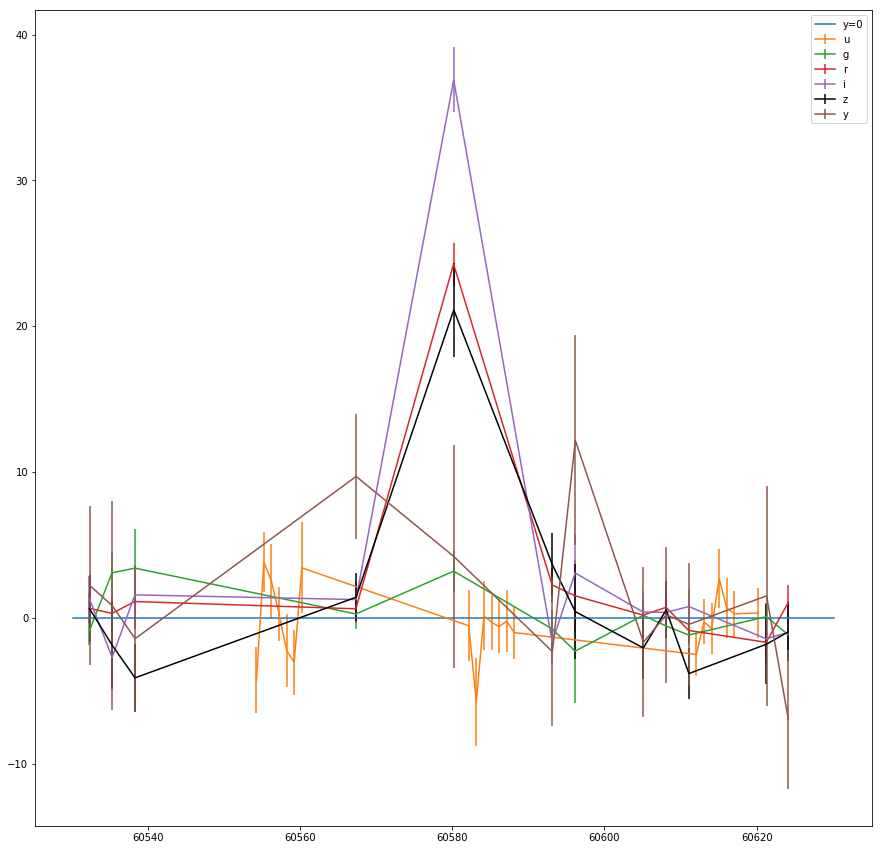

139362


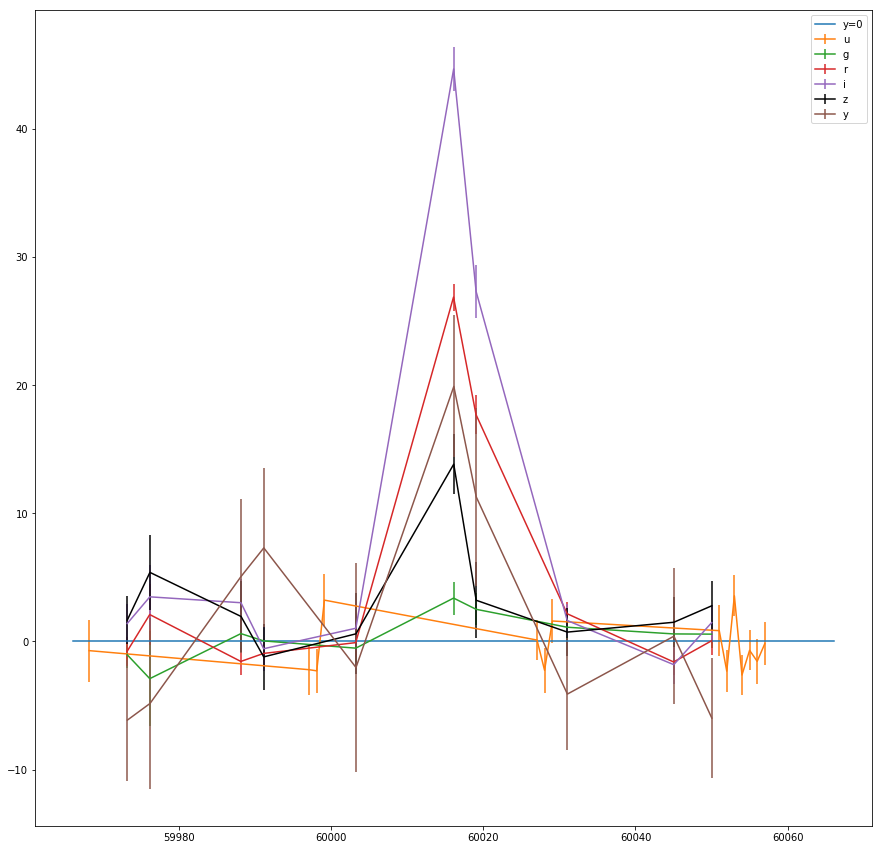

1573501


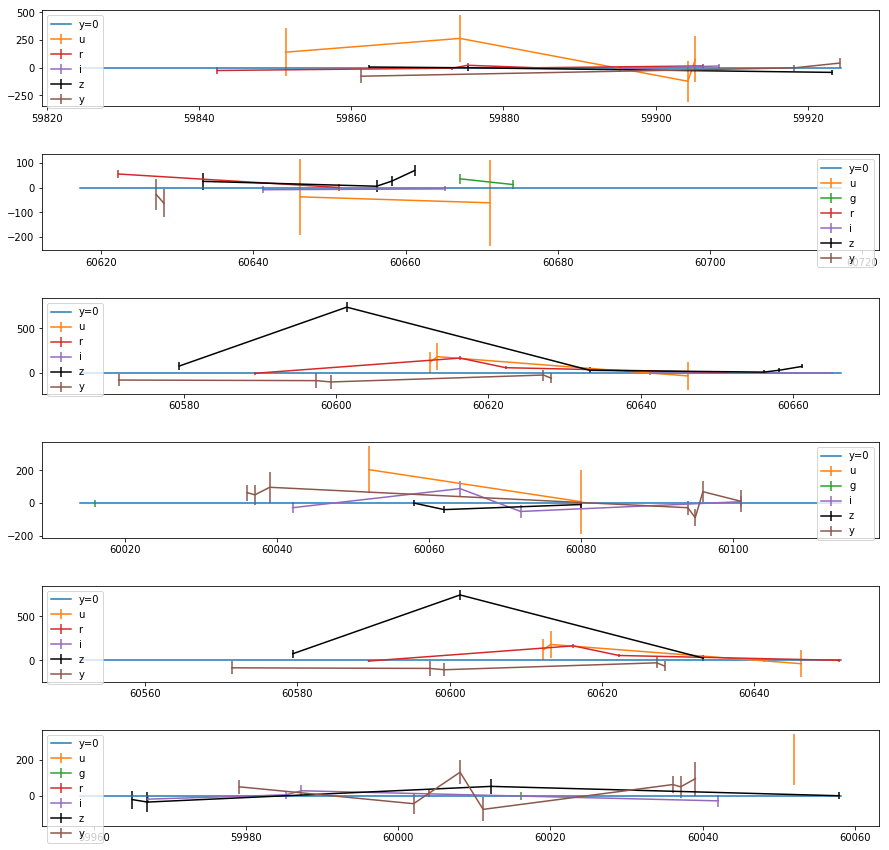

3572446


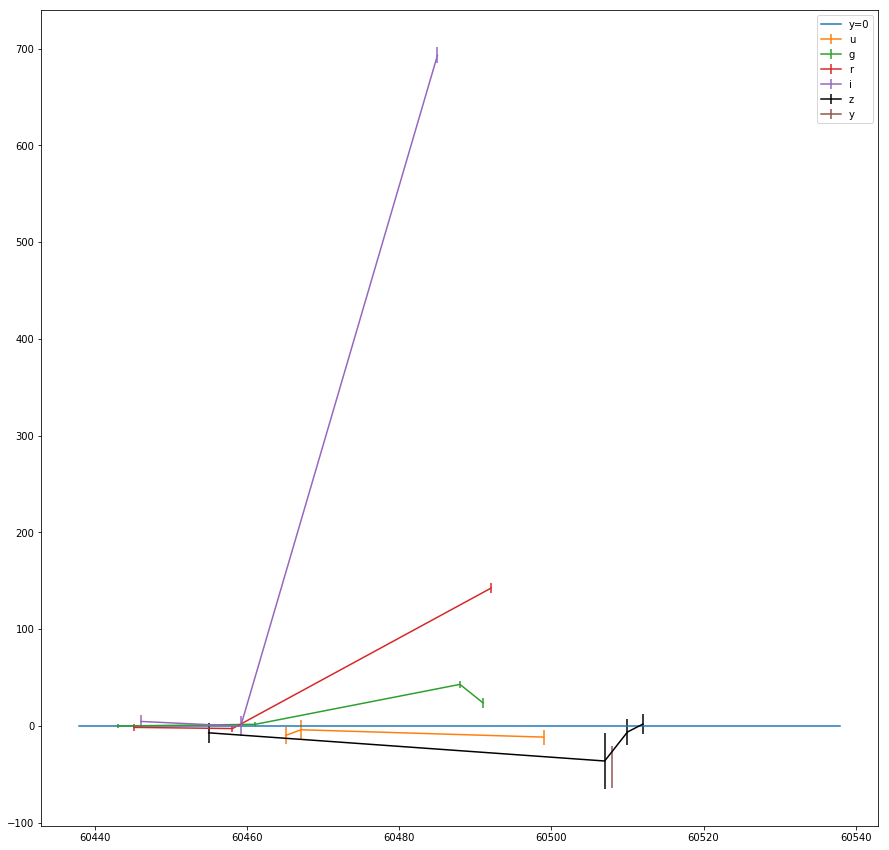

4311960


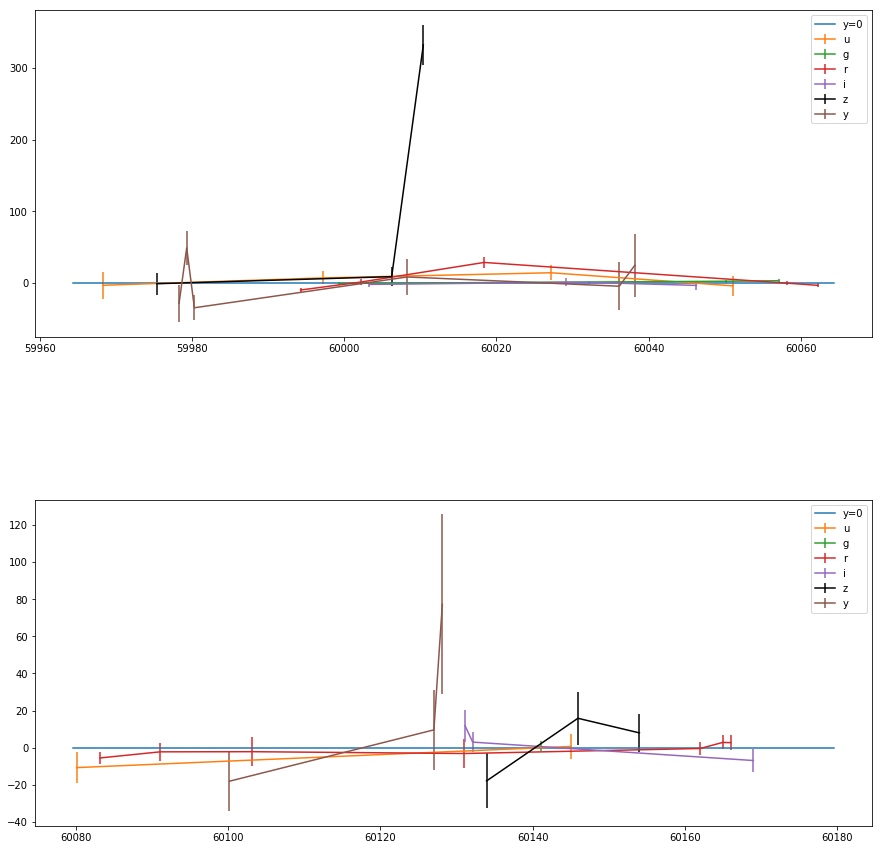

4539153


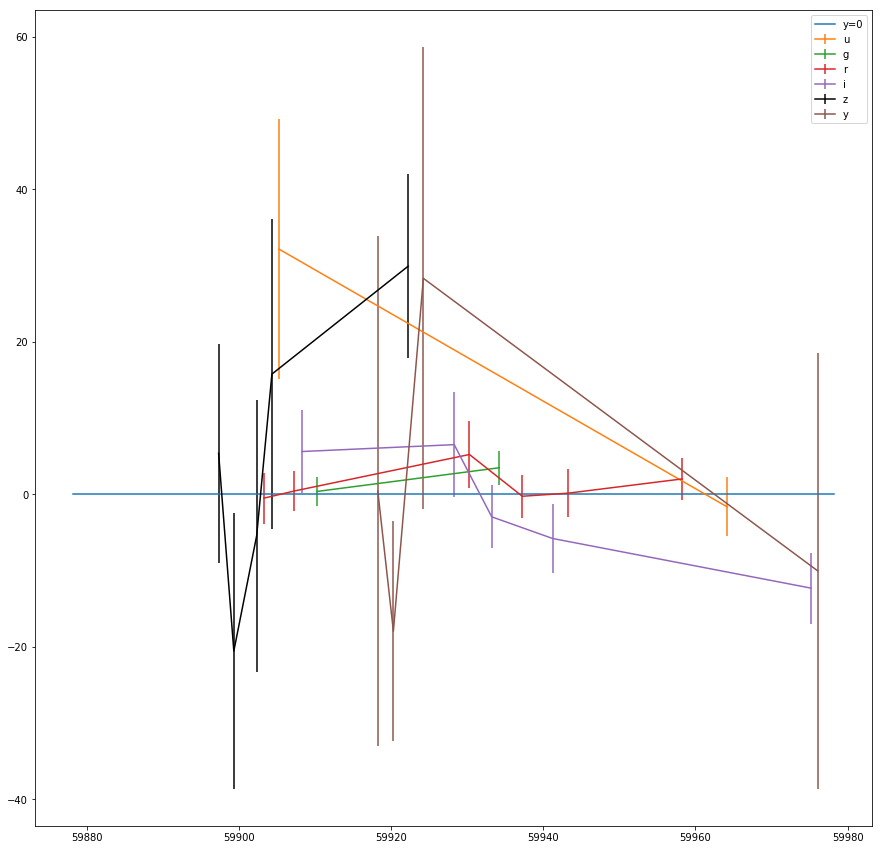

5102349


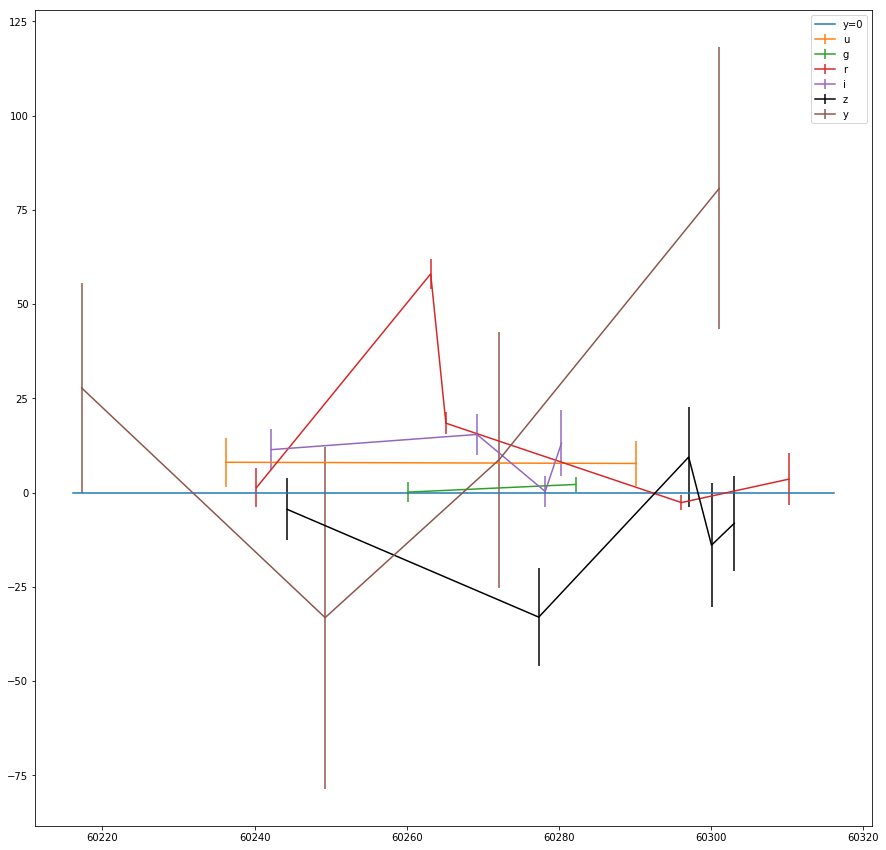

6460481


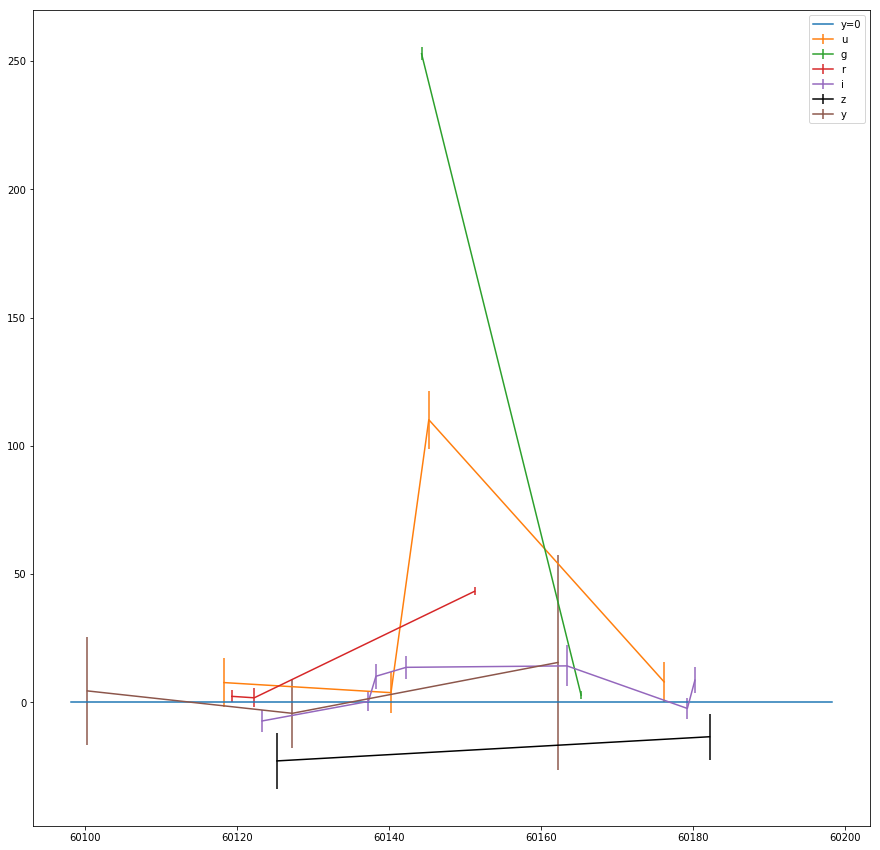

11574036


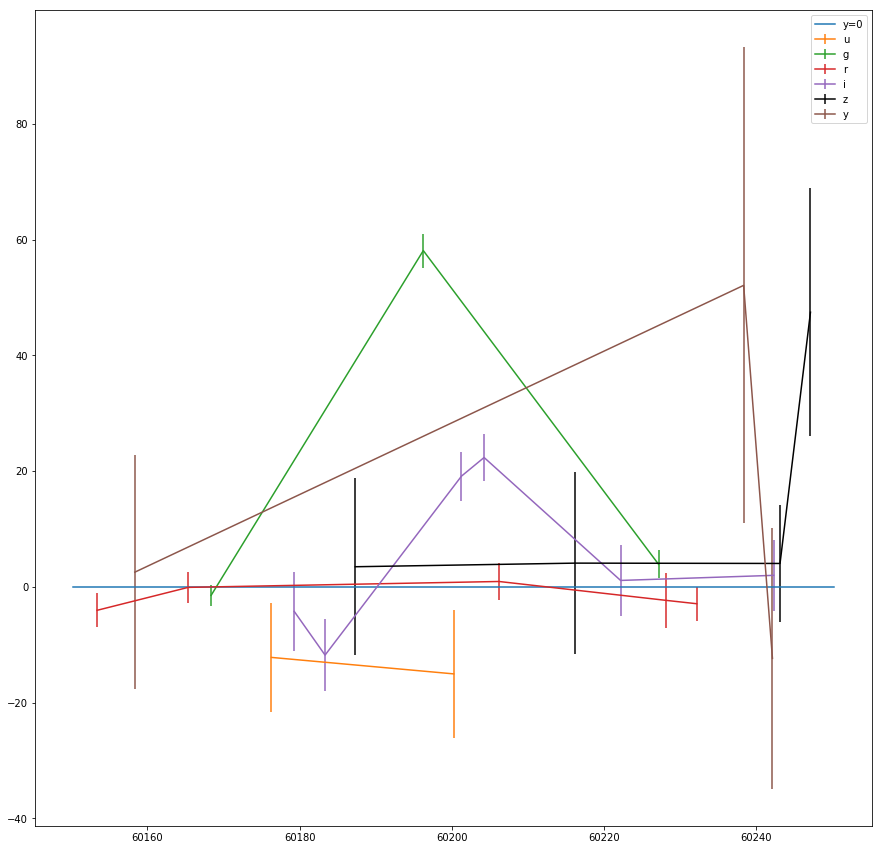

11742403


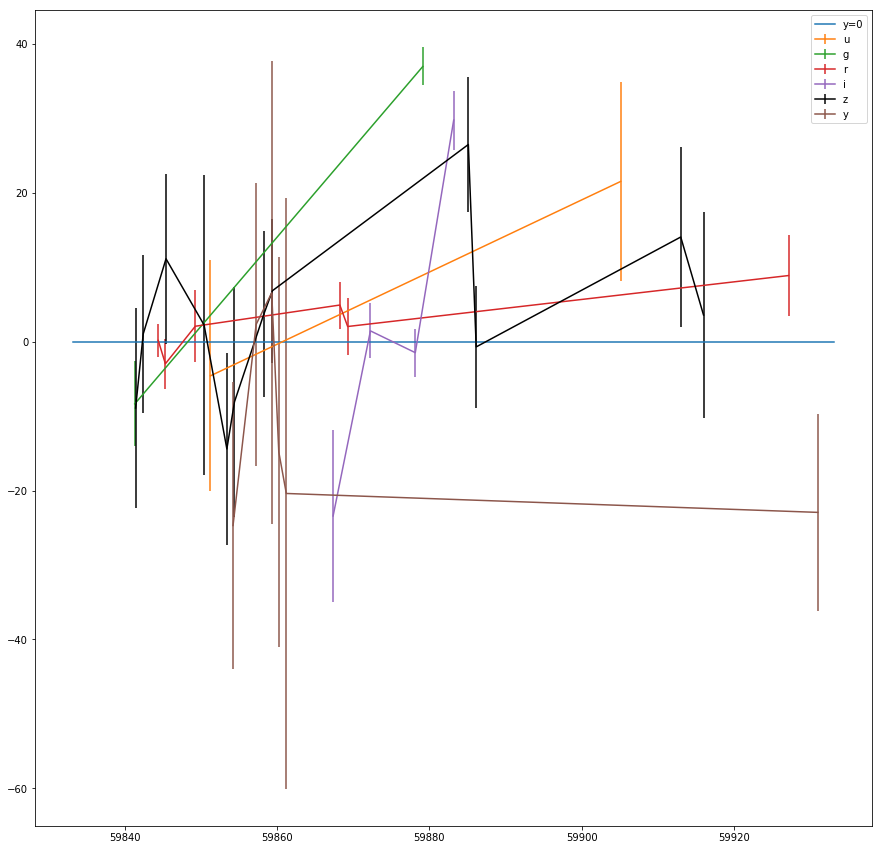

11904502


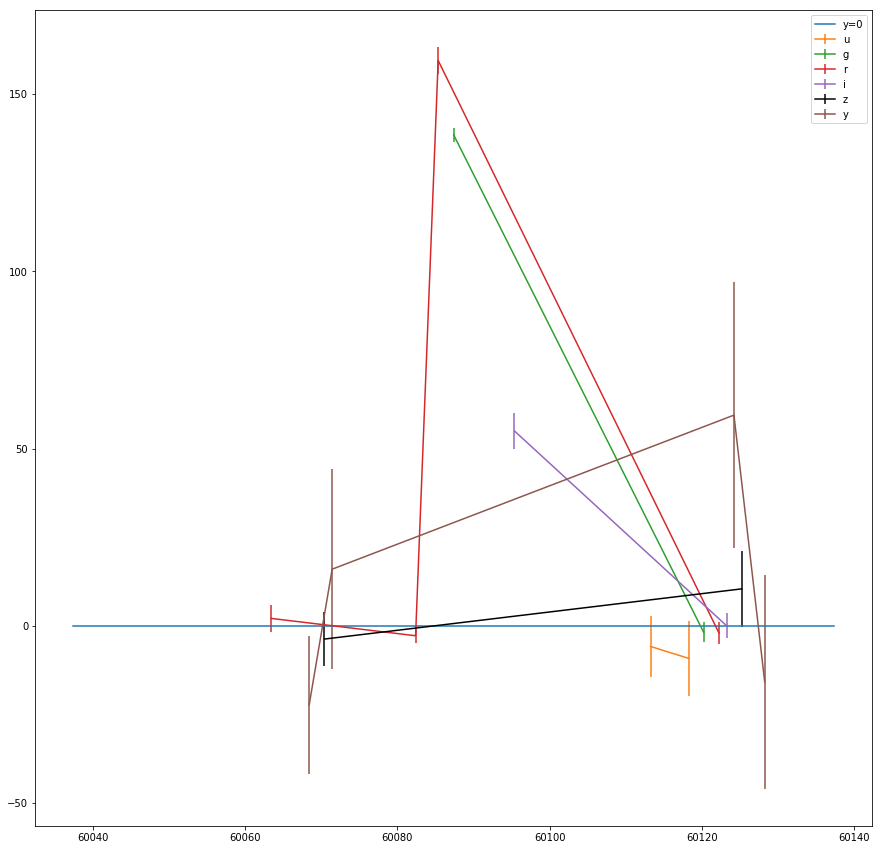

13537416


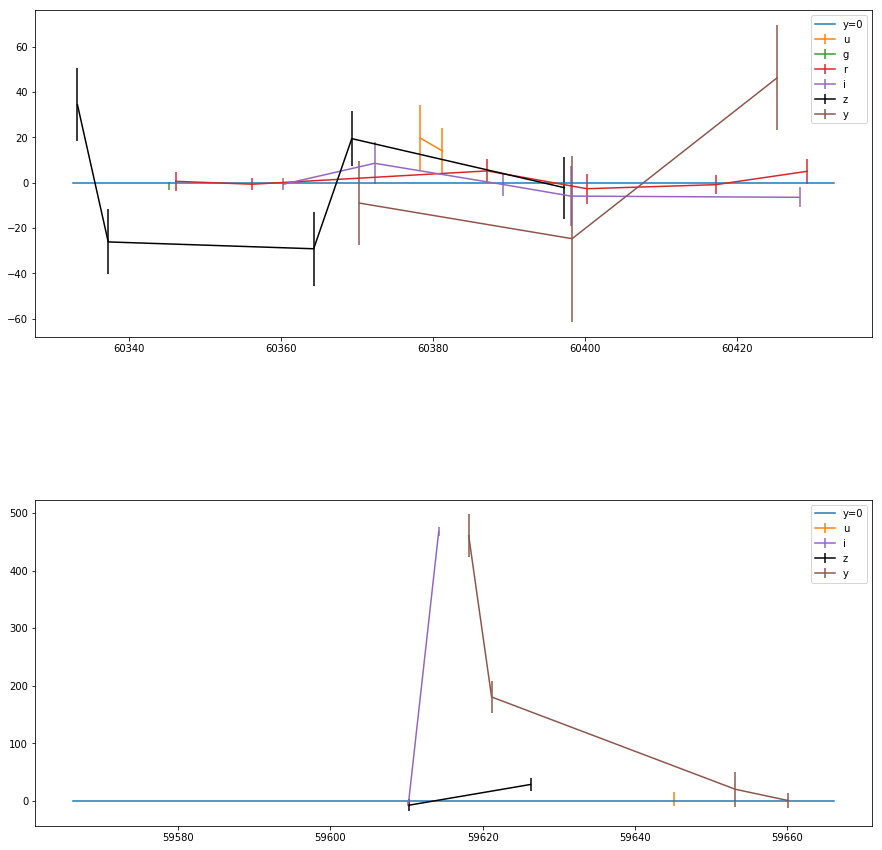

15897952


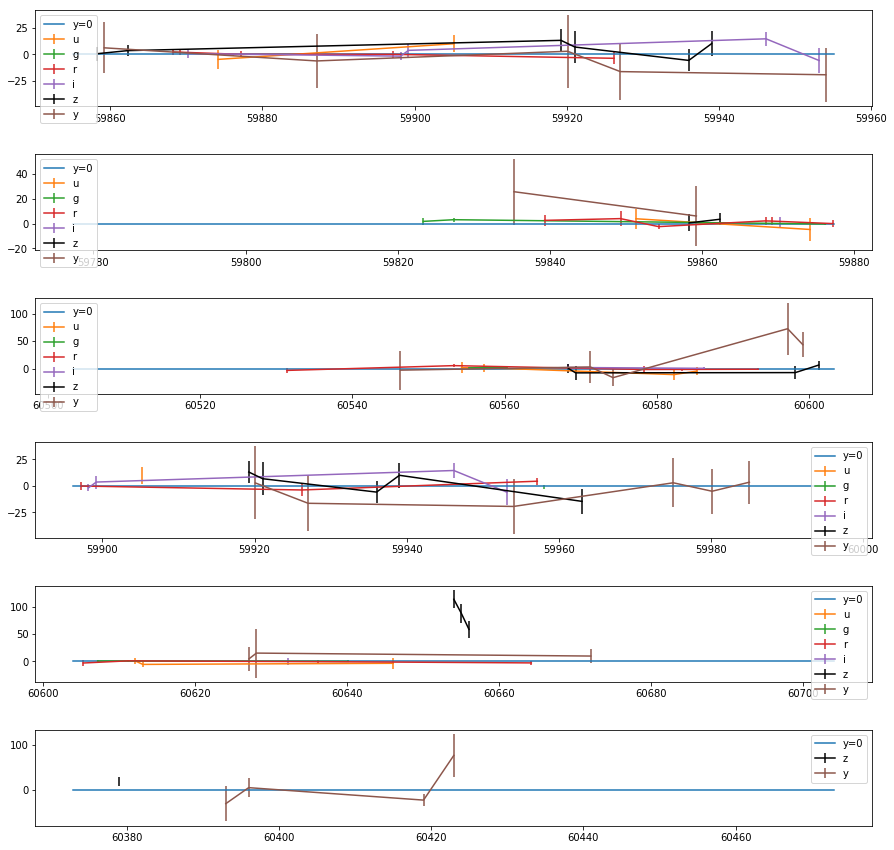

16173841


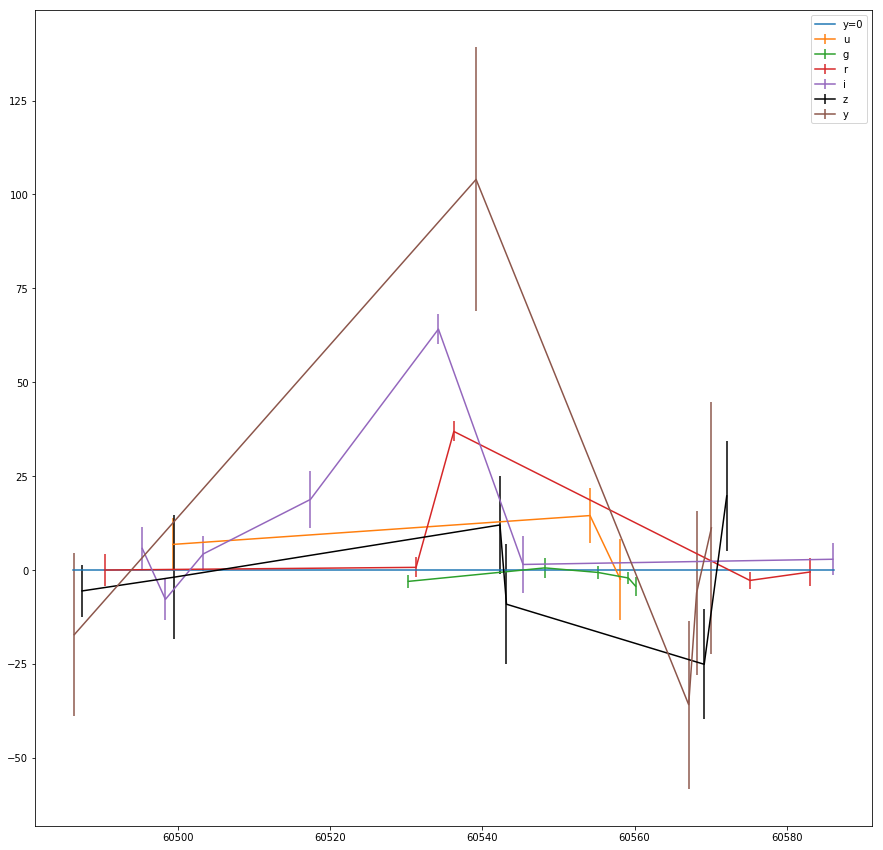

16452890


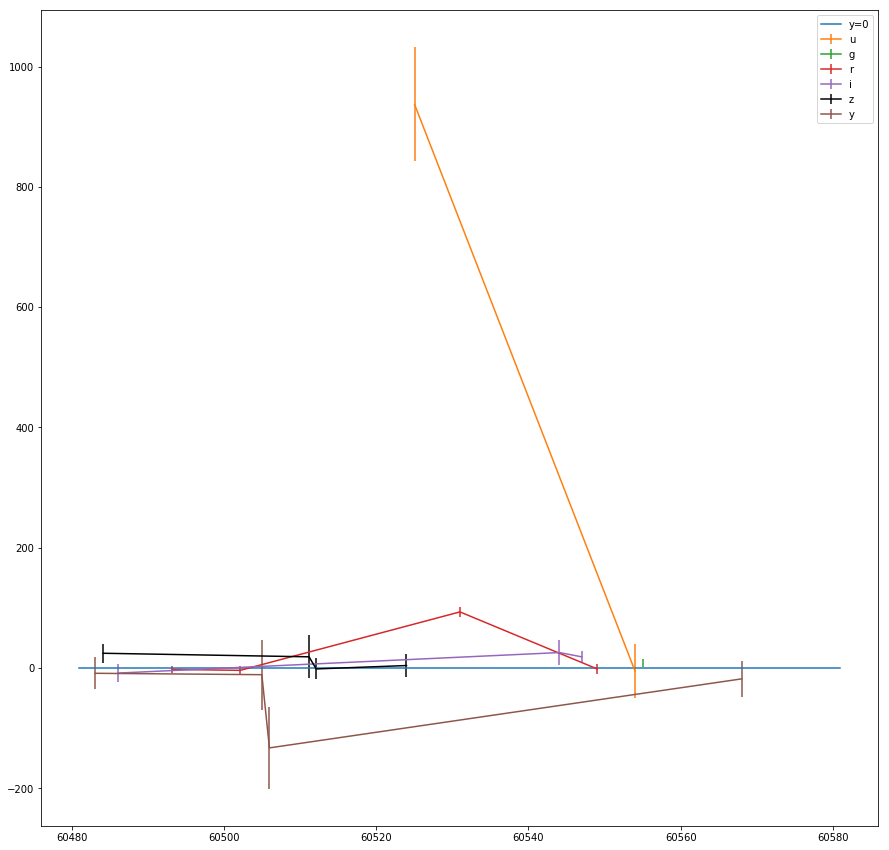

17116737


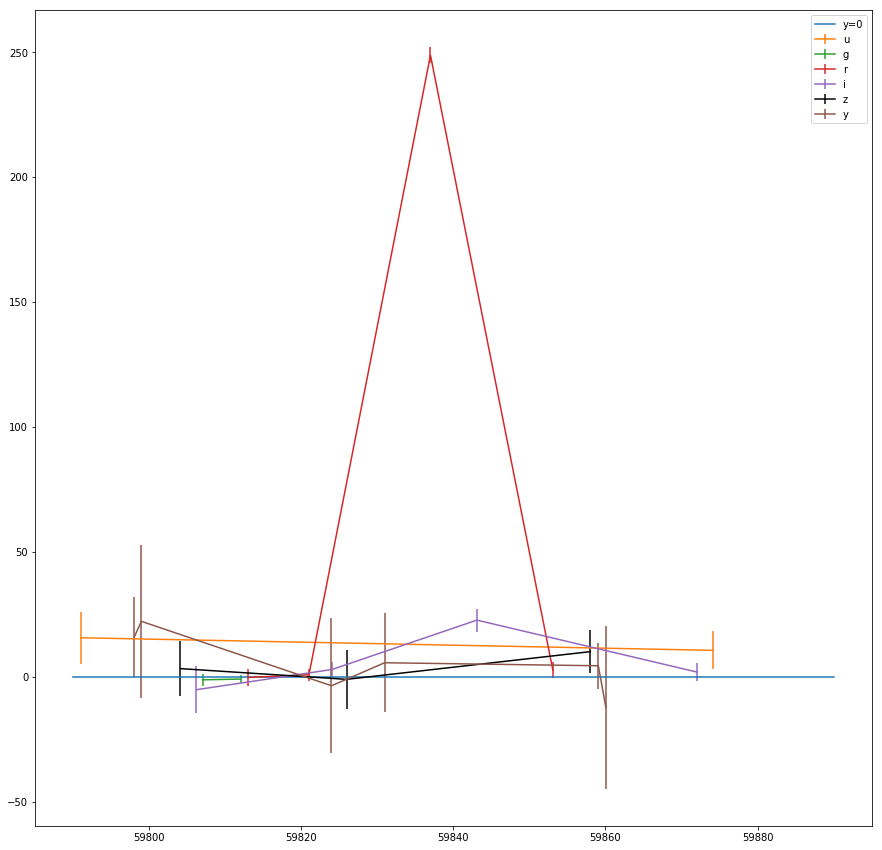

17958346


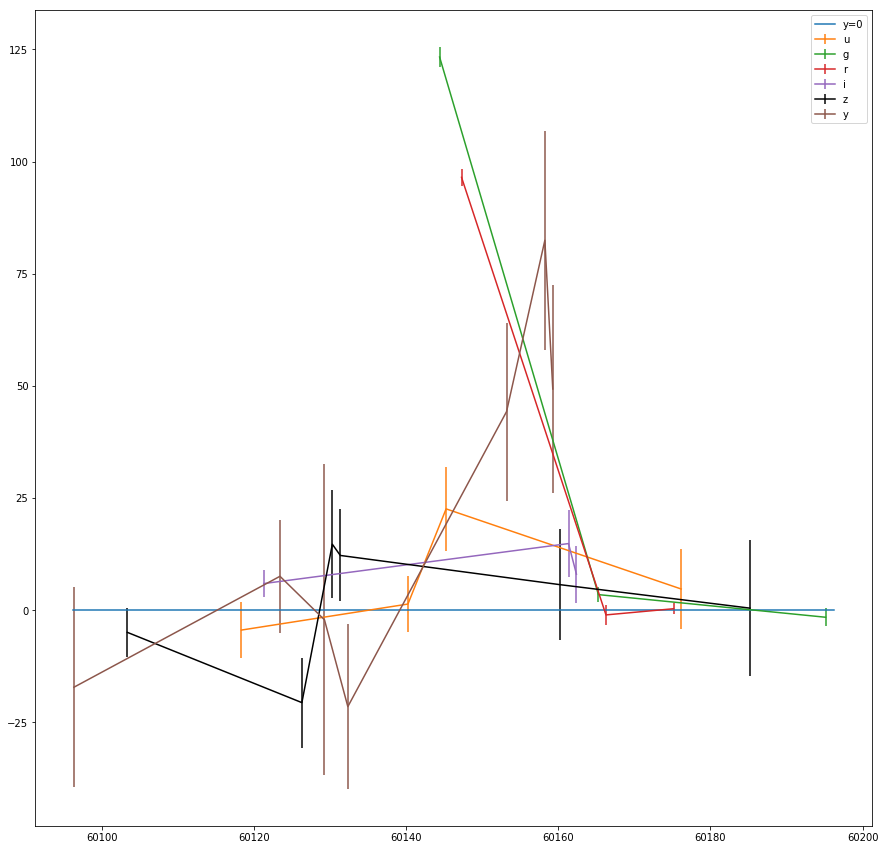

19183060


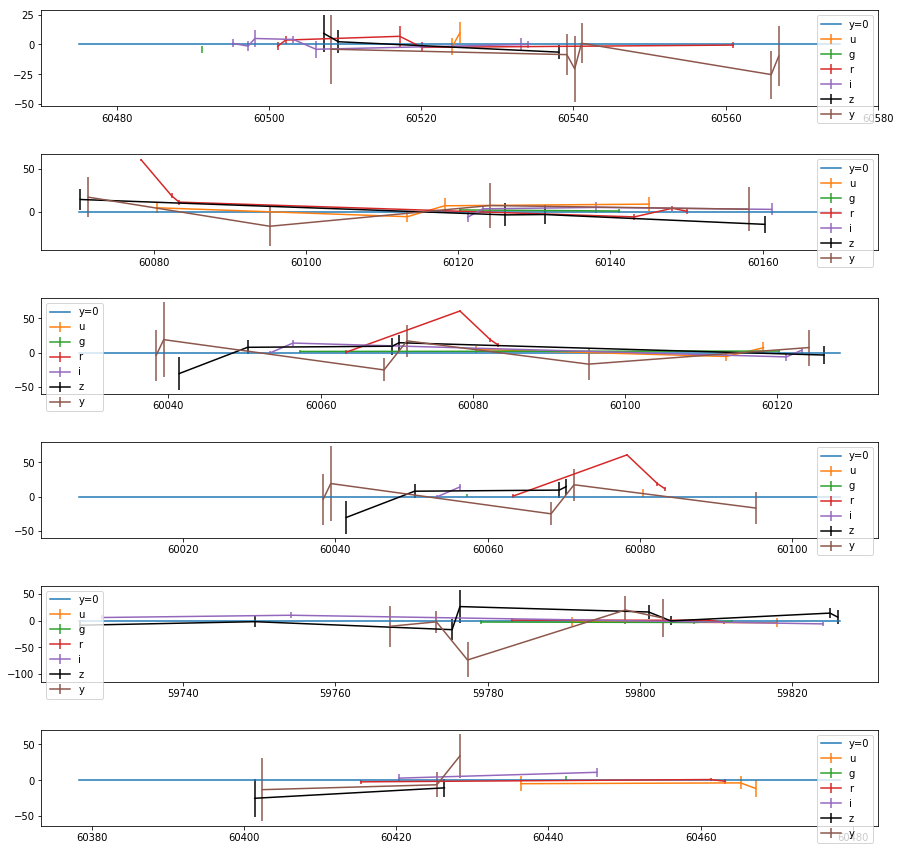

20539244


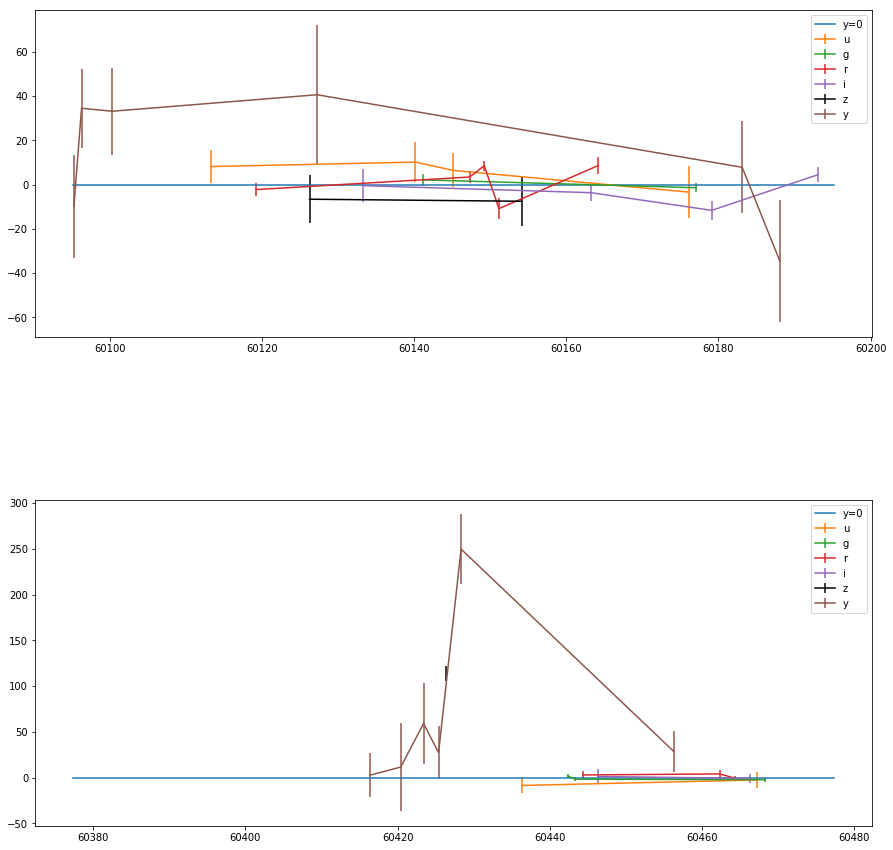

22245279


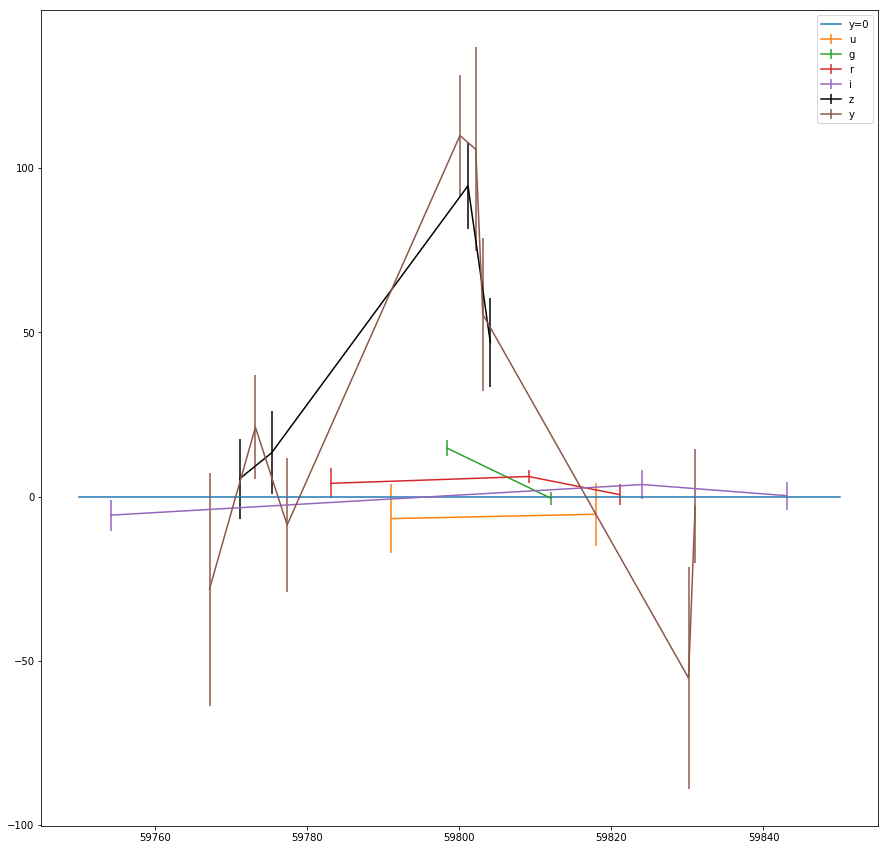

23798919


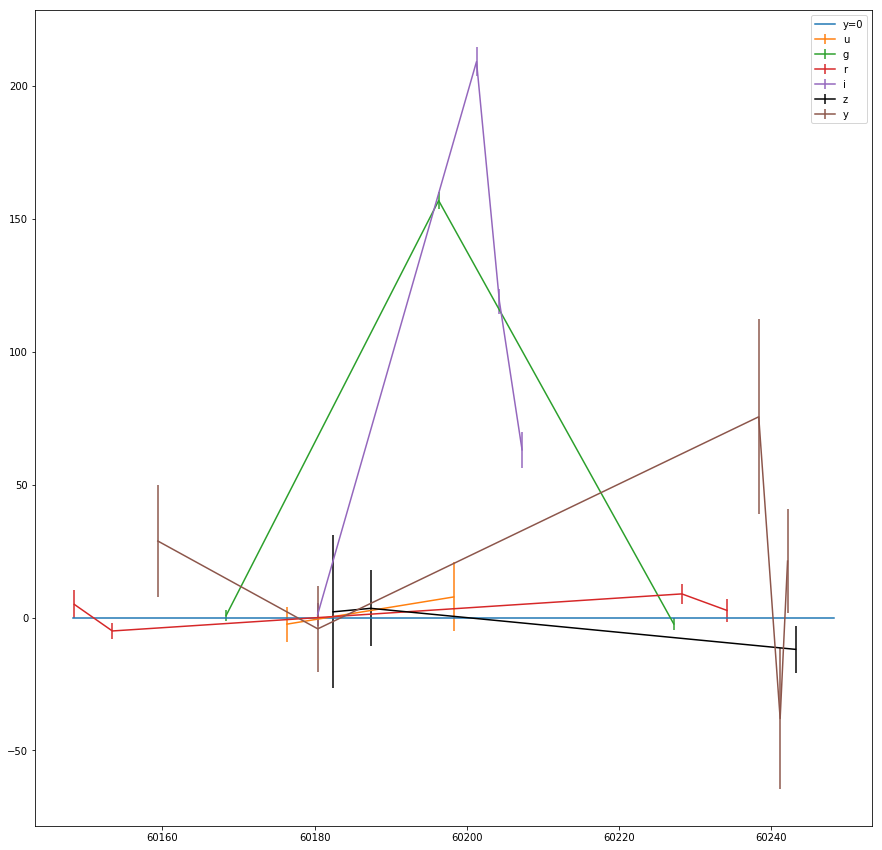

26684850


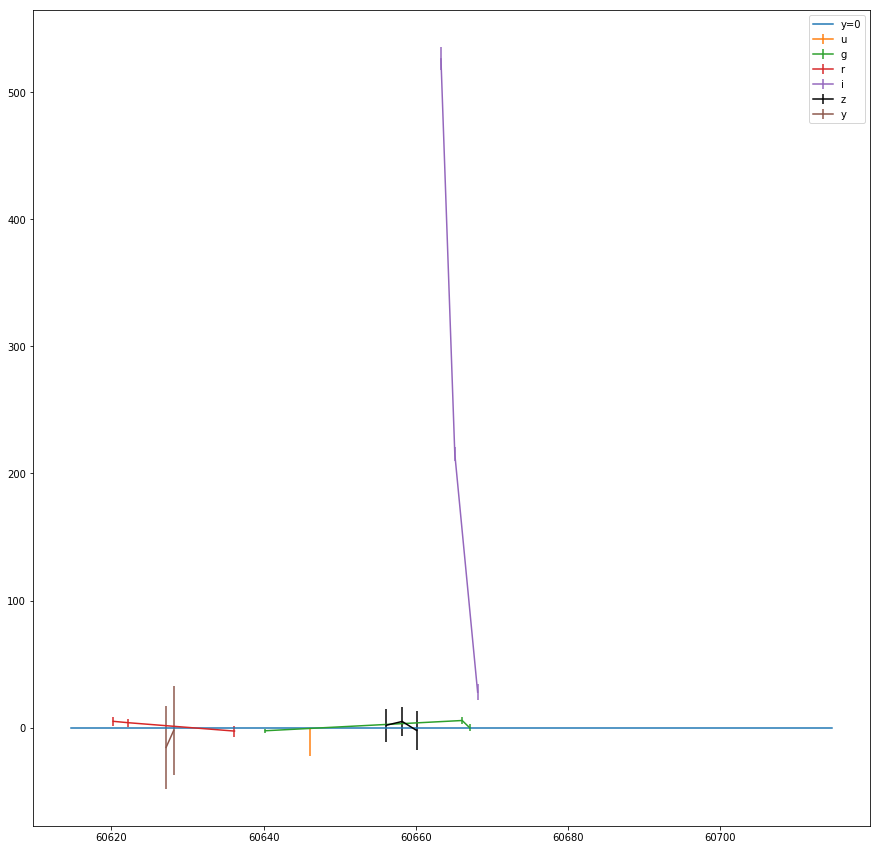

27883625


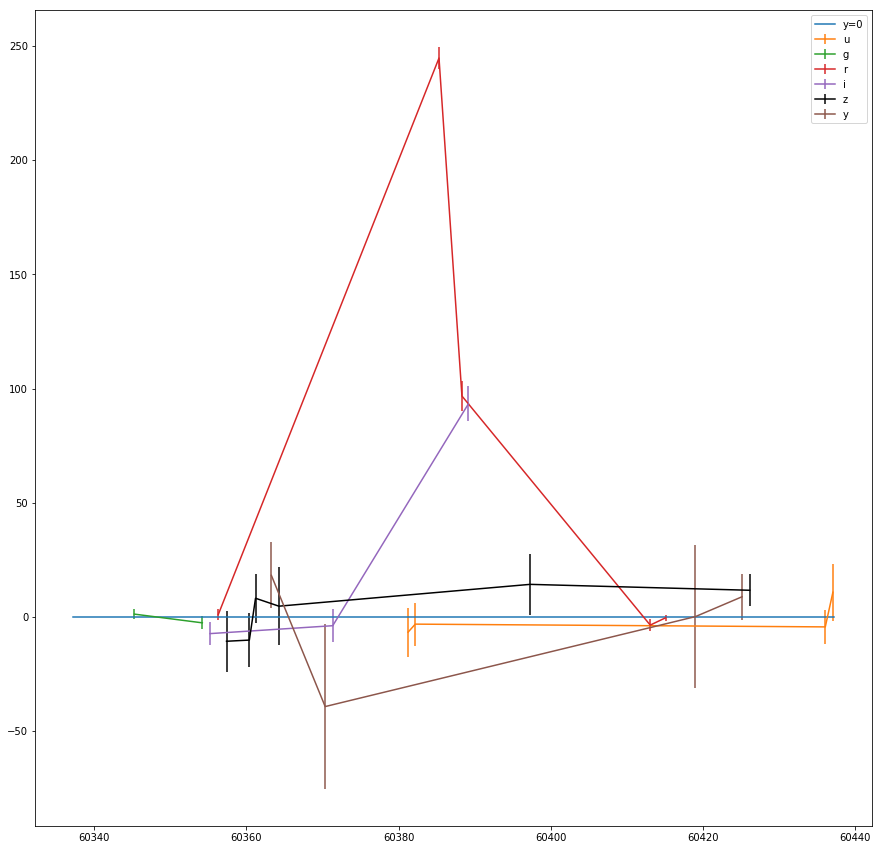

31292040


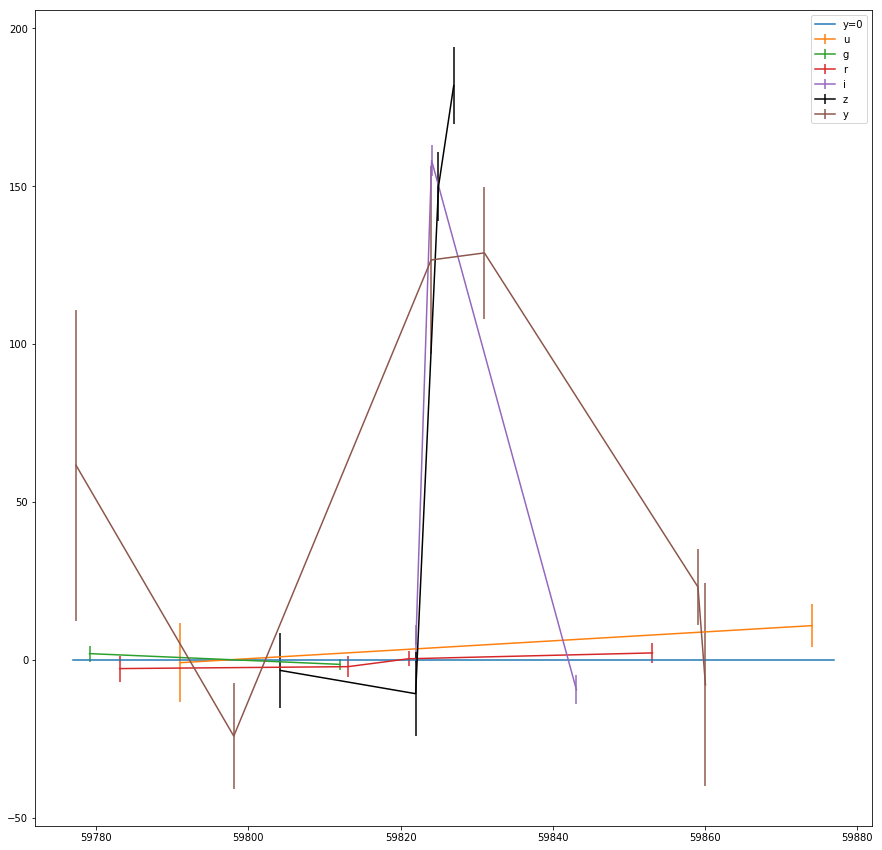

31563138


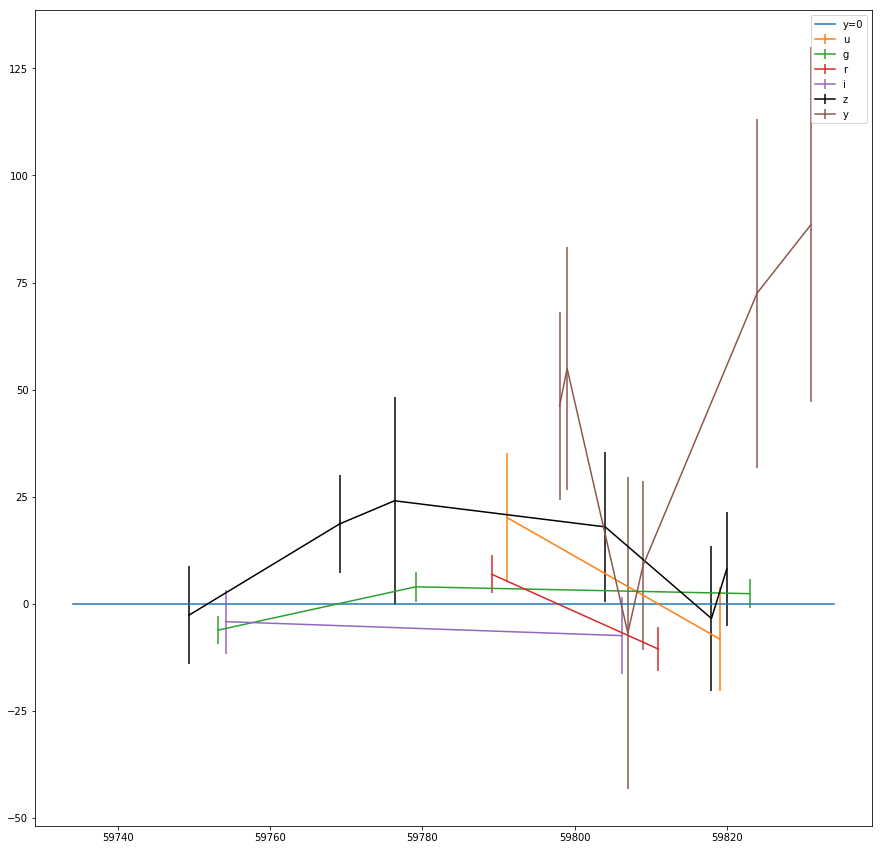

33065798


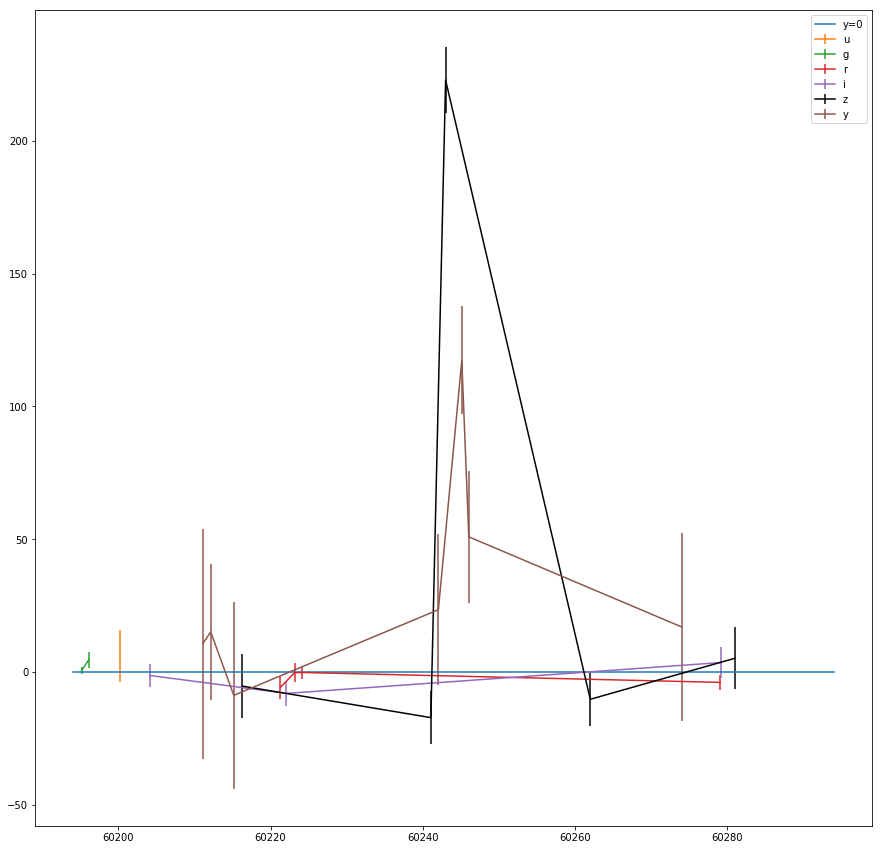

35411122


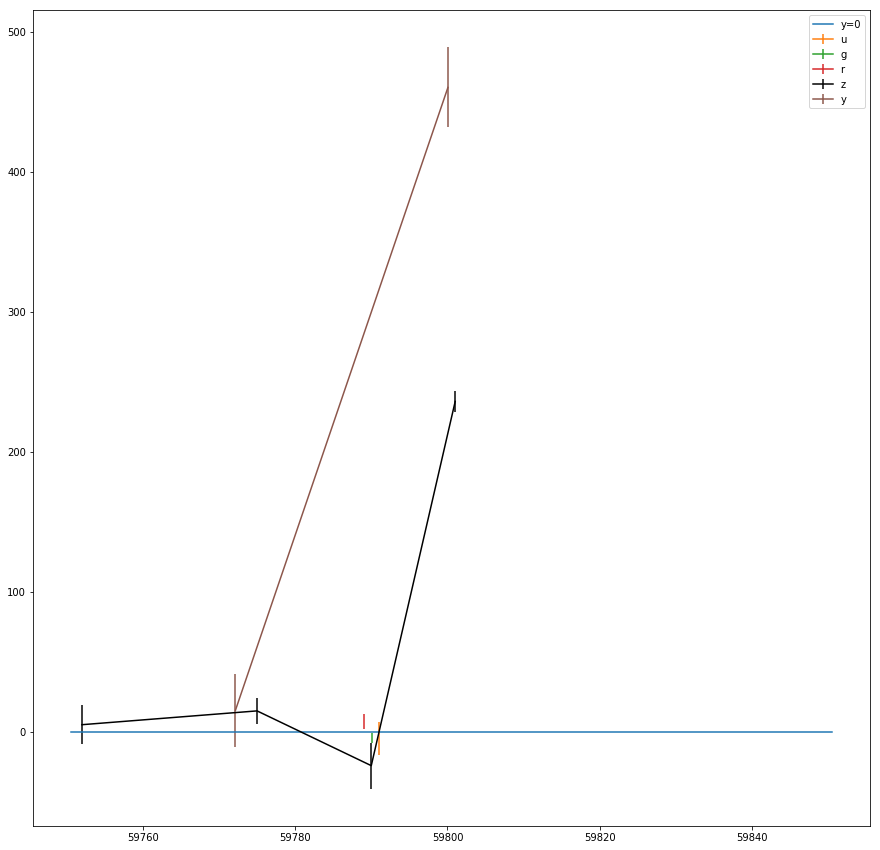

35630788


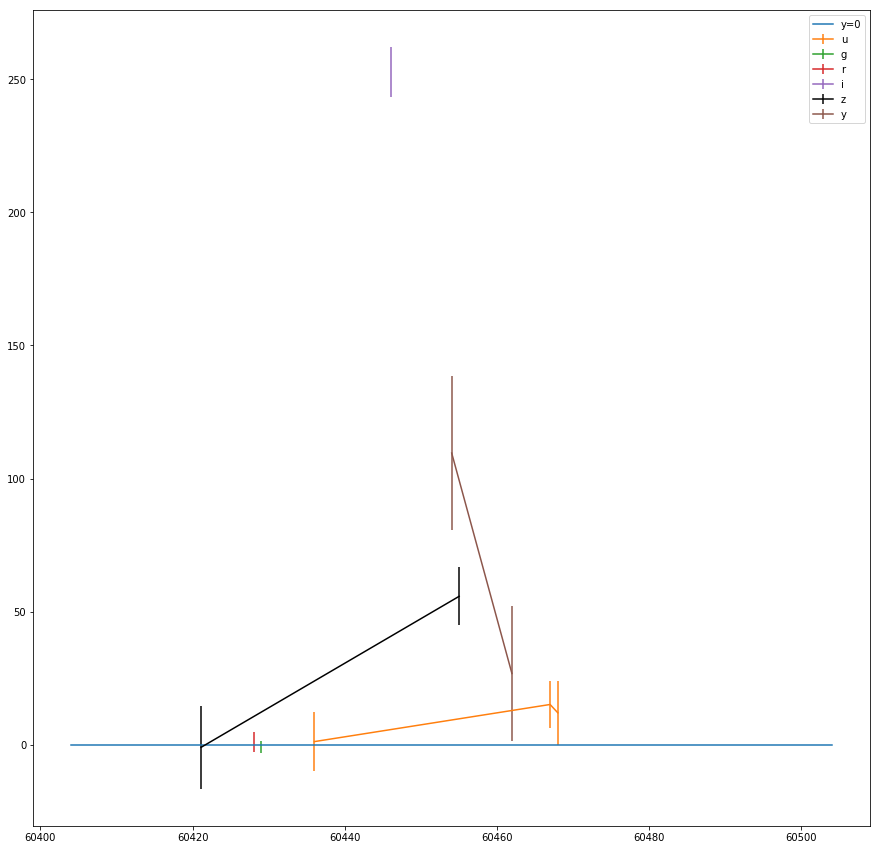

39745050


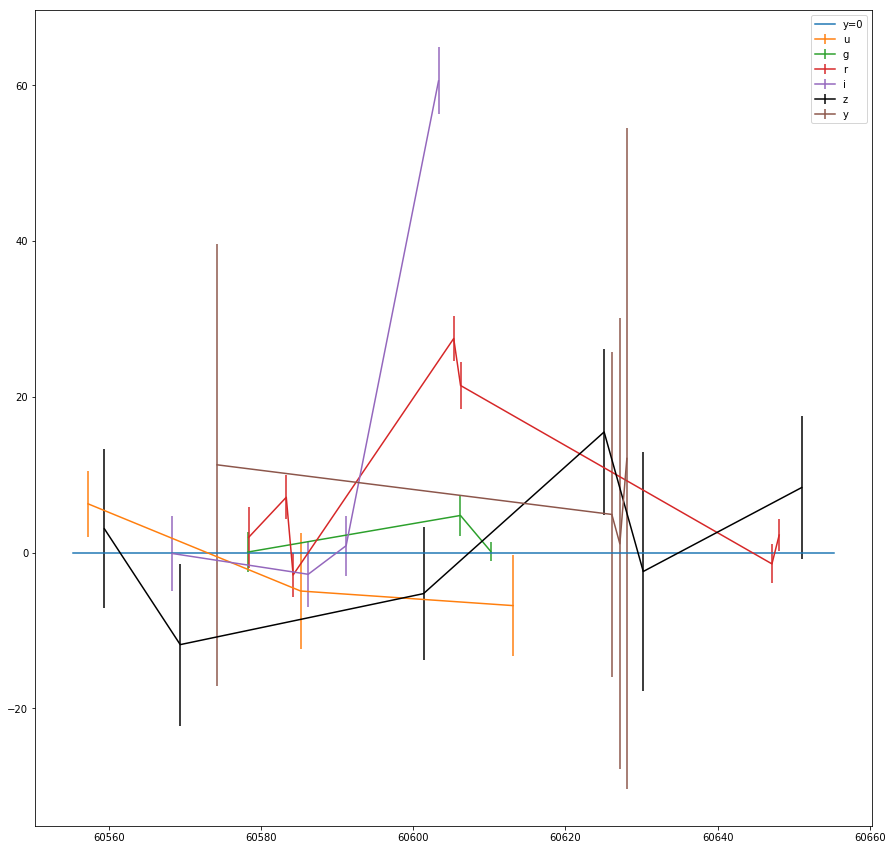

44564061


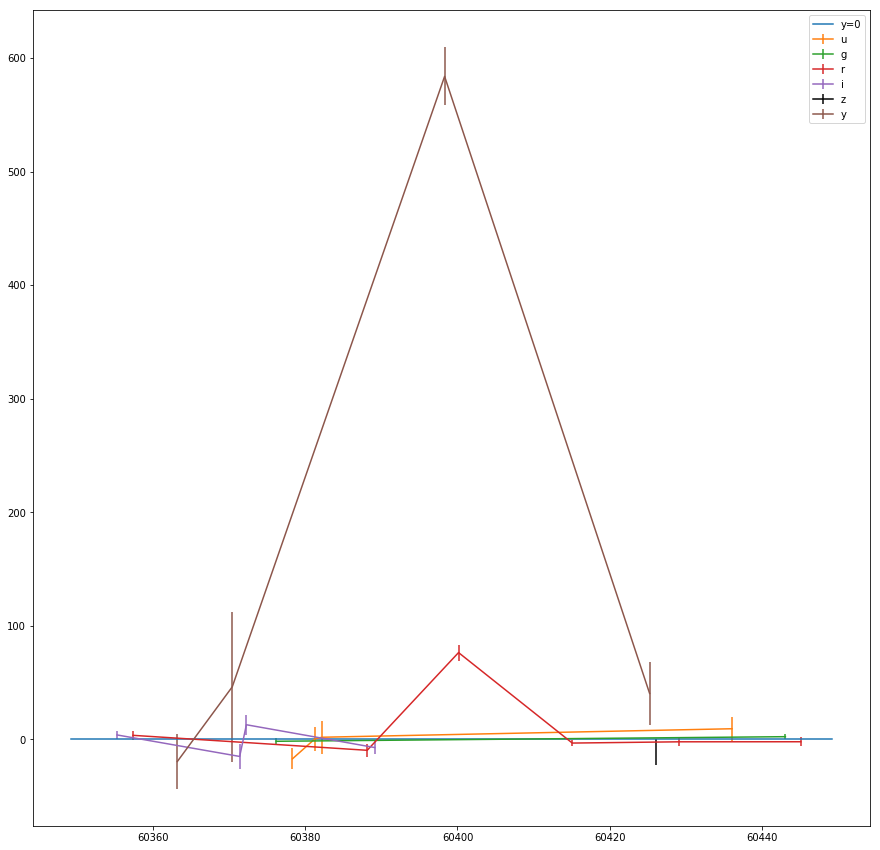

44864629


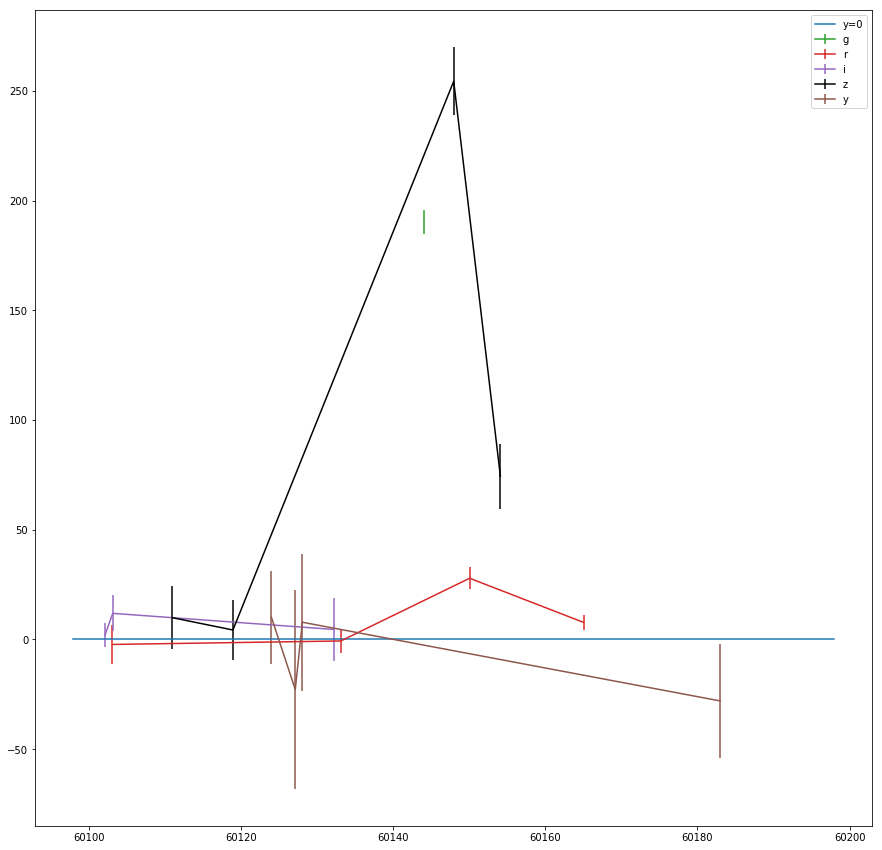

46213566


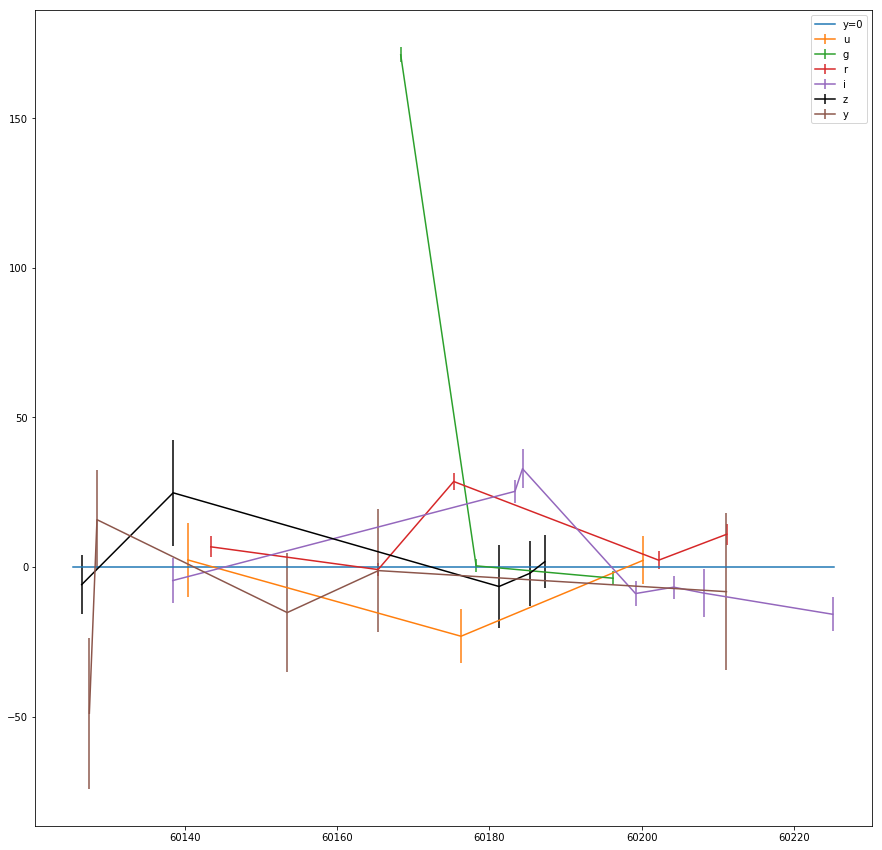

46489715


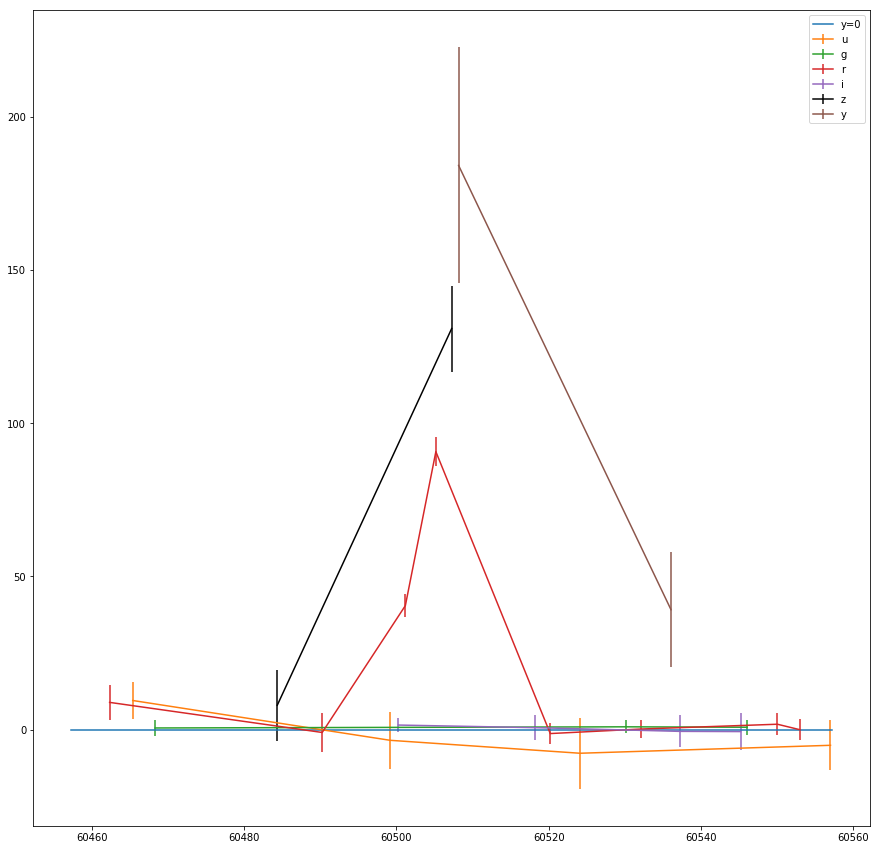

46553925


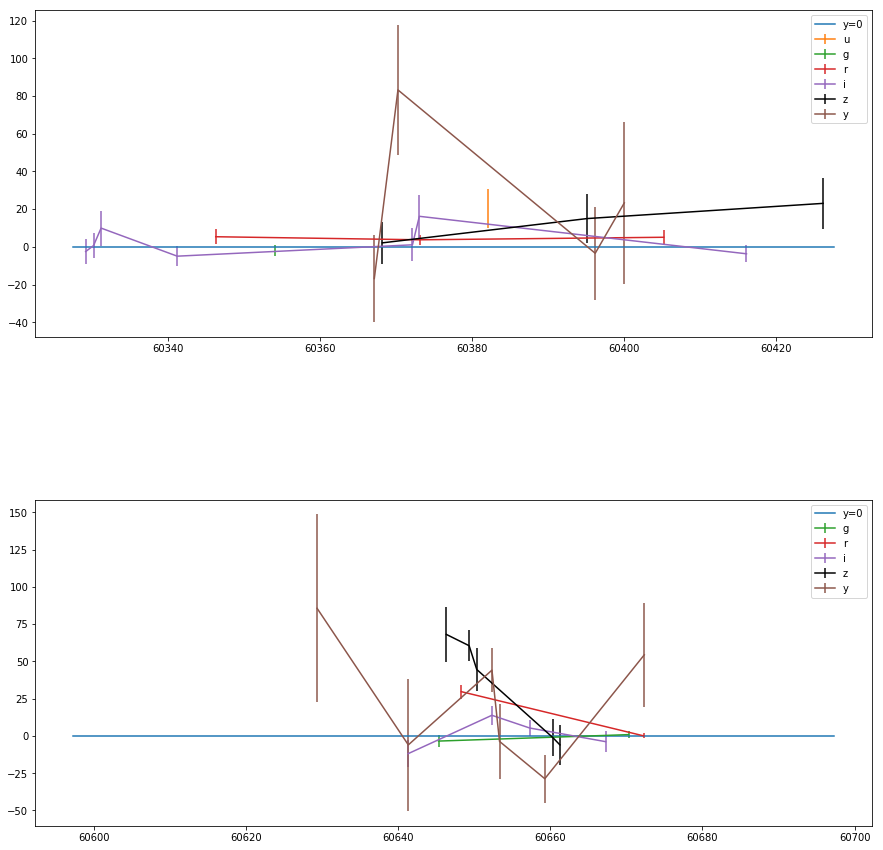

47142591


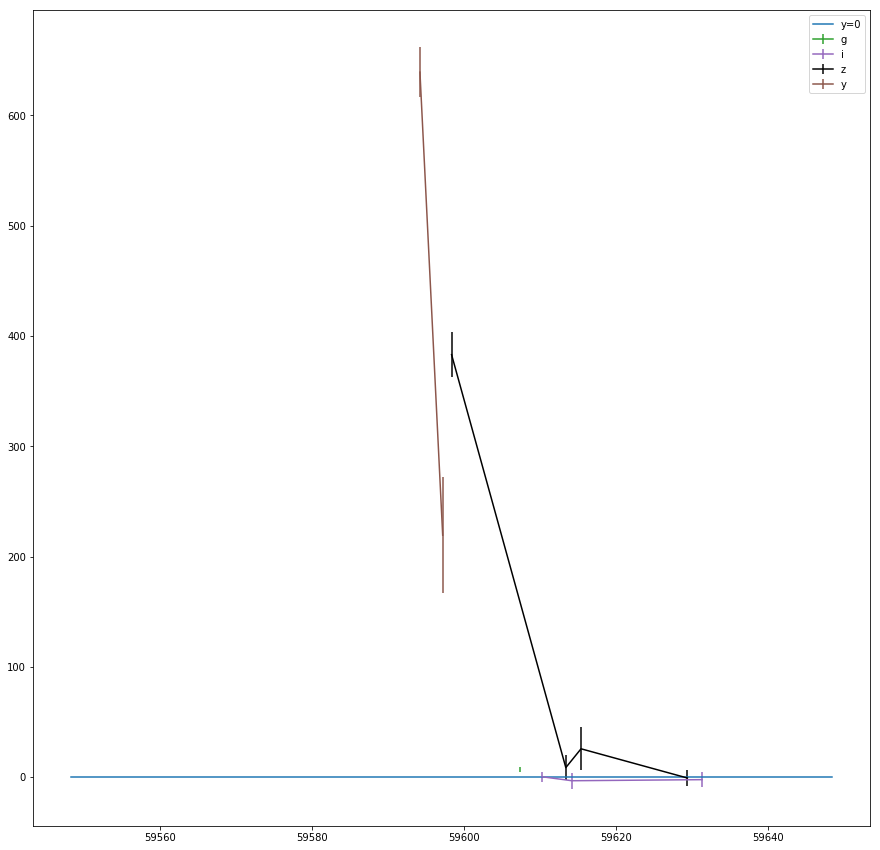

48098969


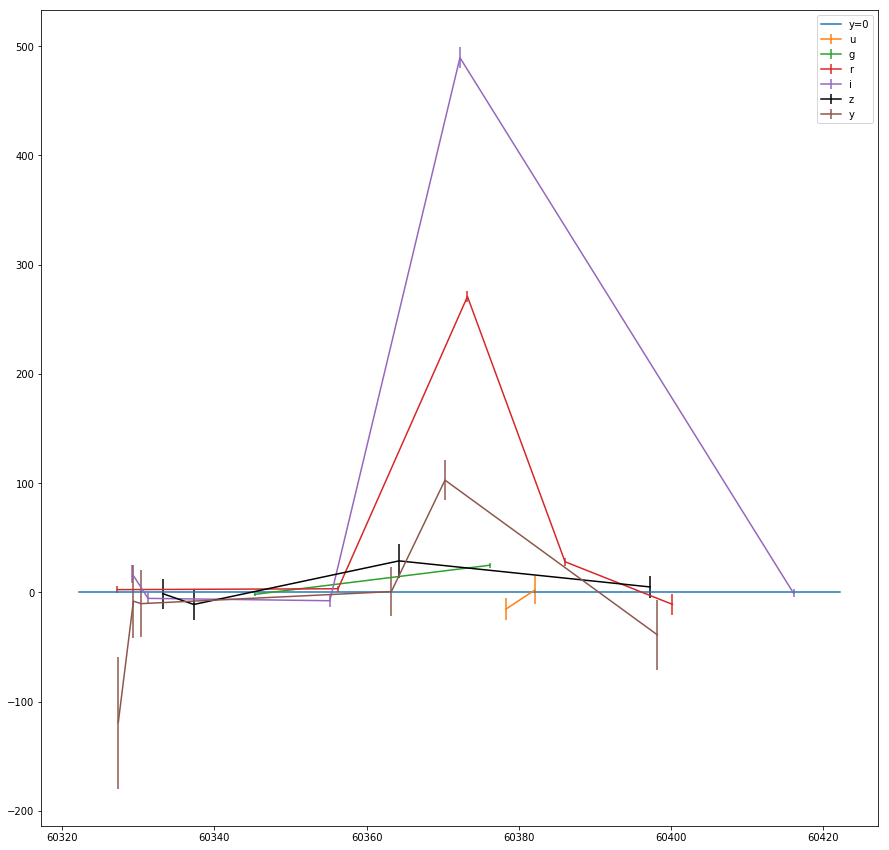

49519074


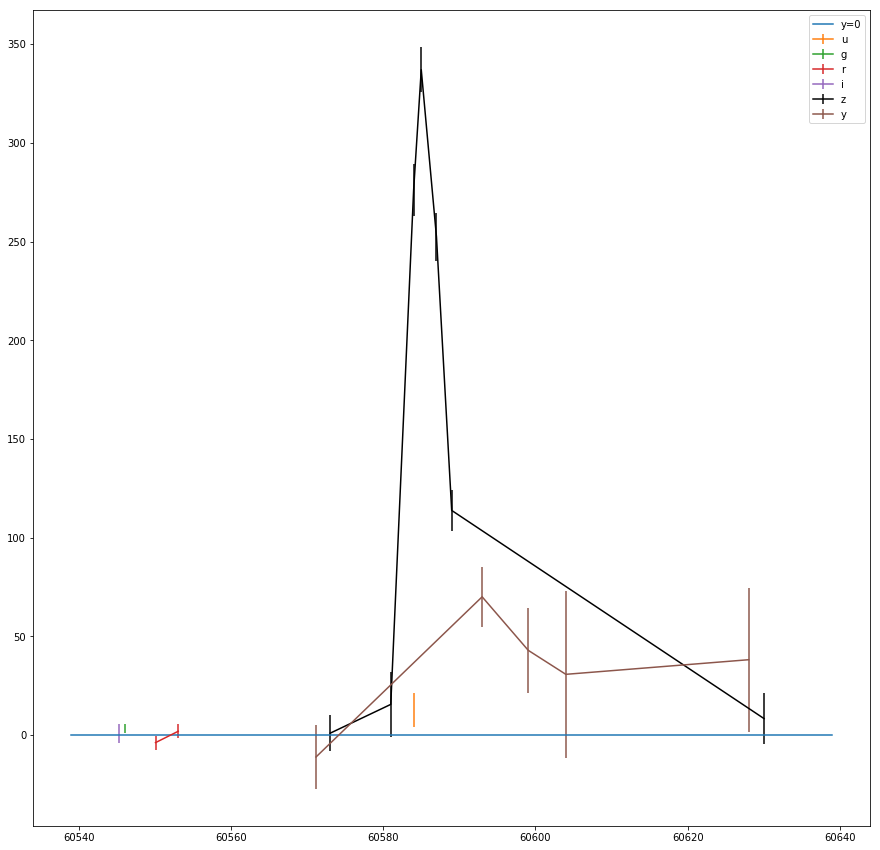

49850869


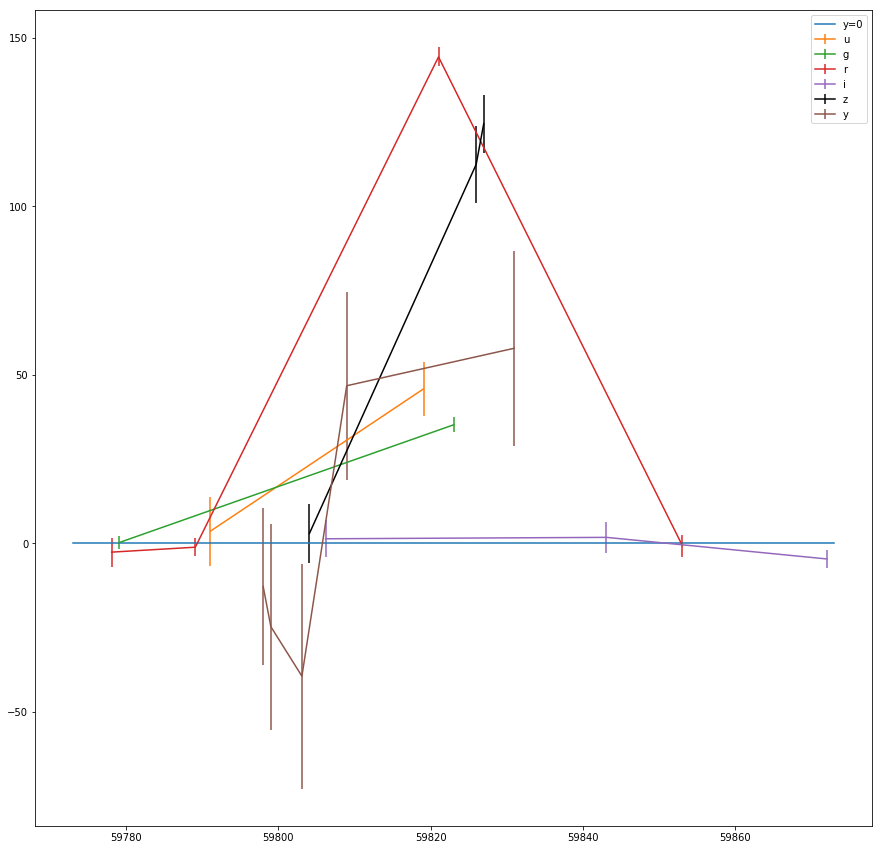

50120780


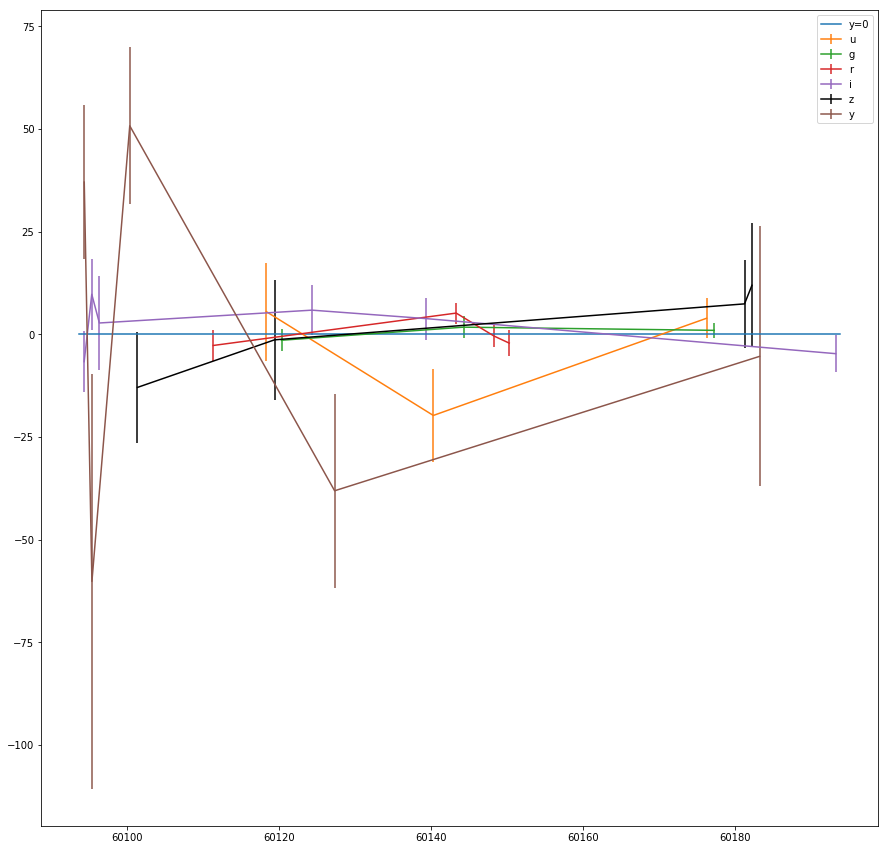

51527253


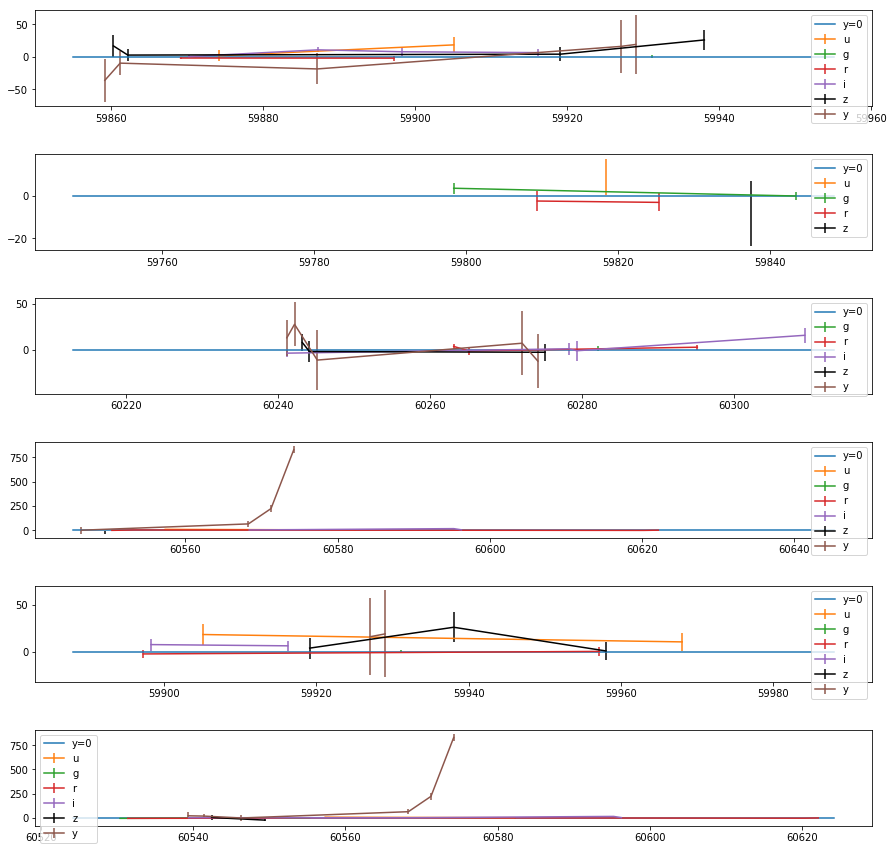

54000531


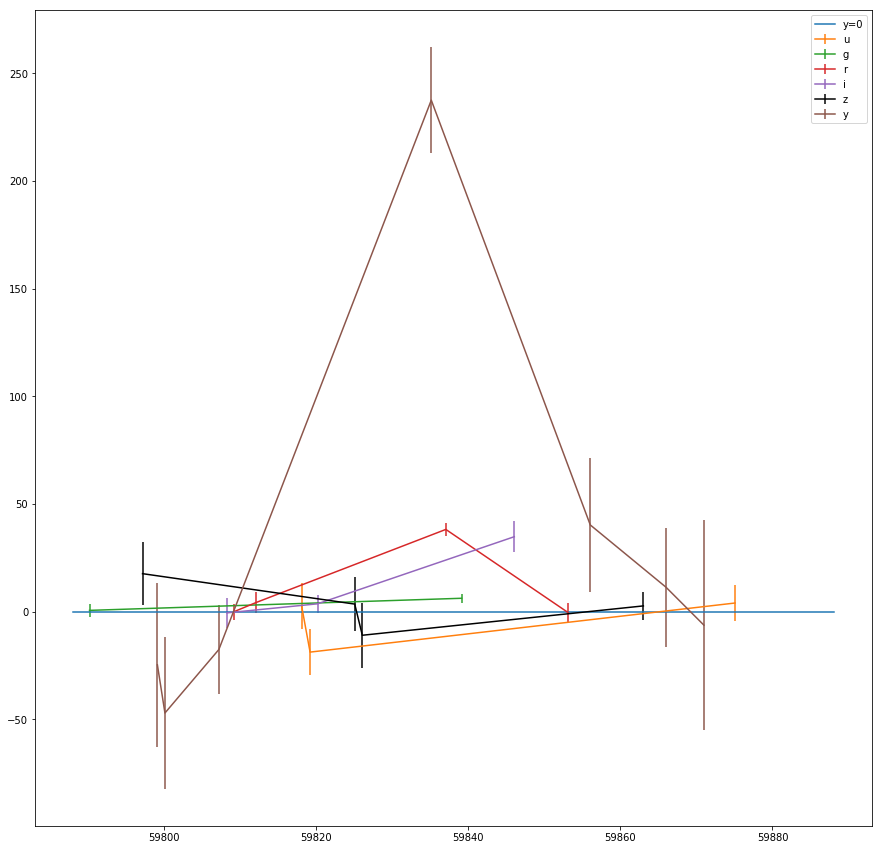

56942944


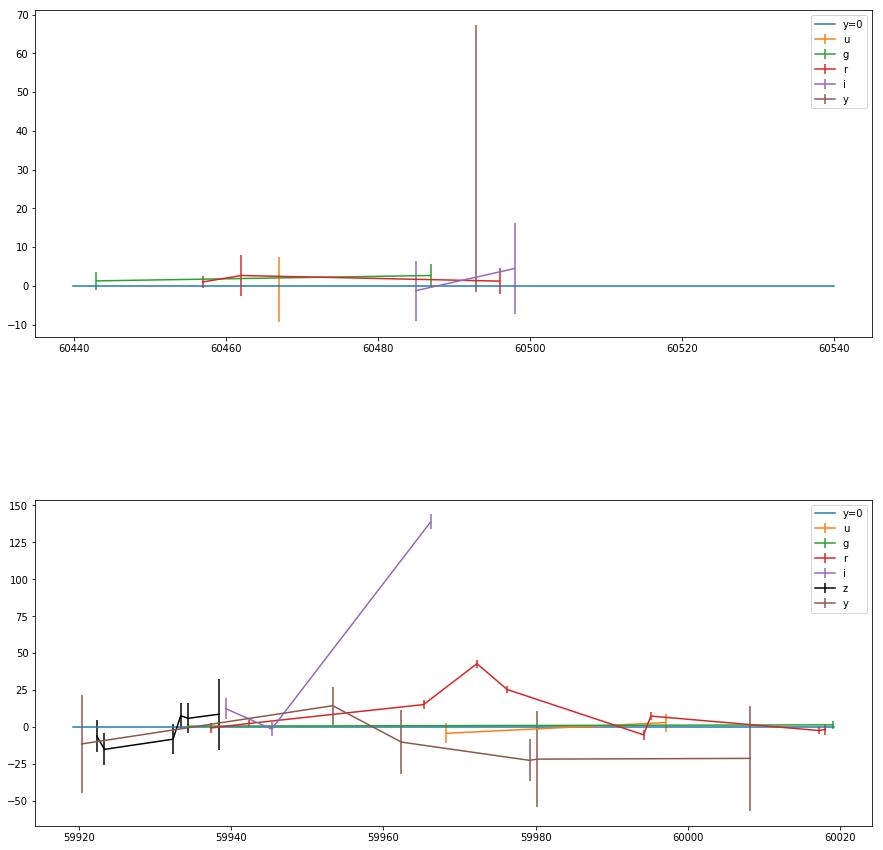

59364010


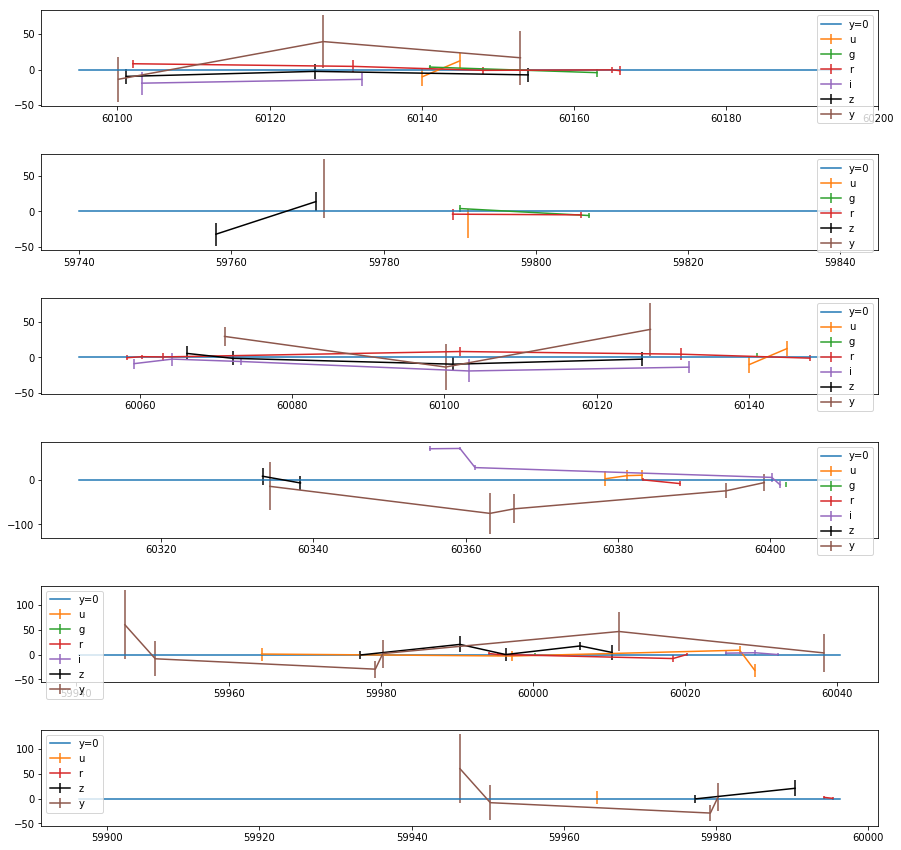

59464880


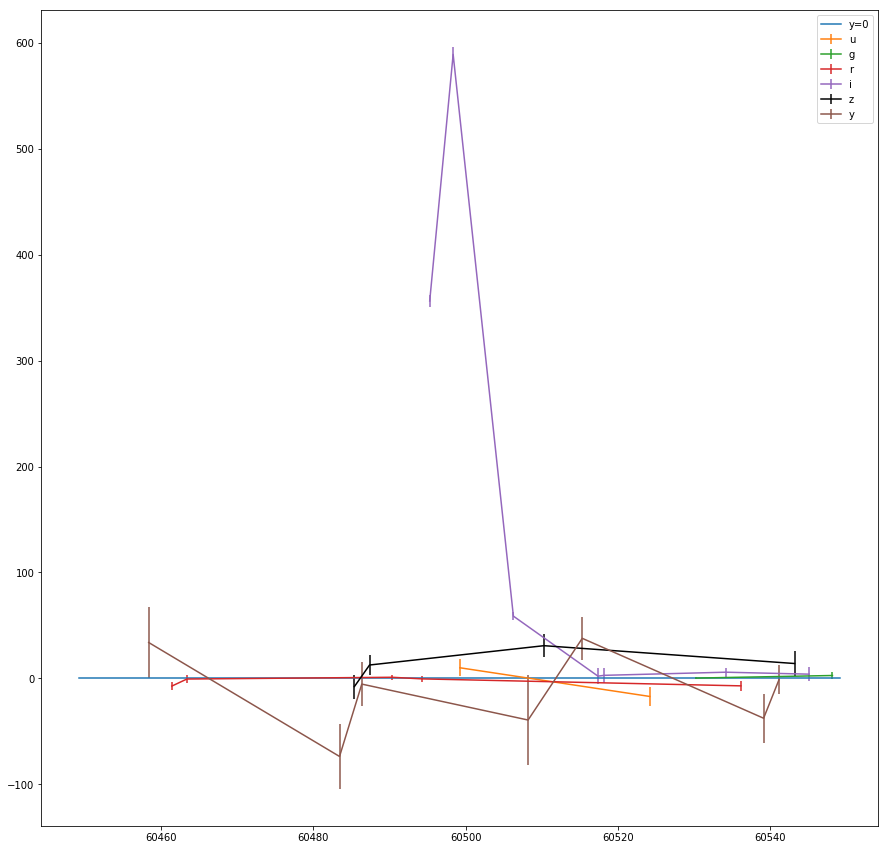

59698197


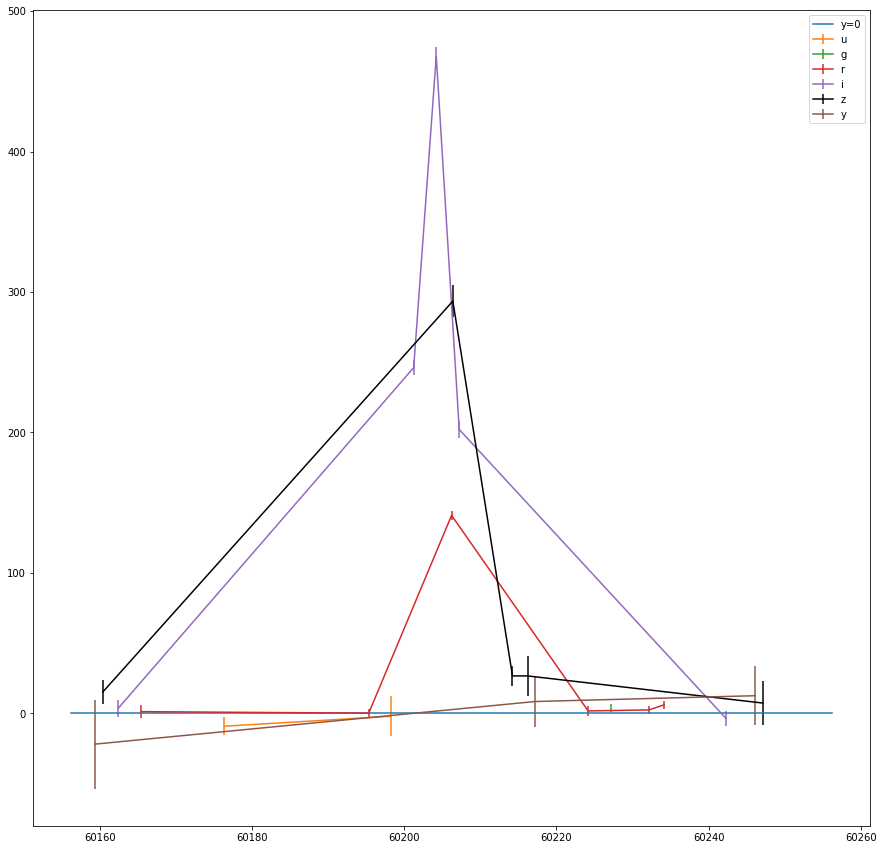

61543226


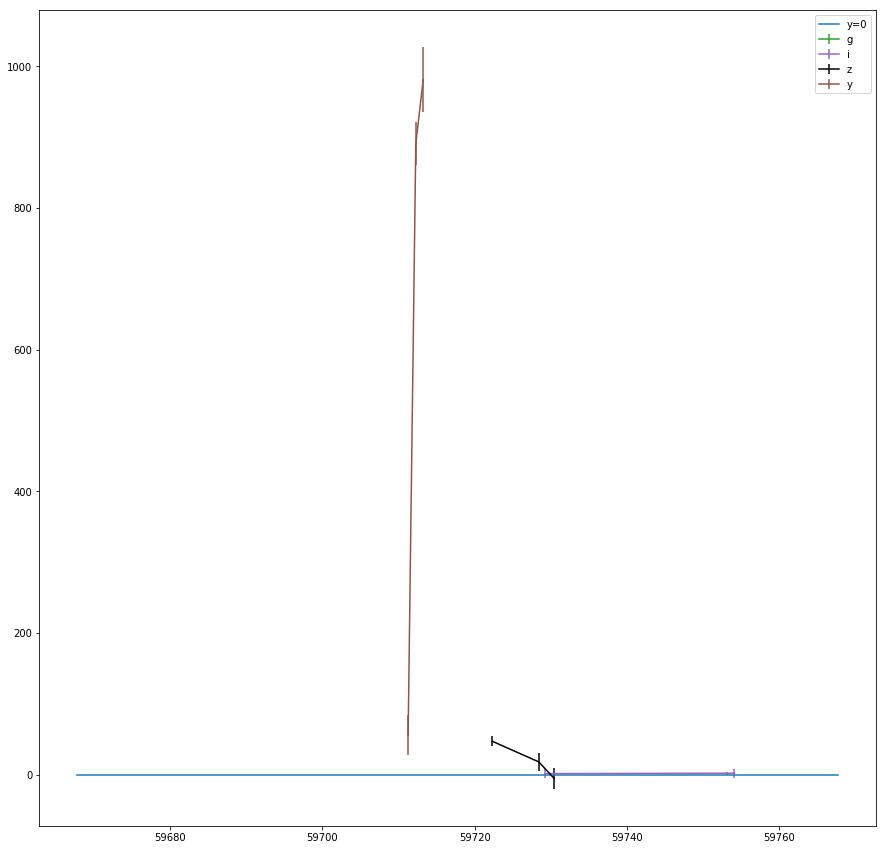

61688145


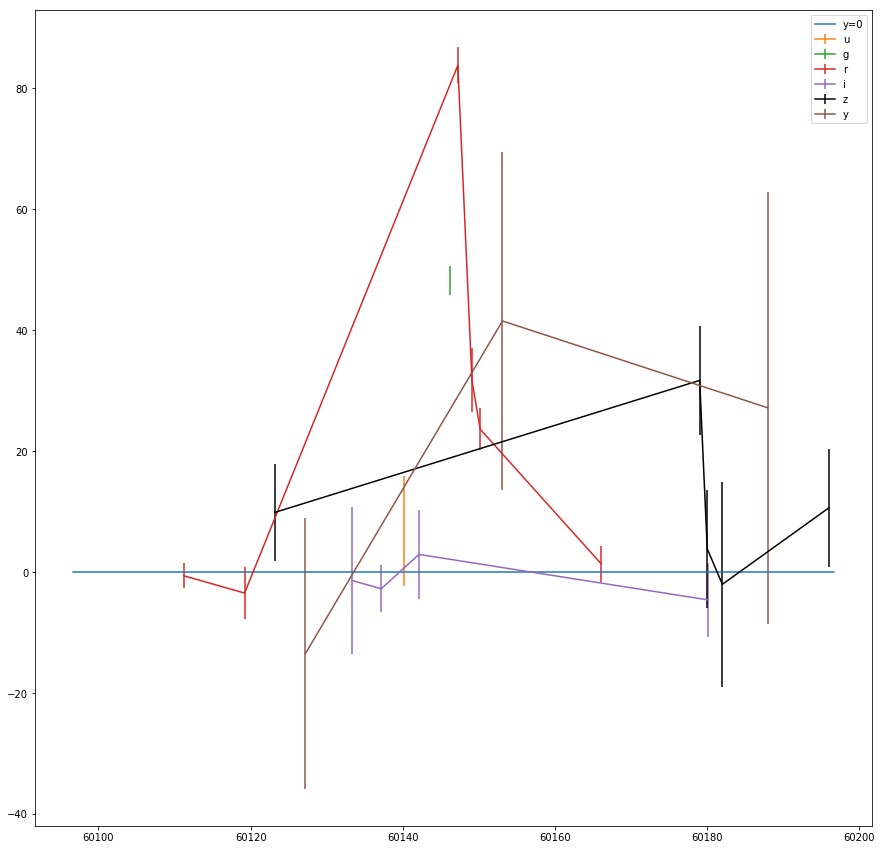

66740787


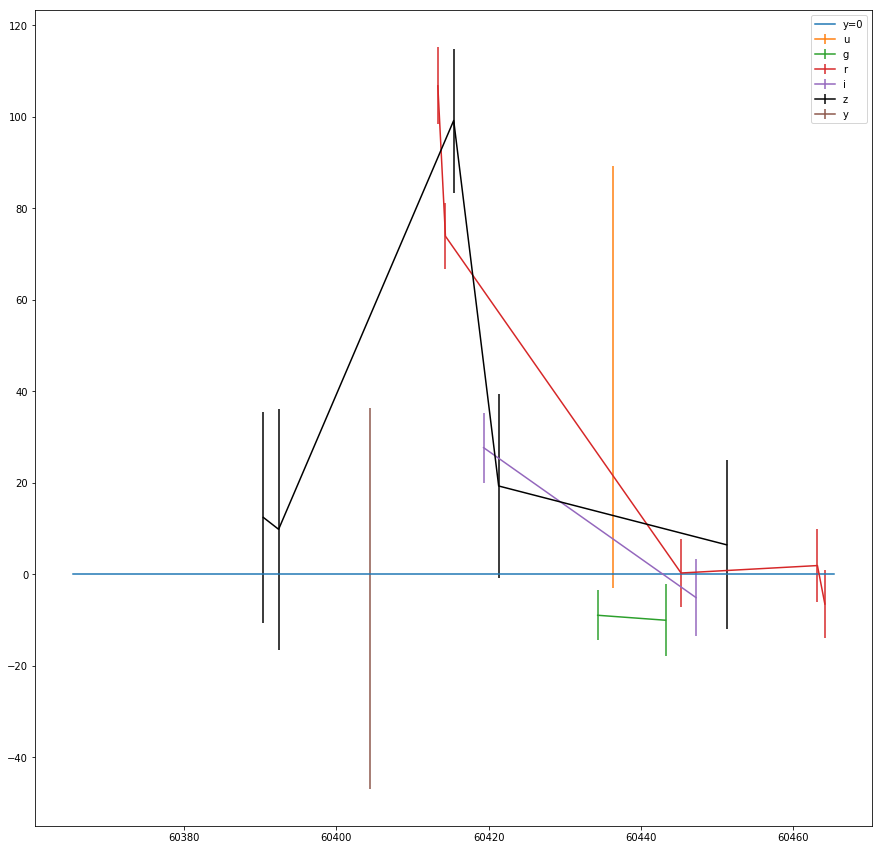

67195030


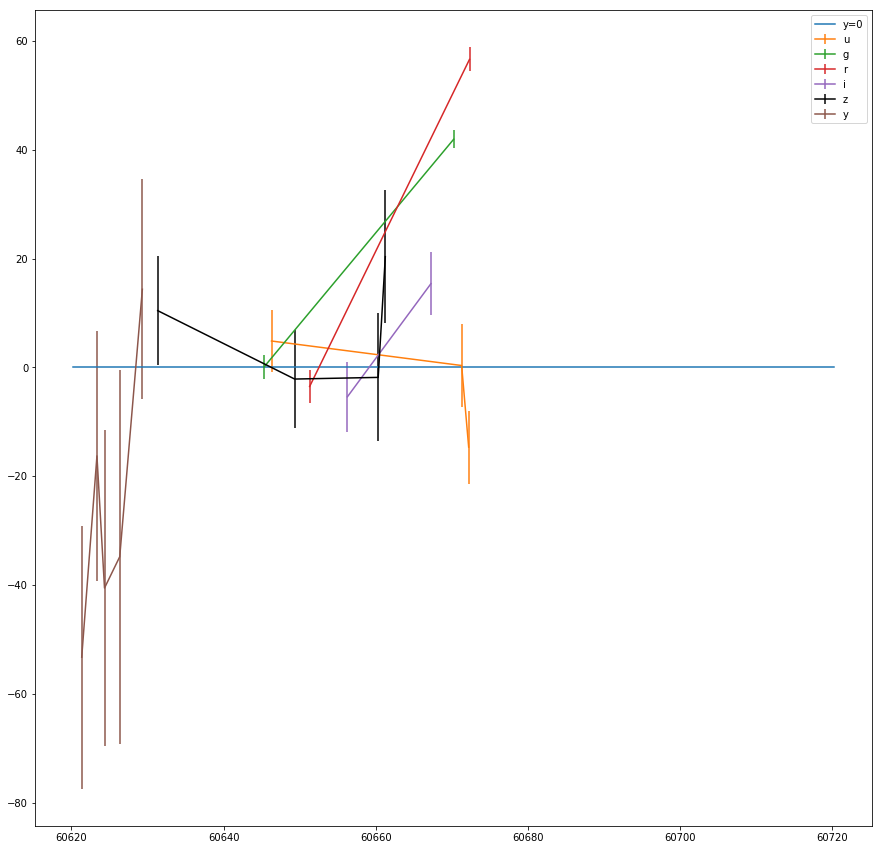

67600070


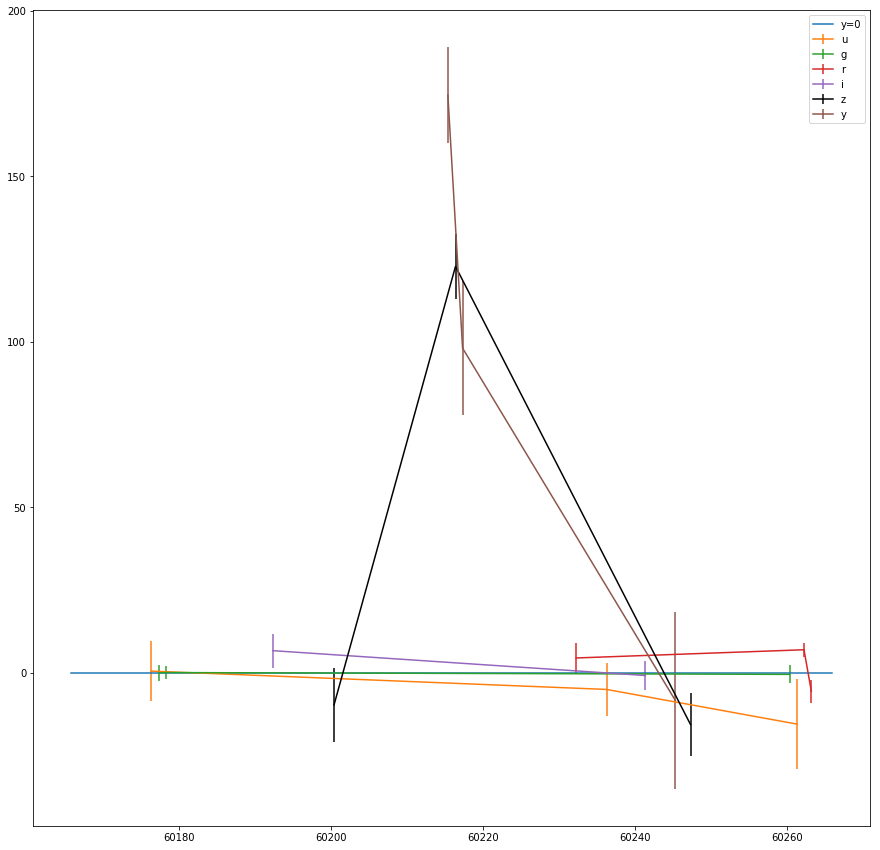

70425954


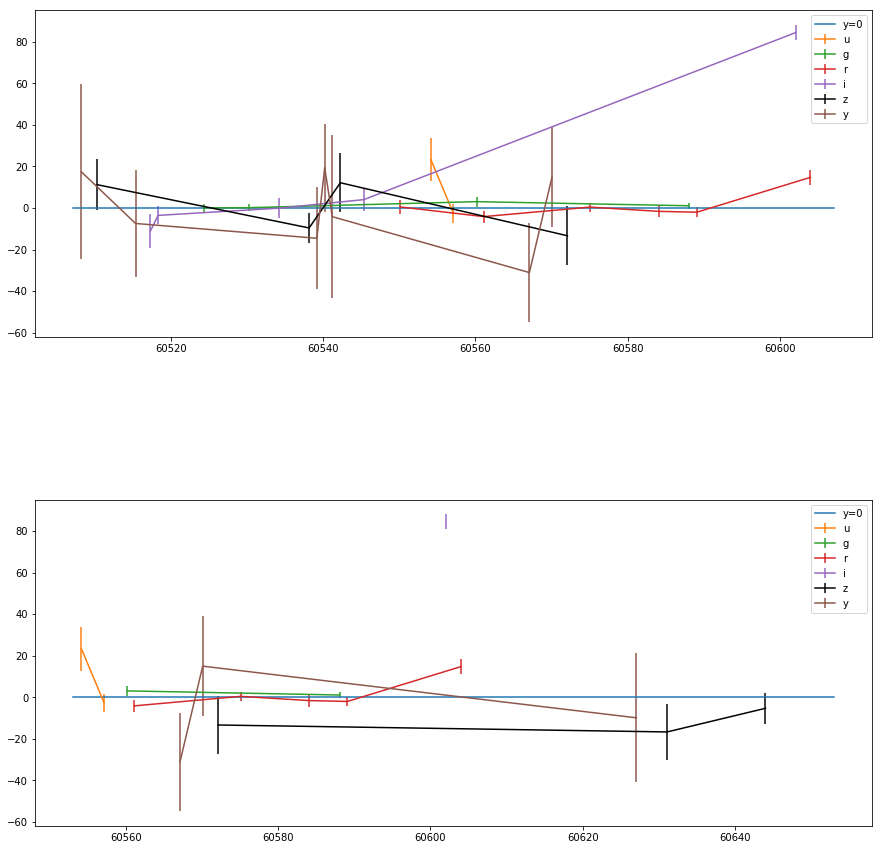

74492858


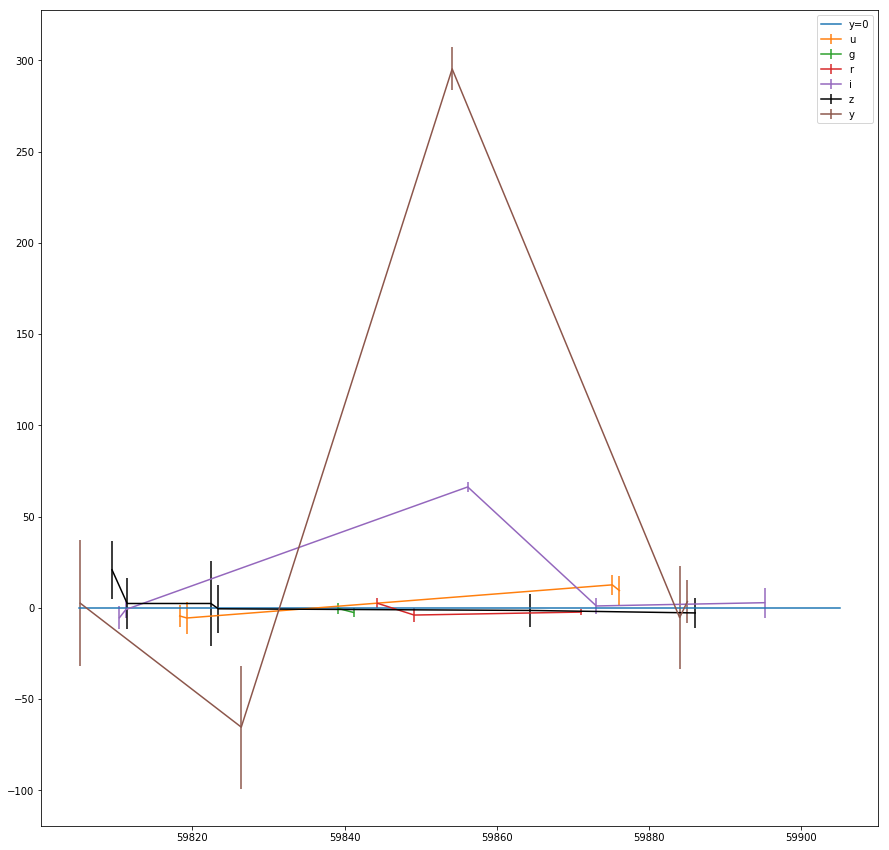

74512775


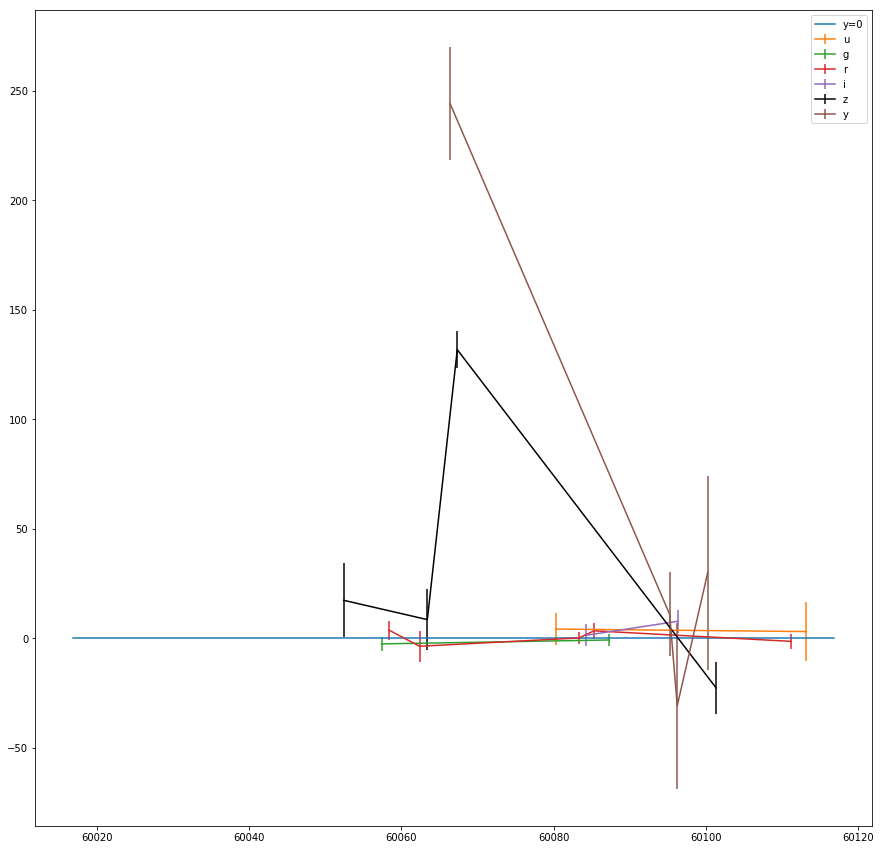

74943698


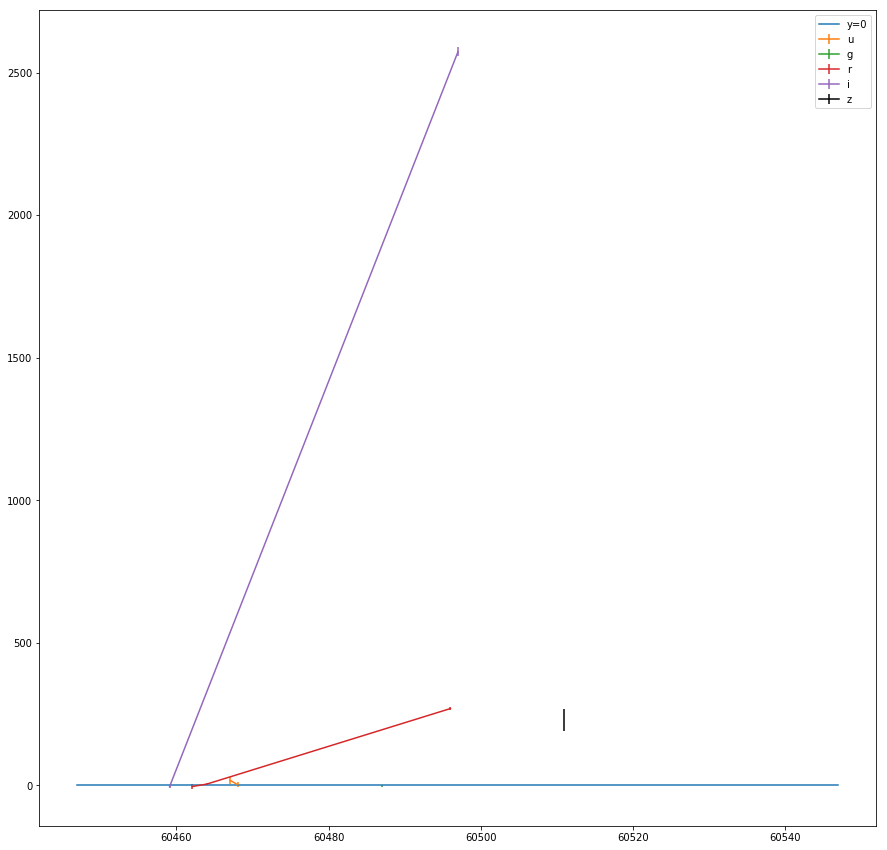

75080064


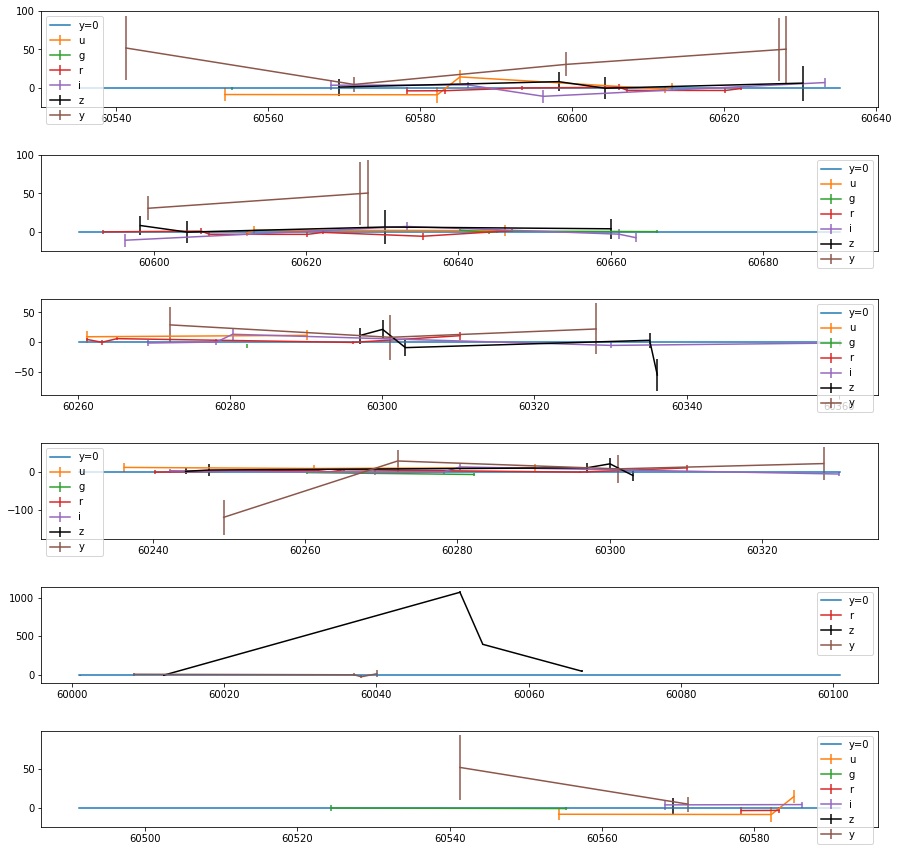

75218022


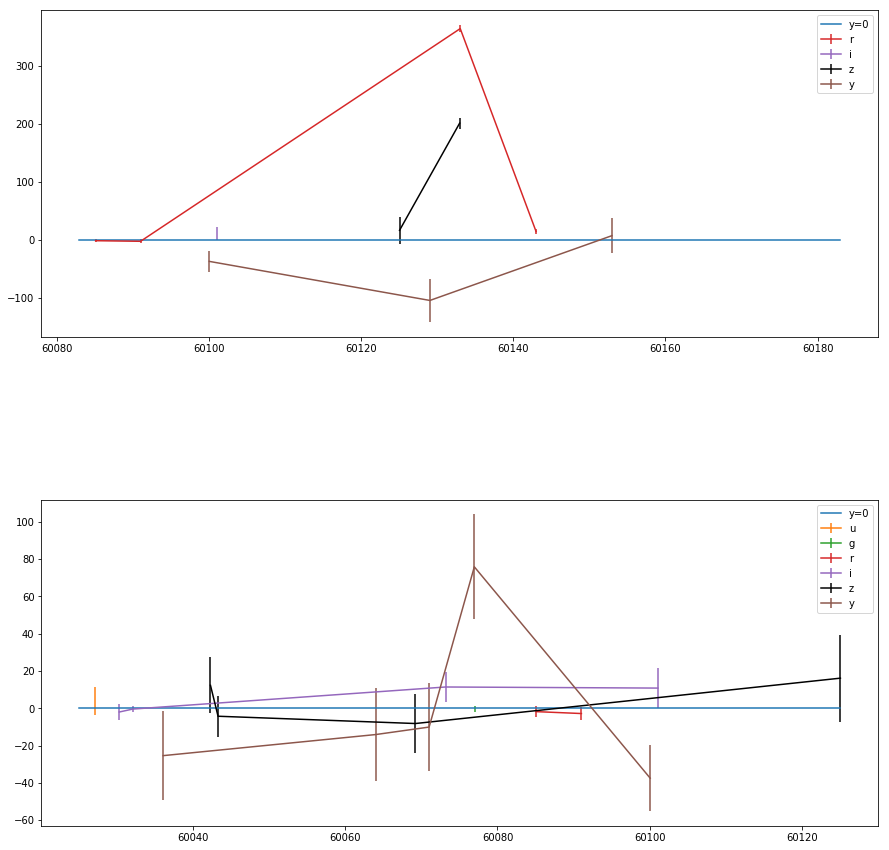

76457103


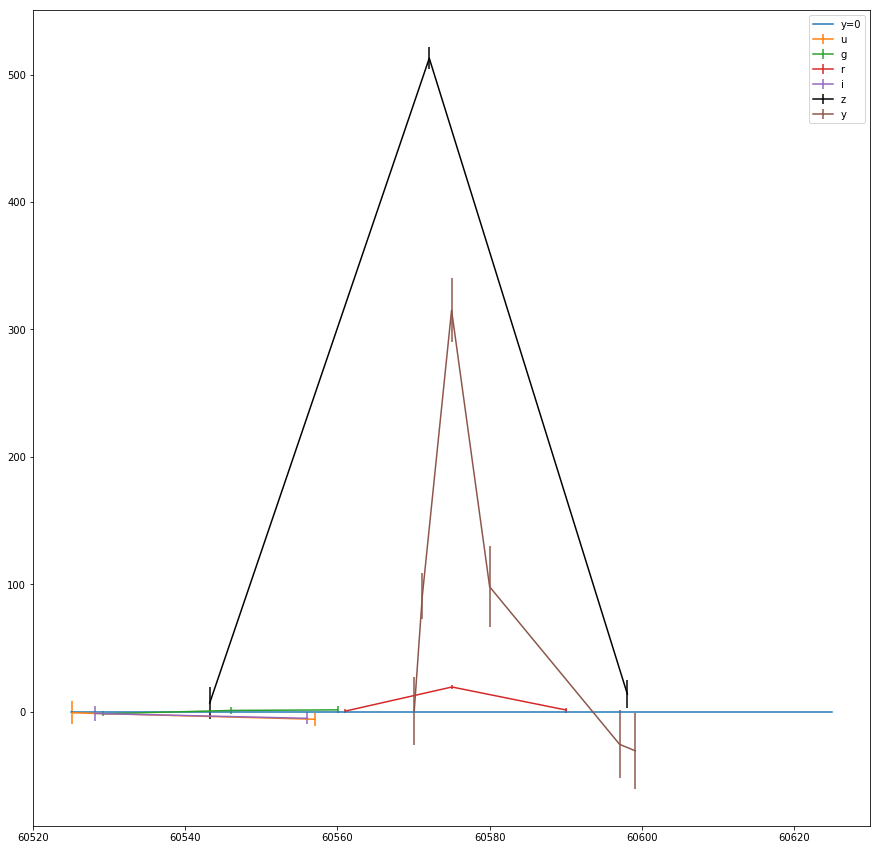

80913604


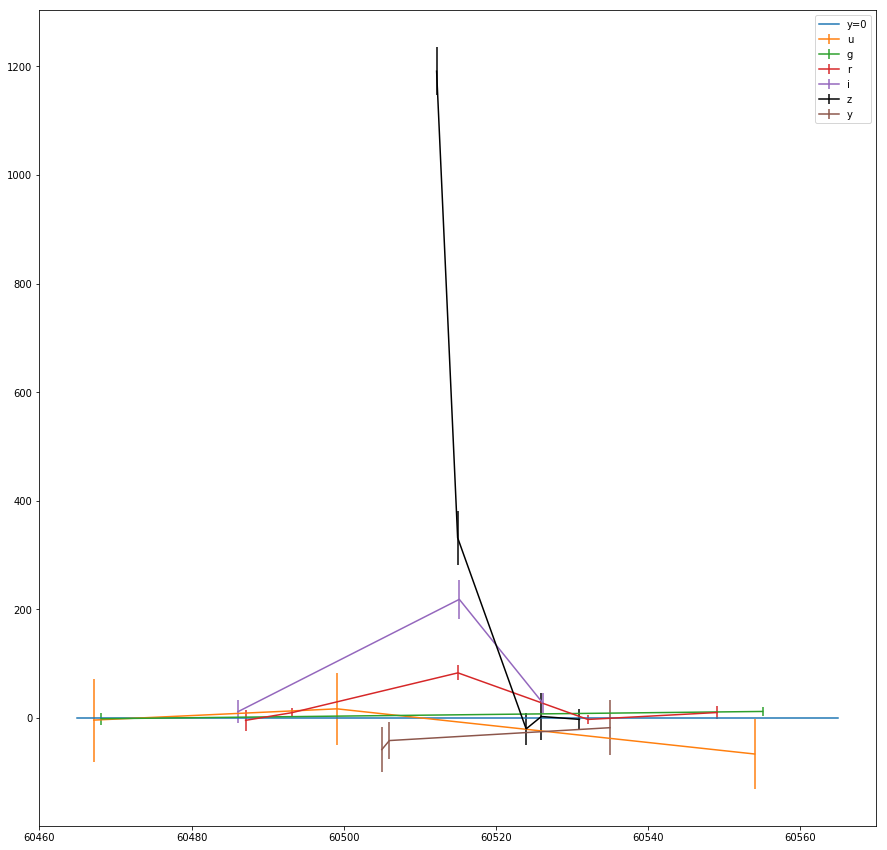

81456459


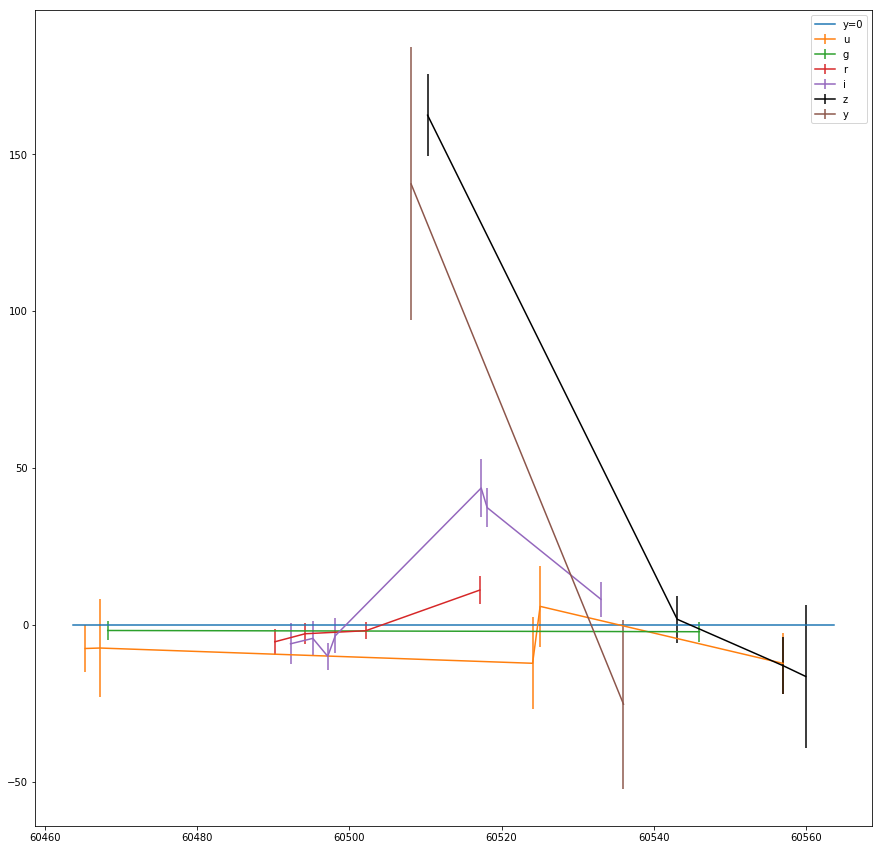

84706583


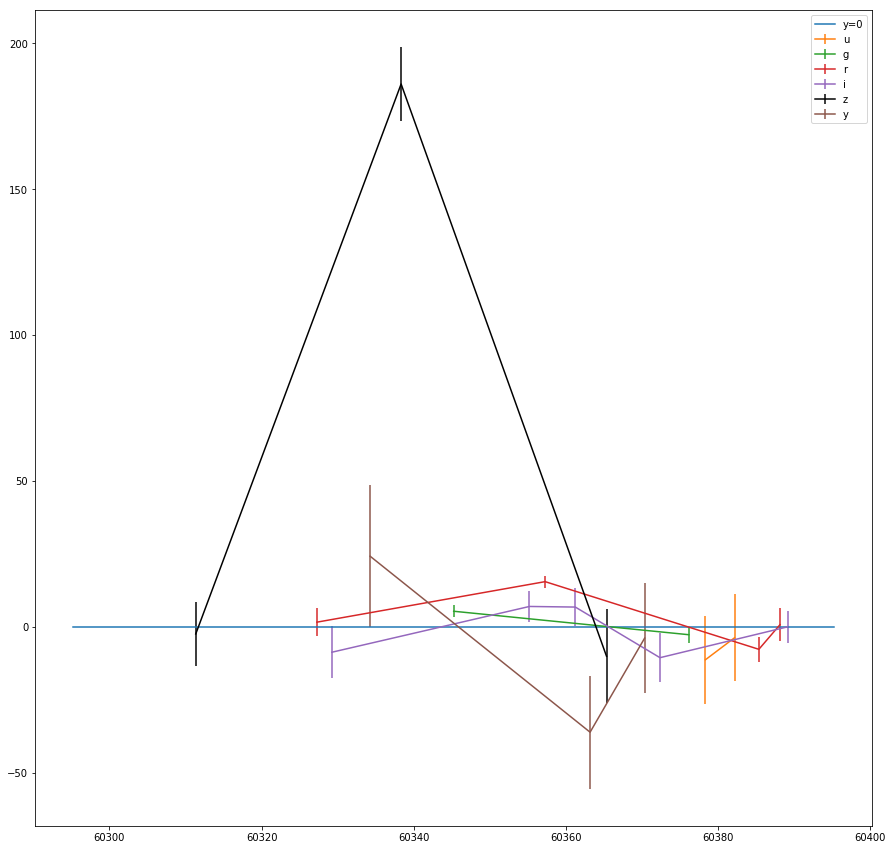

85030920


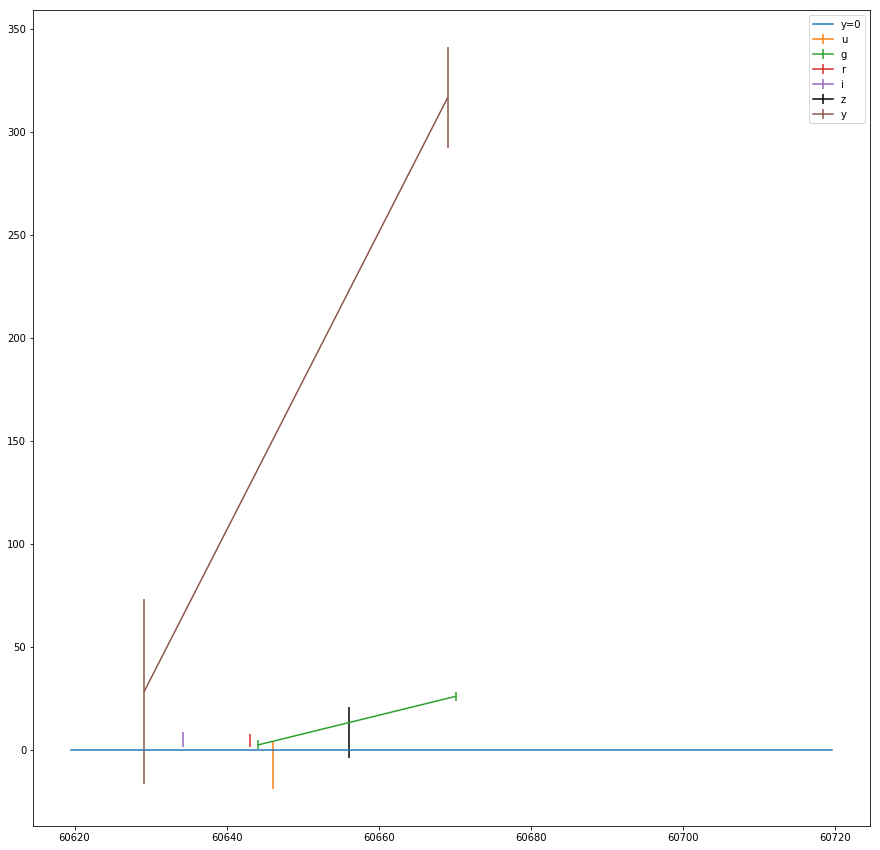

86490974


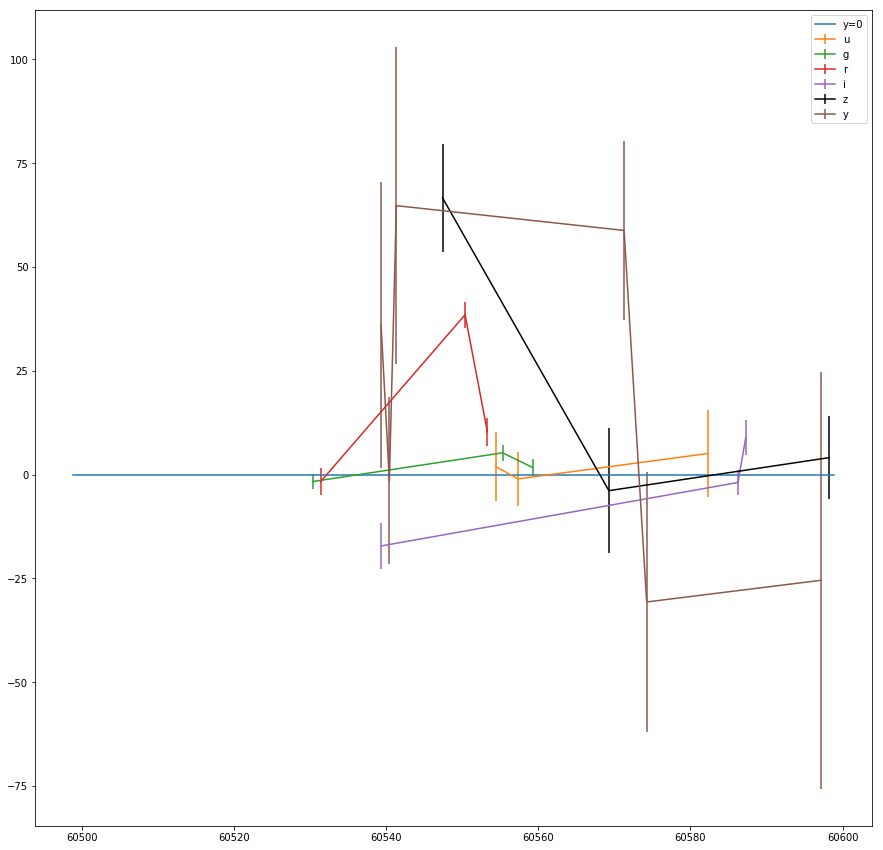

89733353


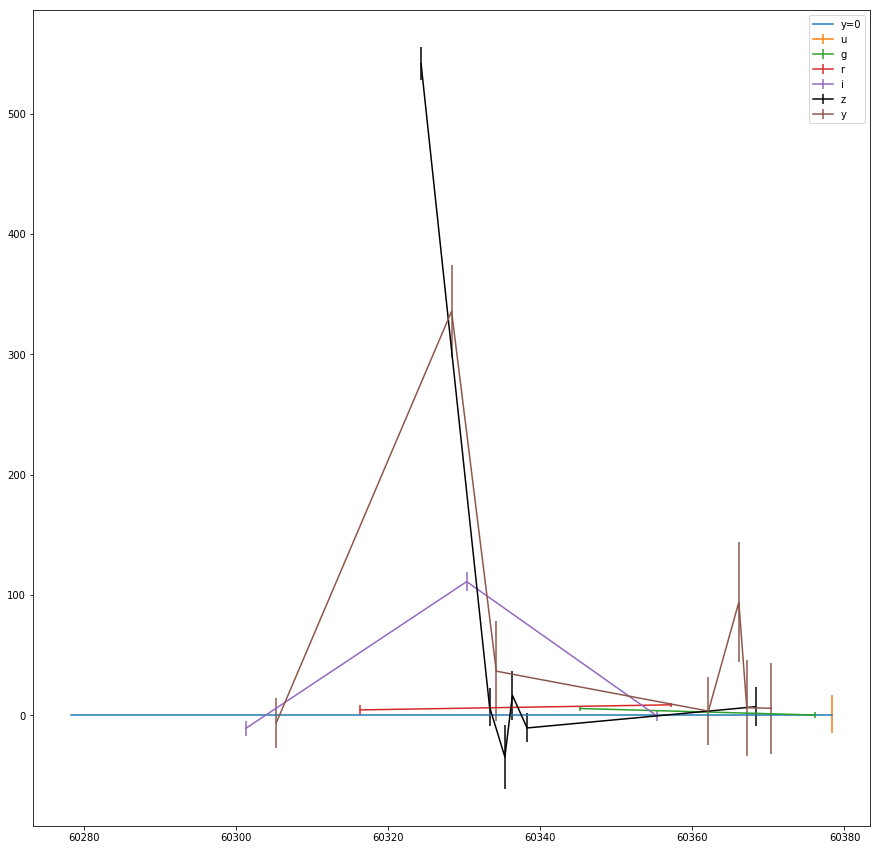

89942025


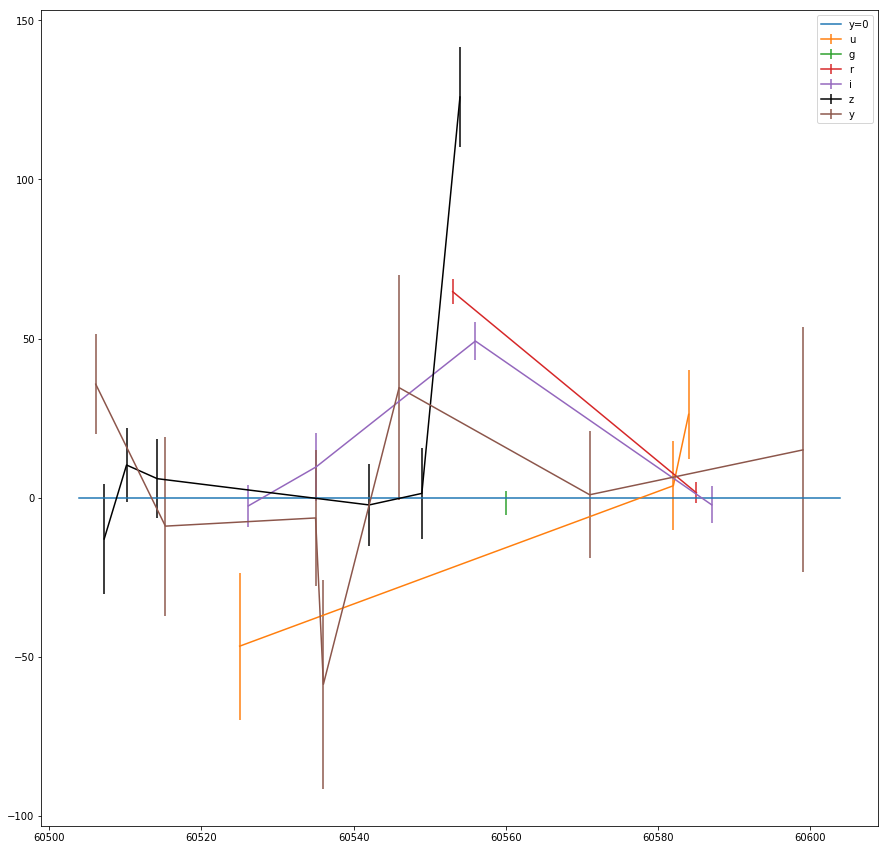

90269218


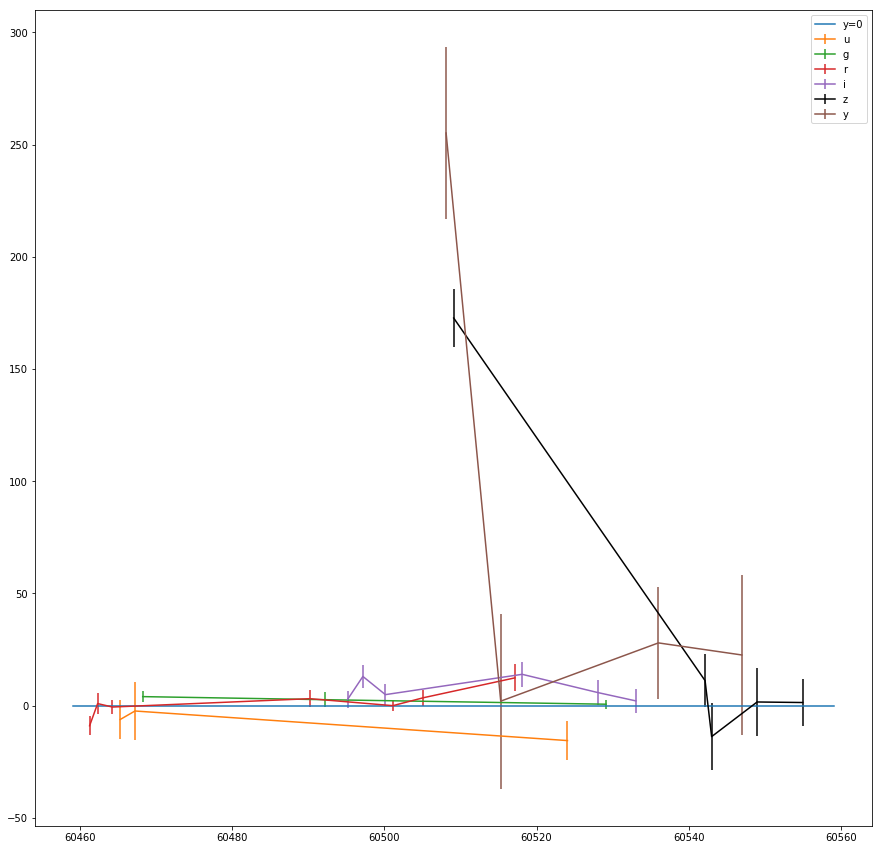

93121505


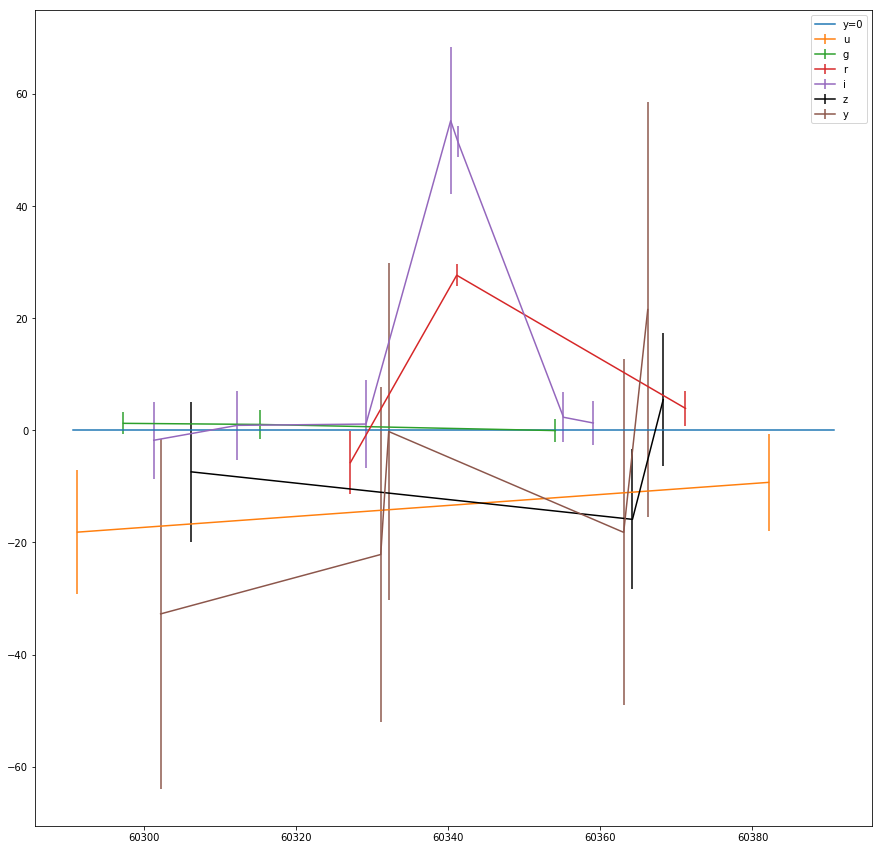

93394704


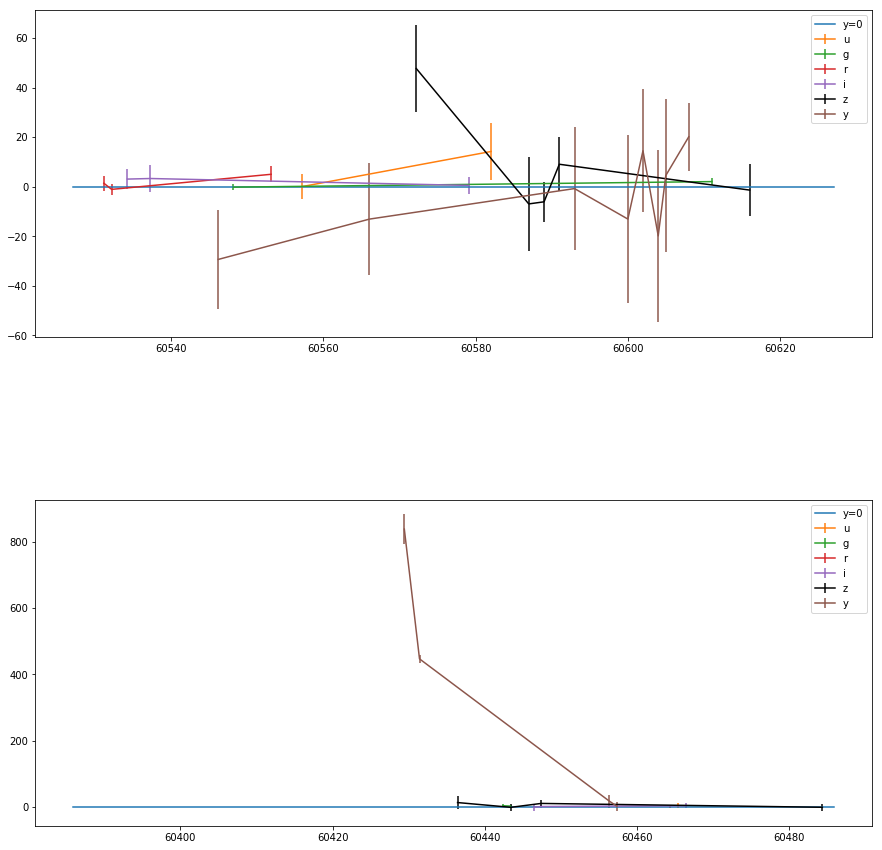

93725998


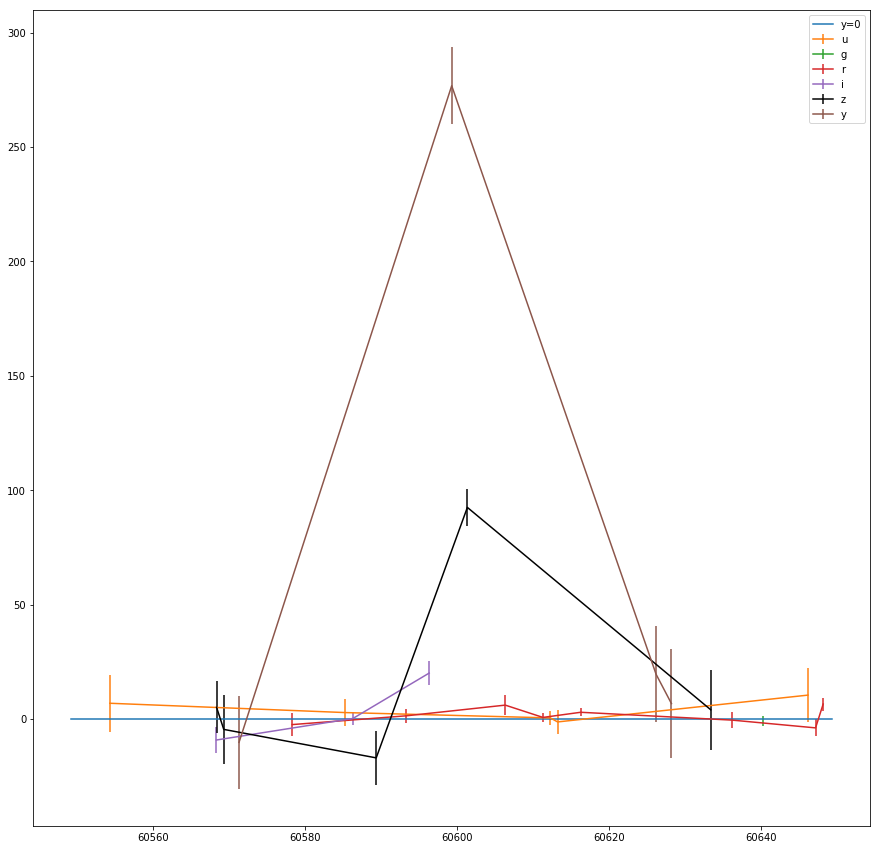

95541281


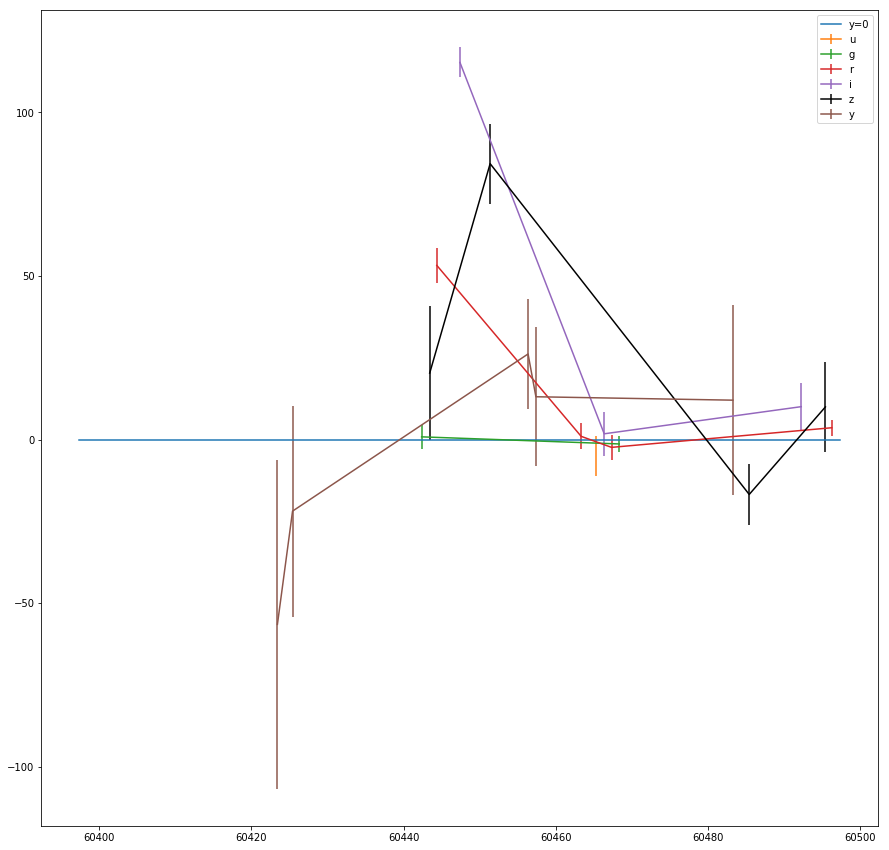

96619113


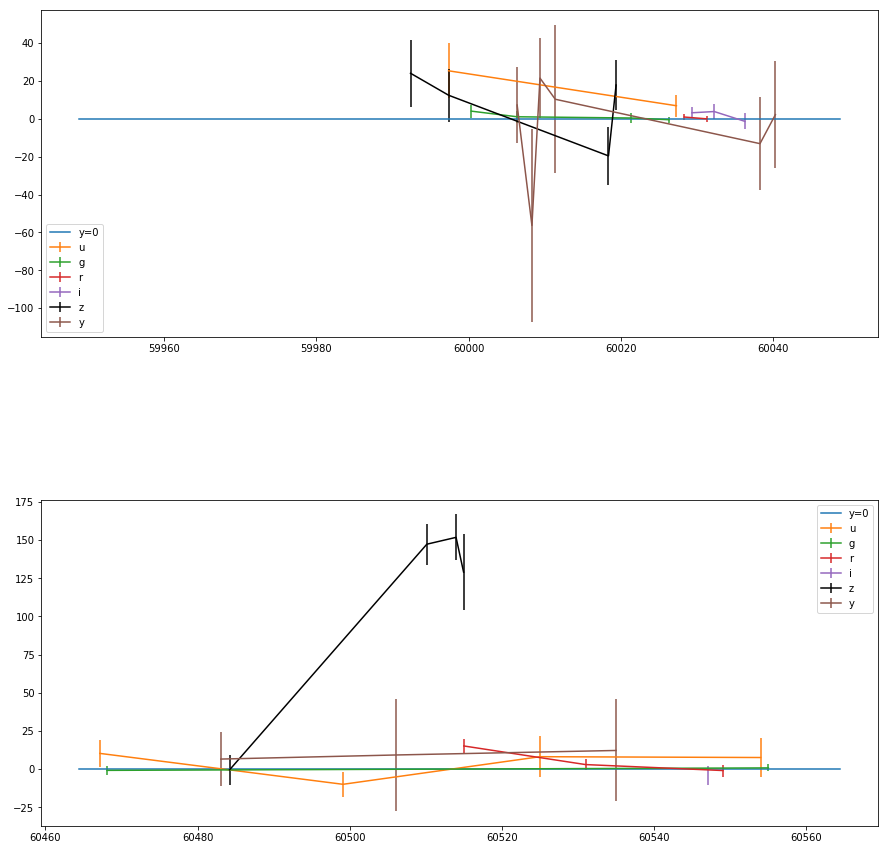

97214939


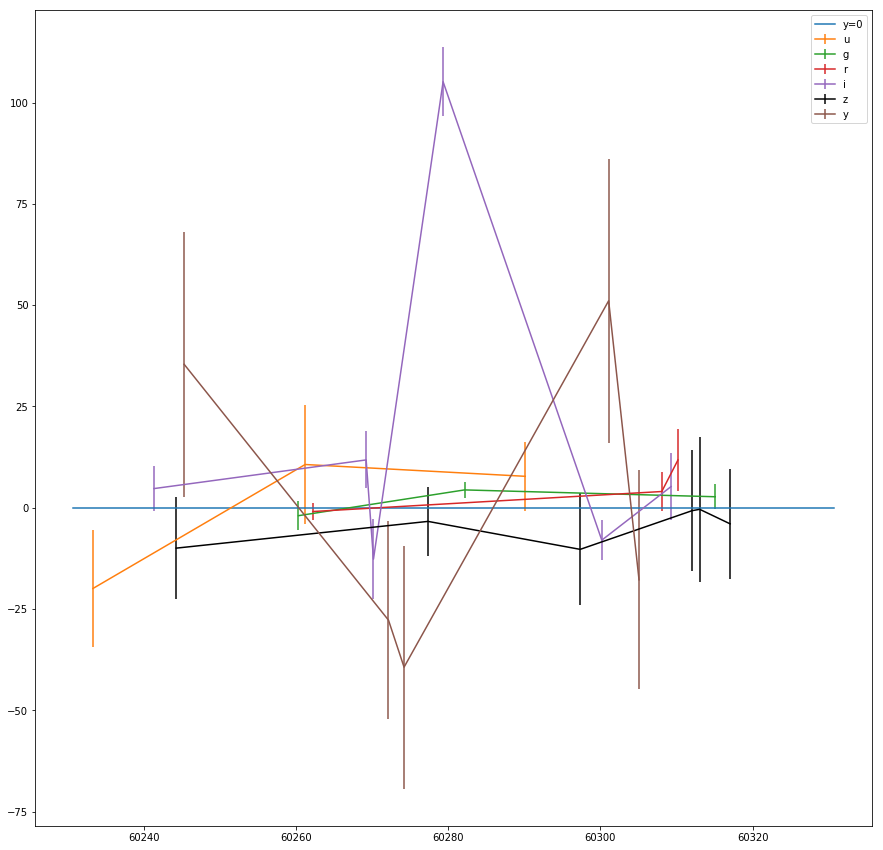

97639845


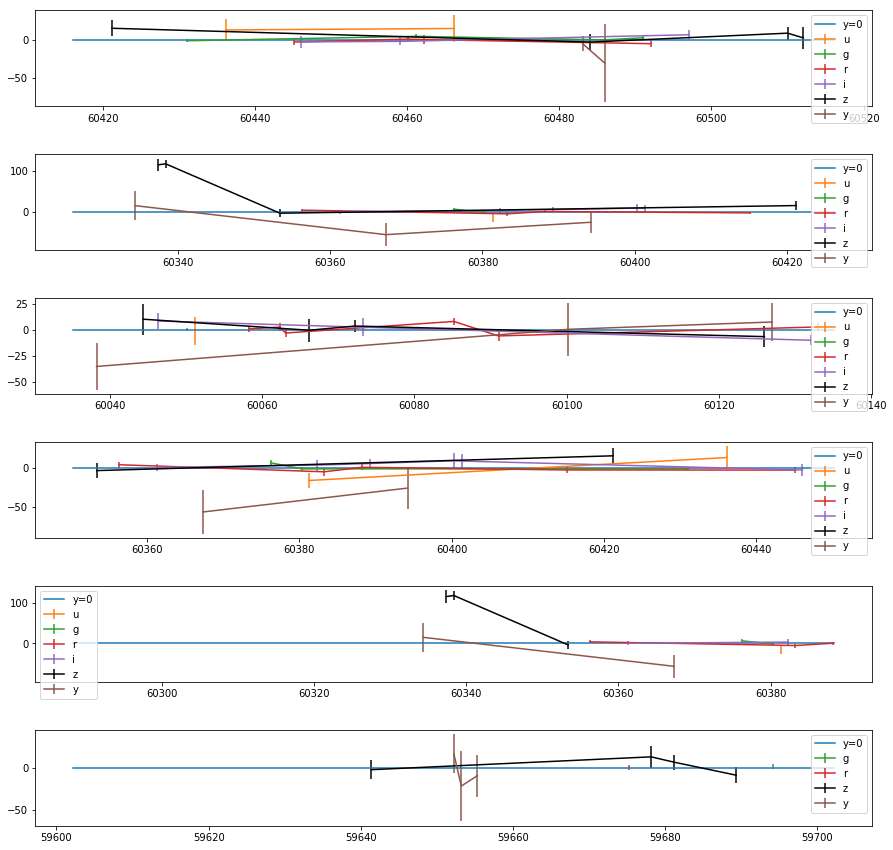

97765302


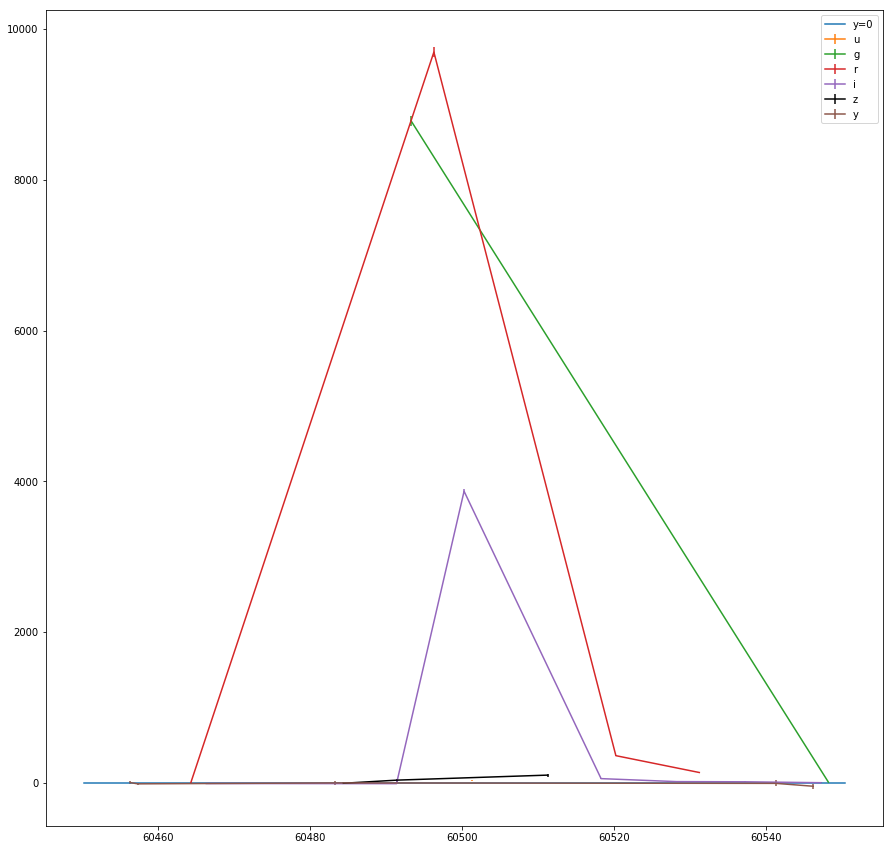

99449747


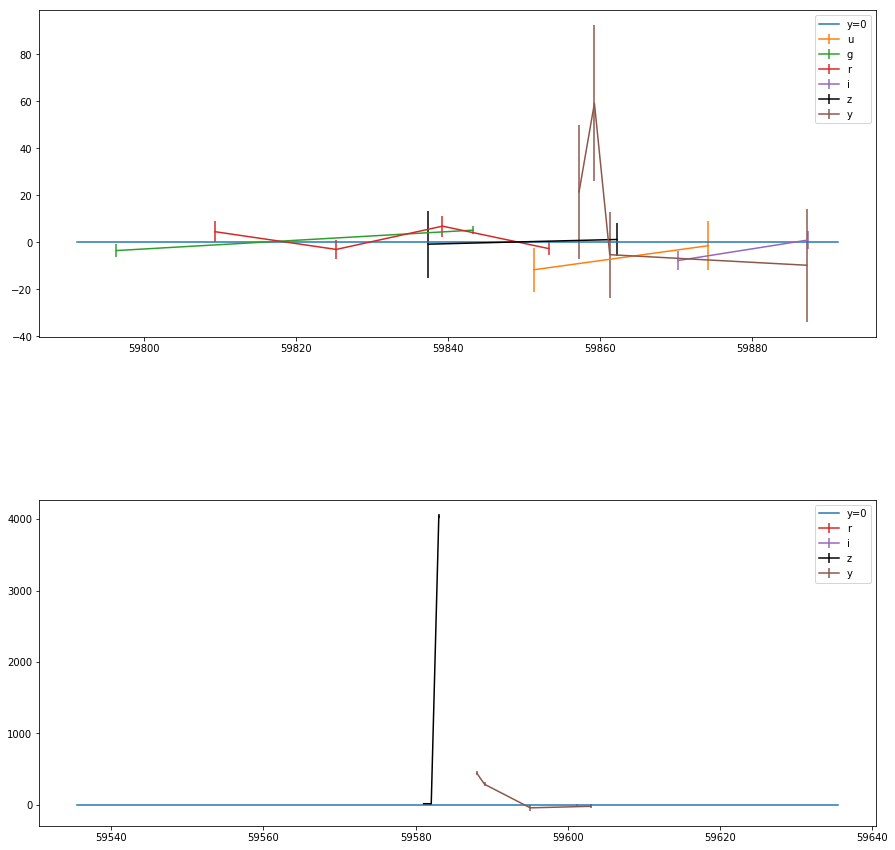

102551107


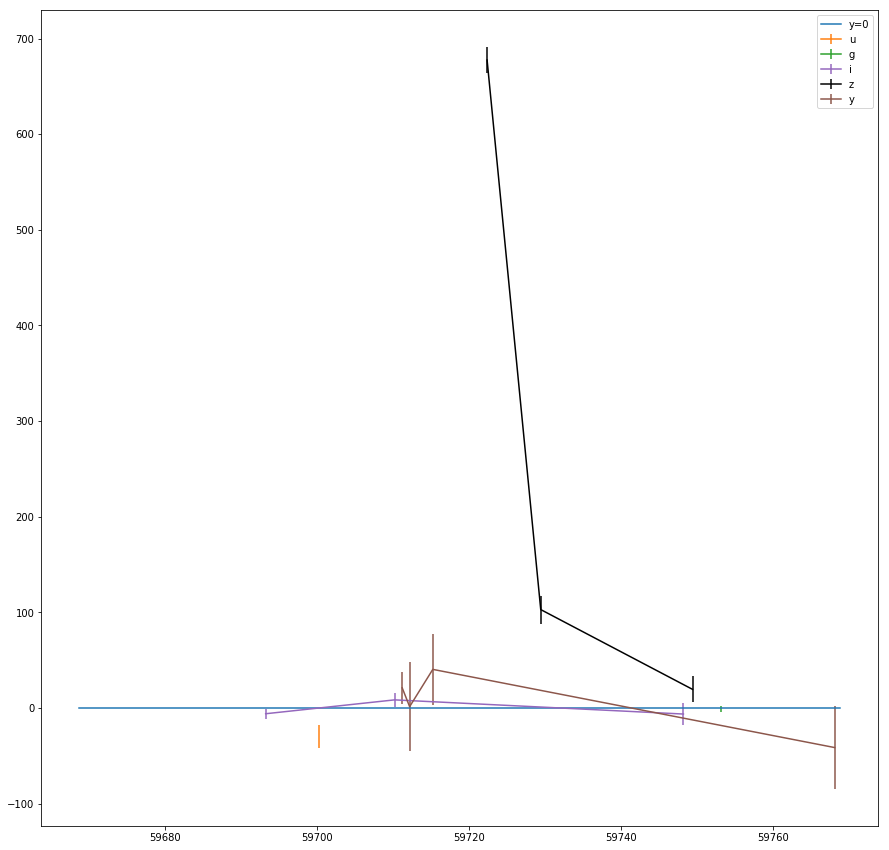

102599855


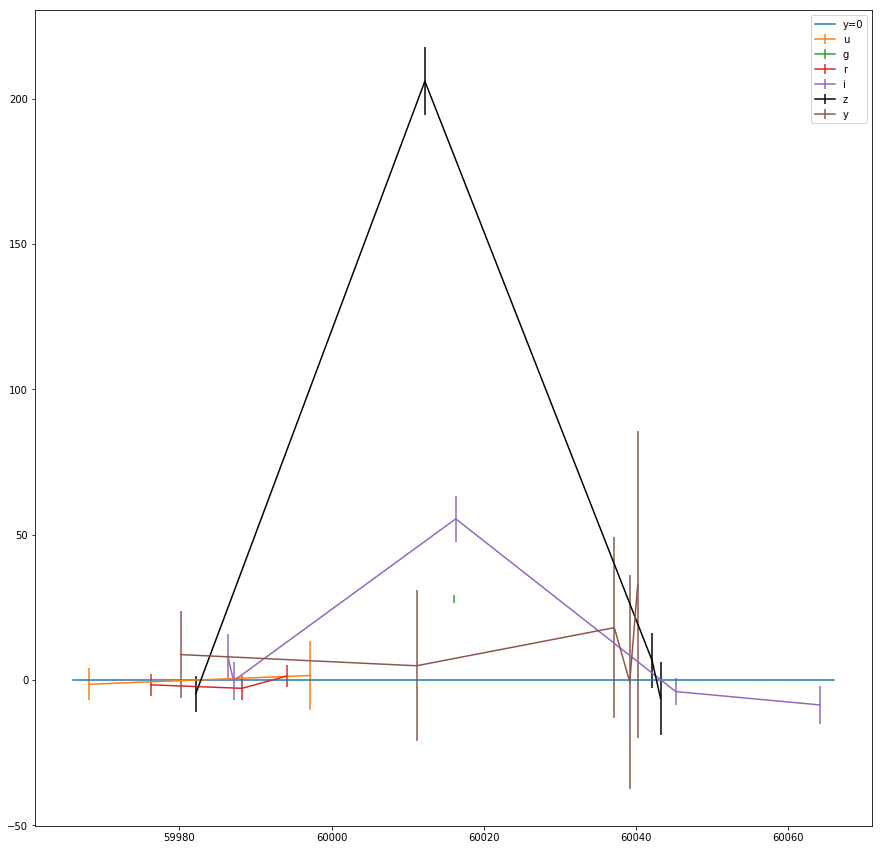

103258429


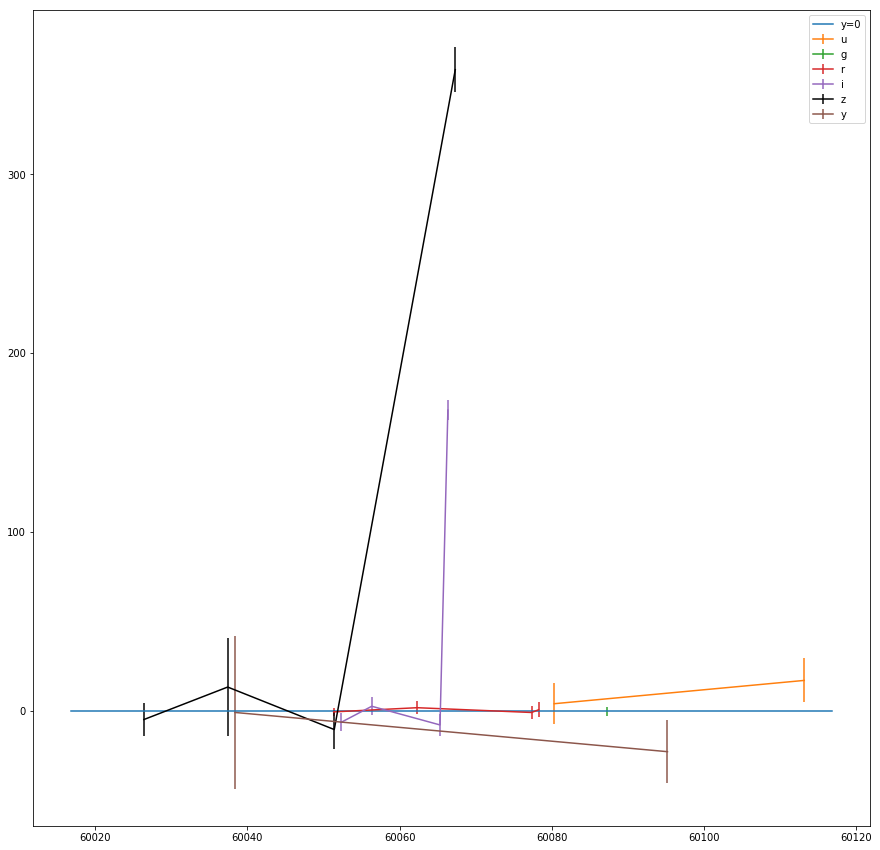

103989029


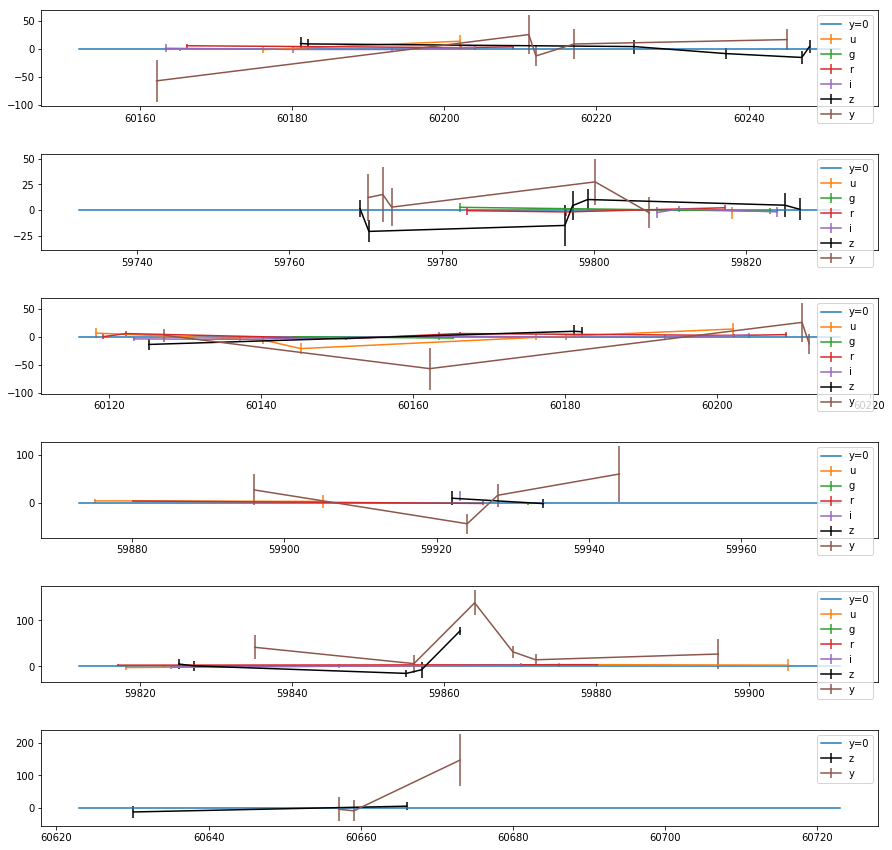

105385367


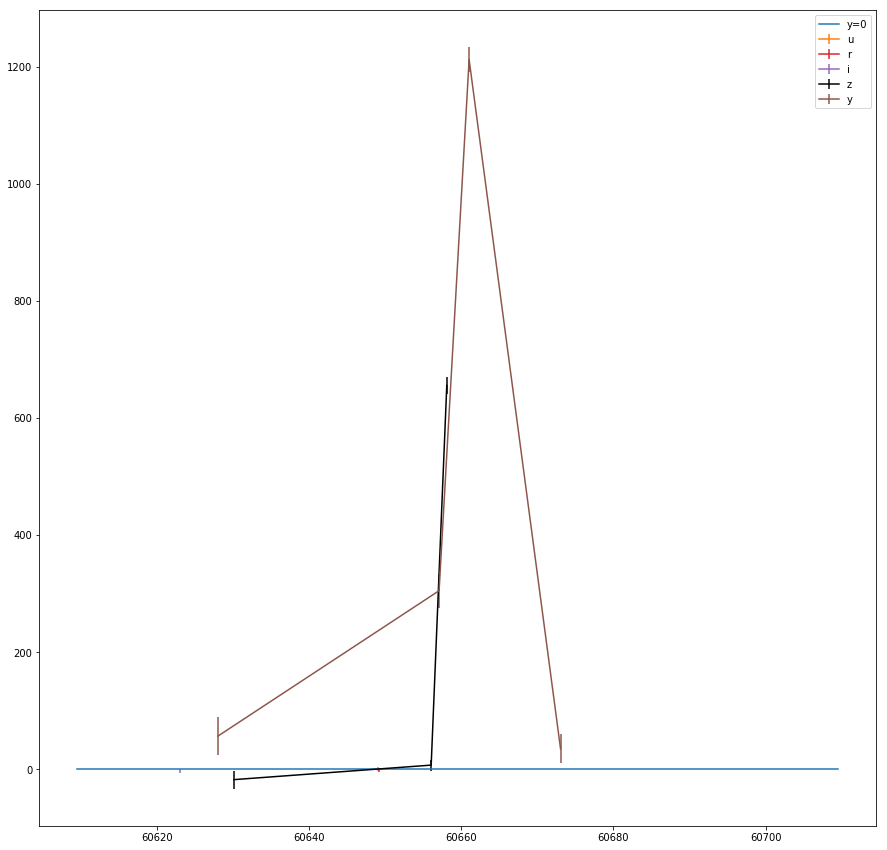

107129776


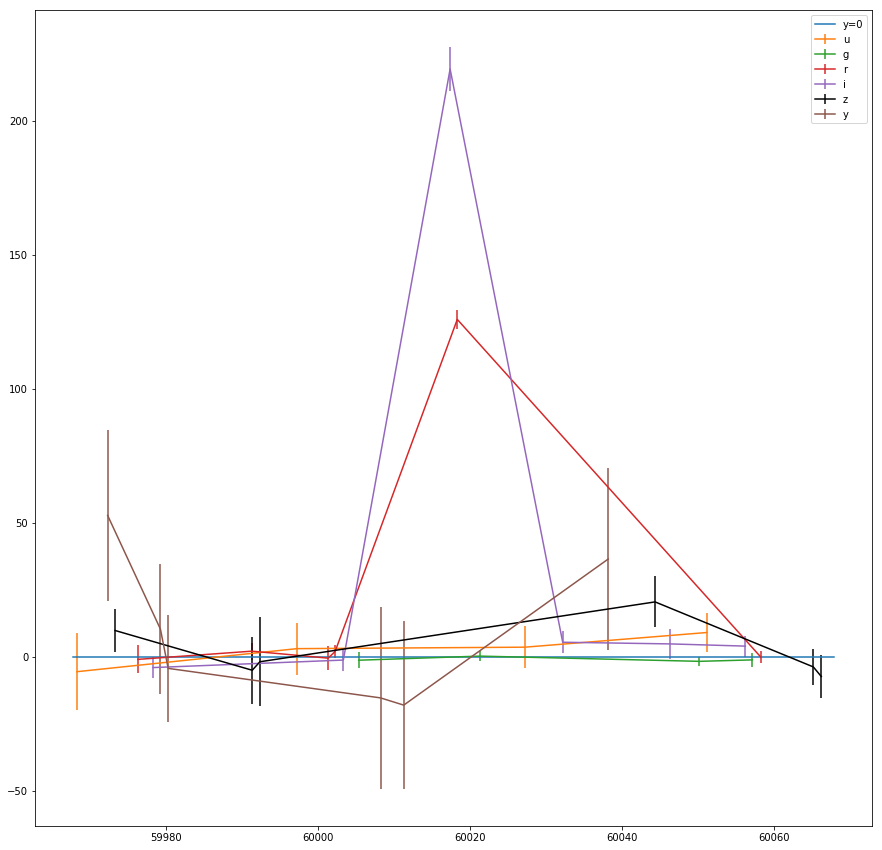

108253858


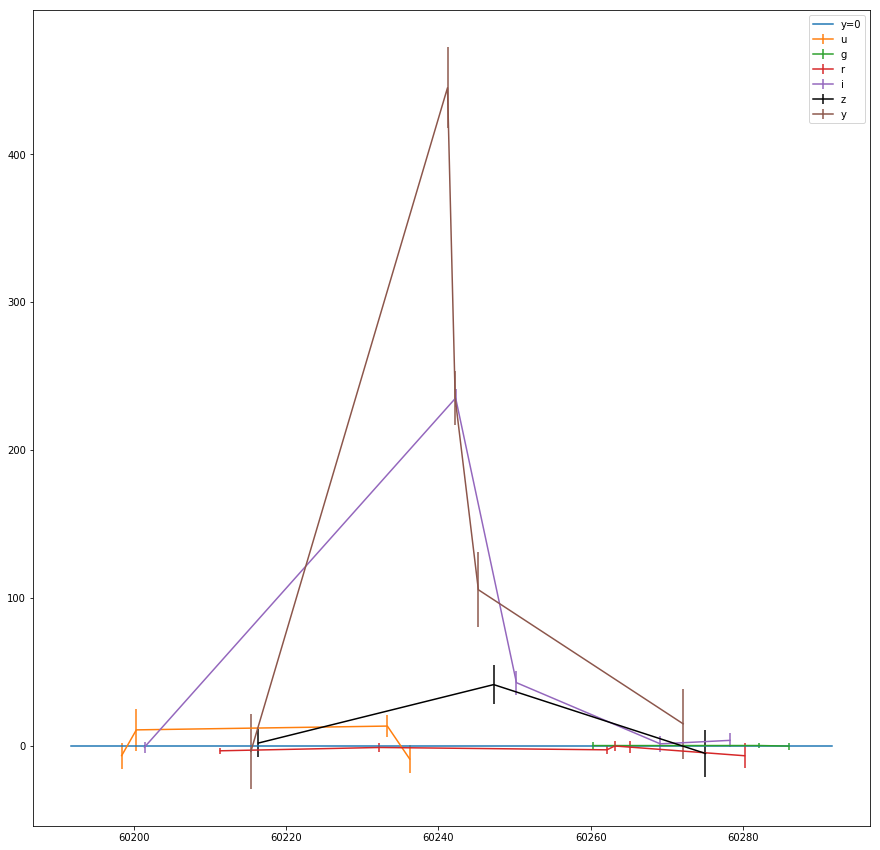

108305965


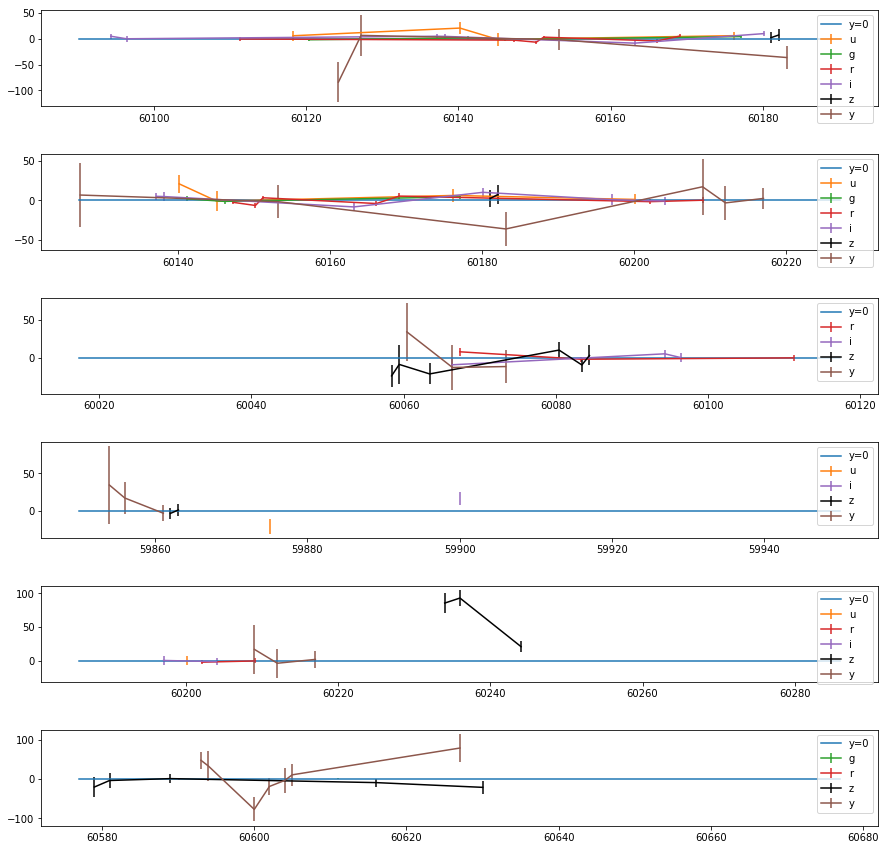

110808232


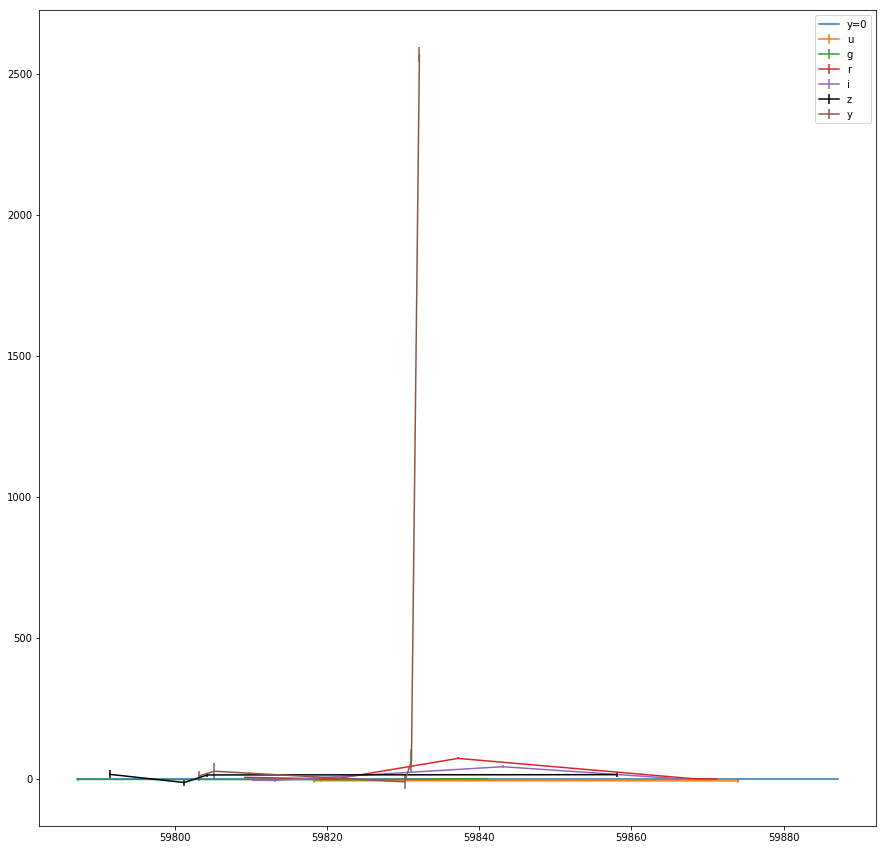

113330500


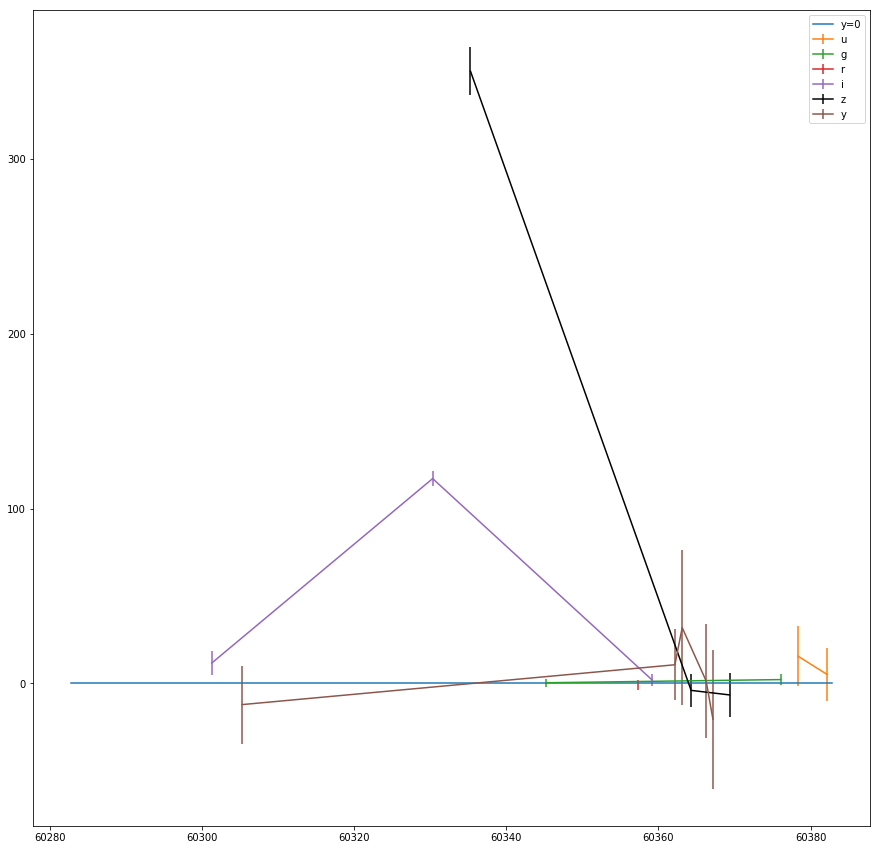

113678572


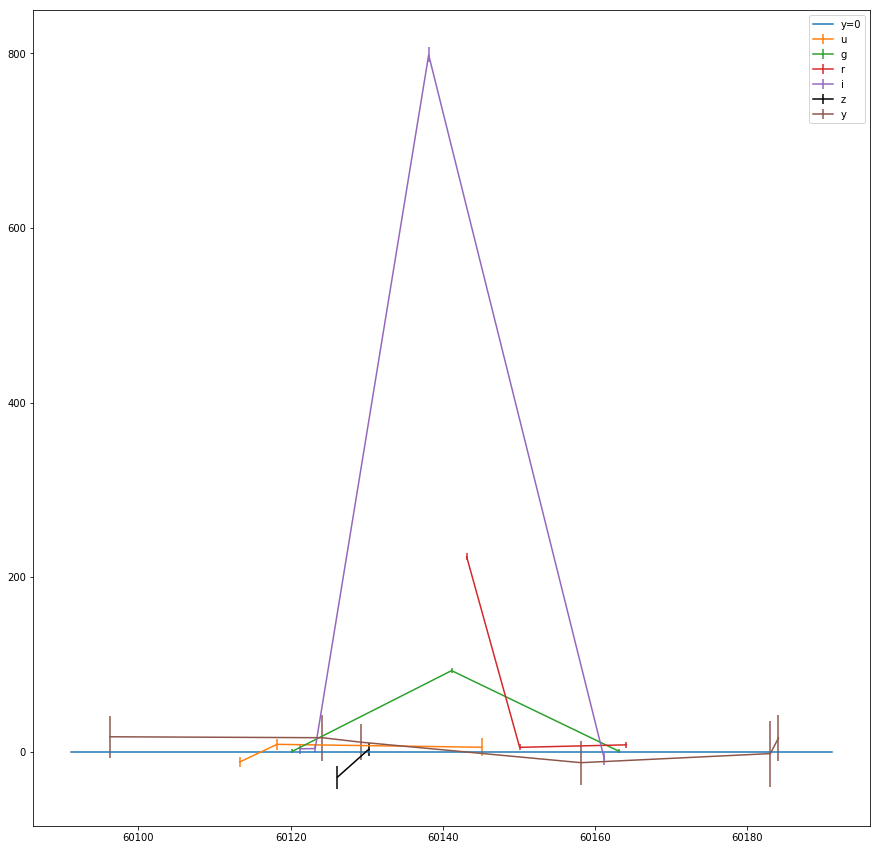

113851505


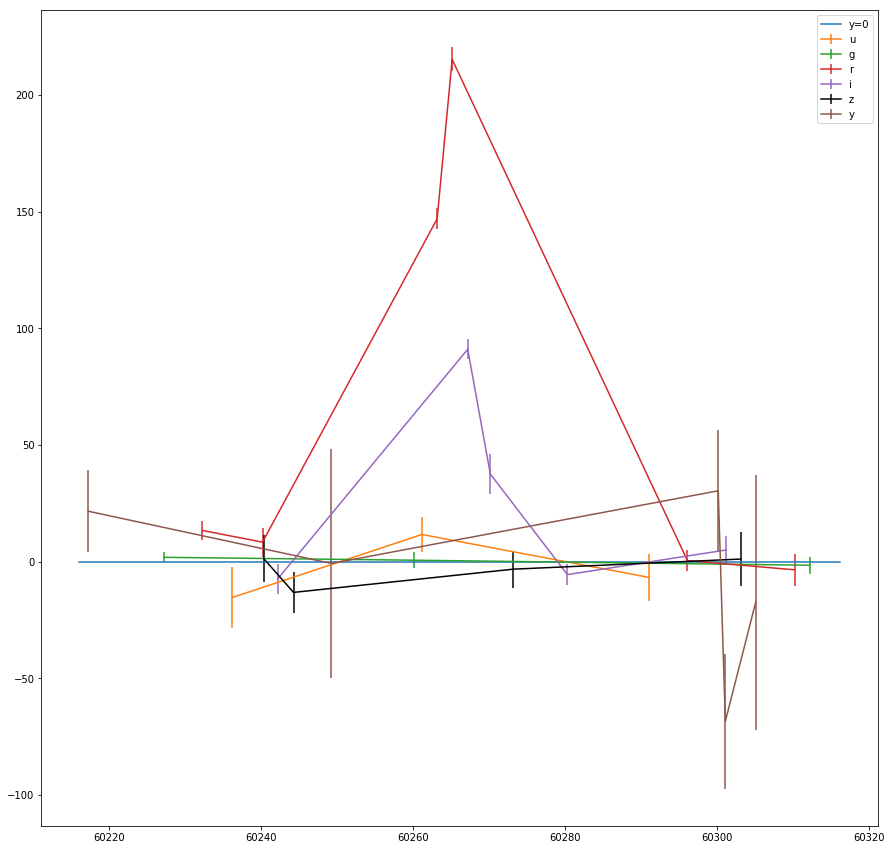

114467134


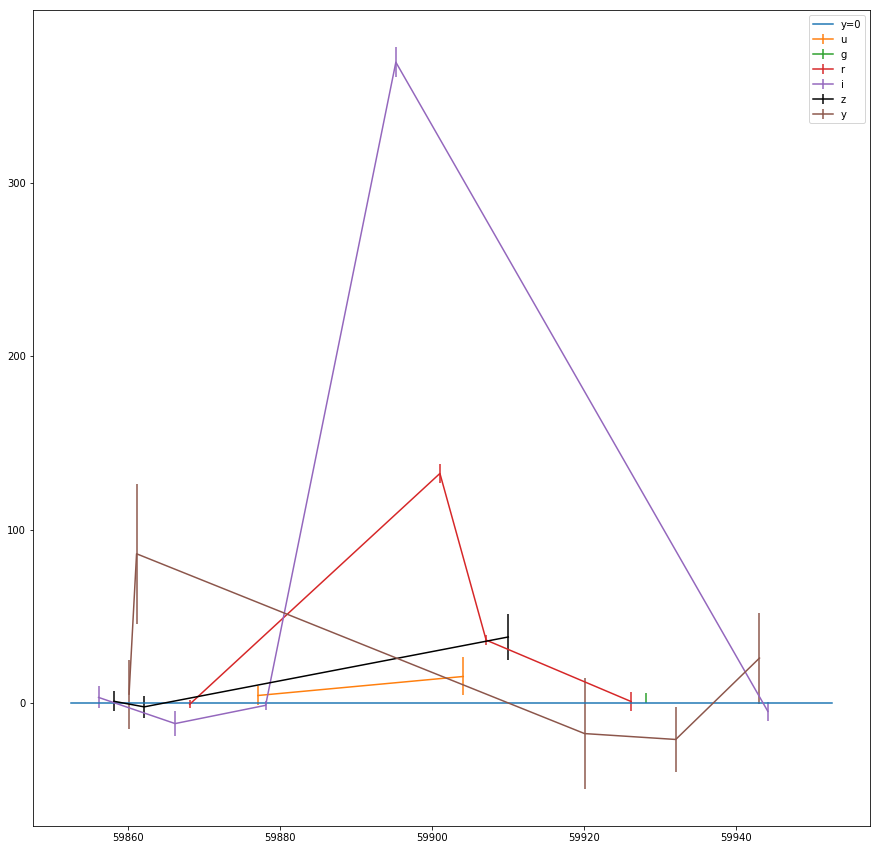

115381923


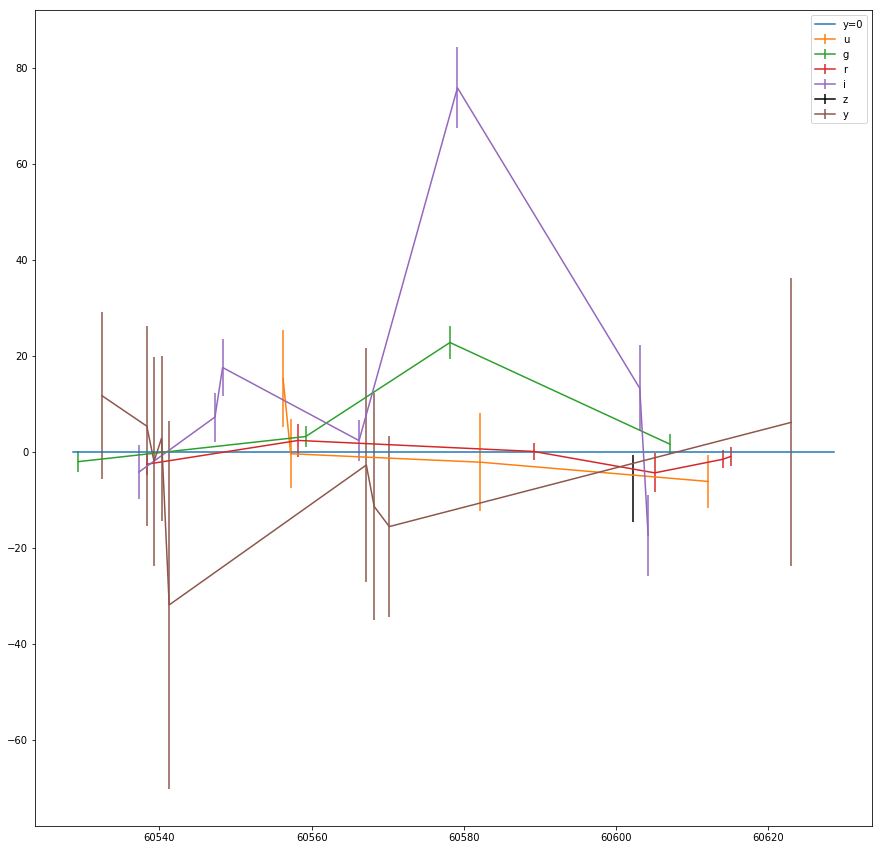

115713701


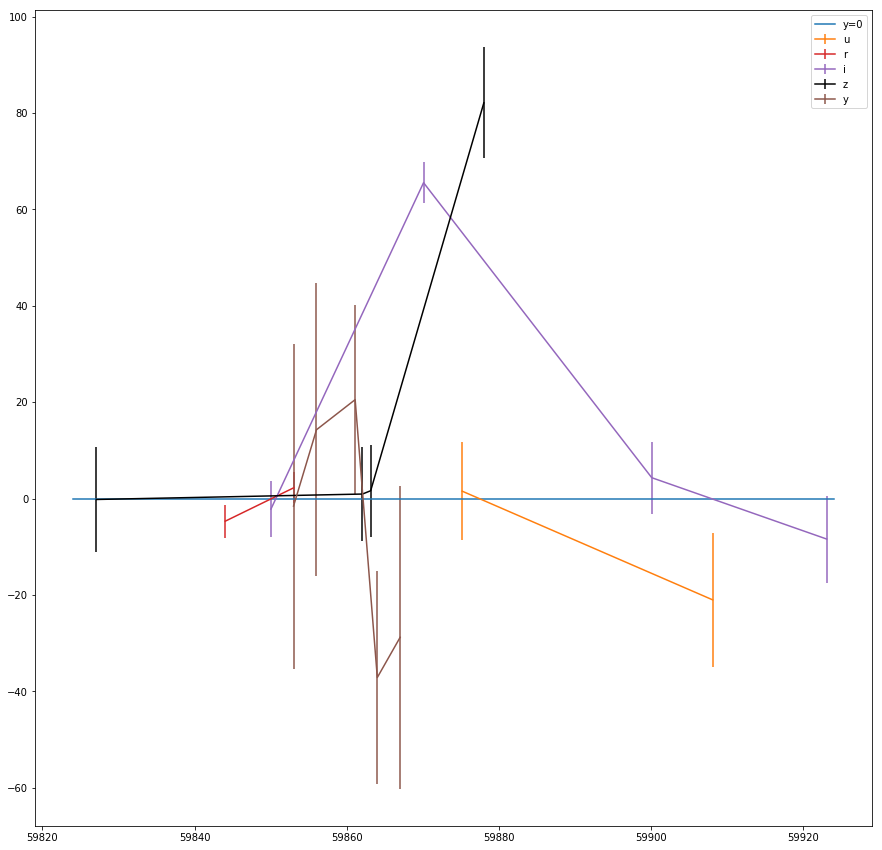

118230321


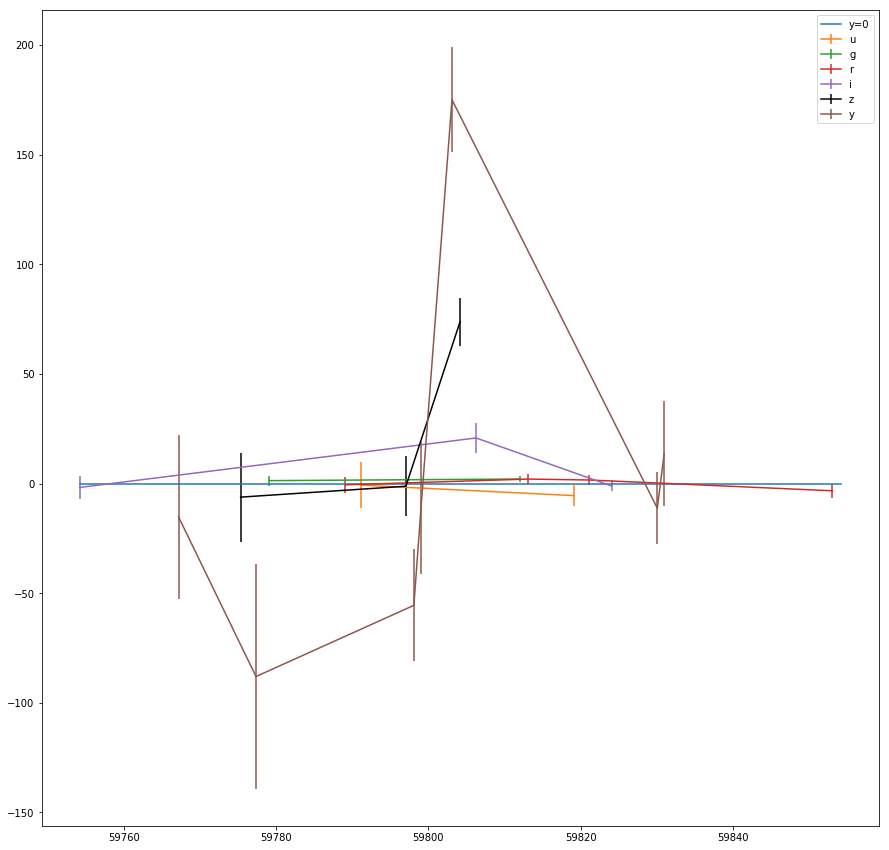

119260275


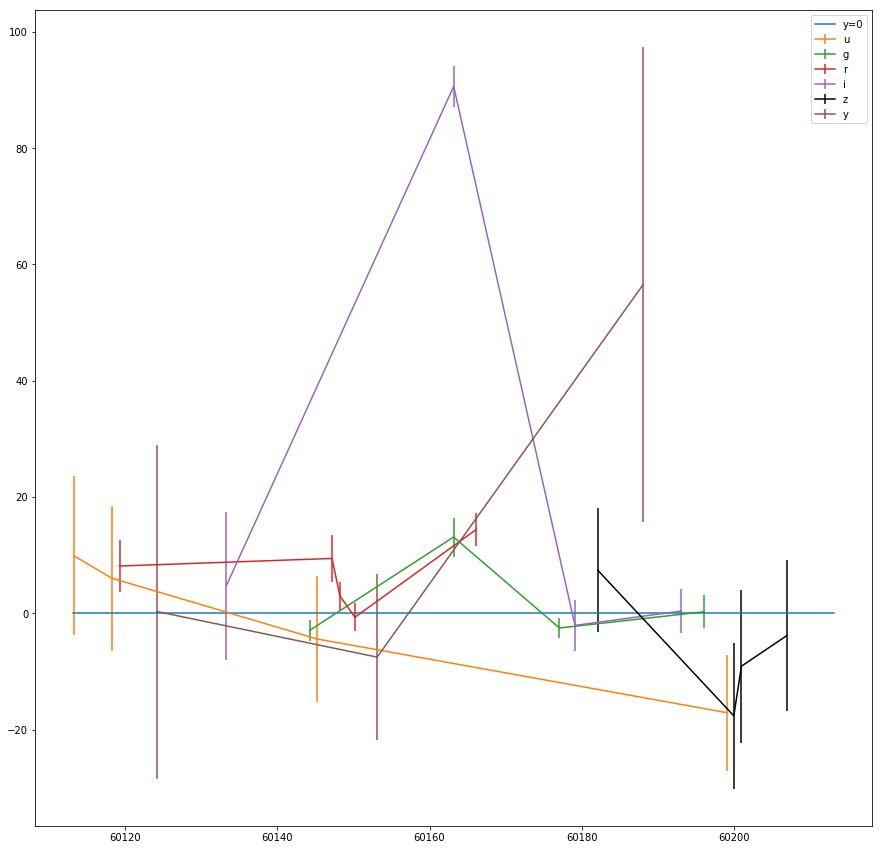

120794836


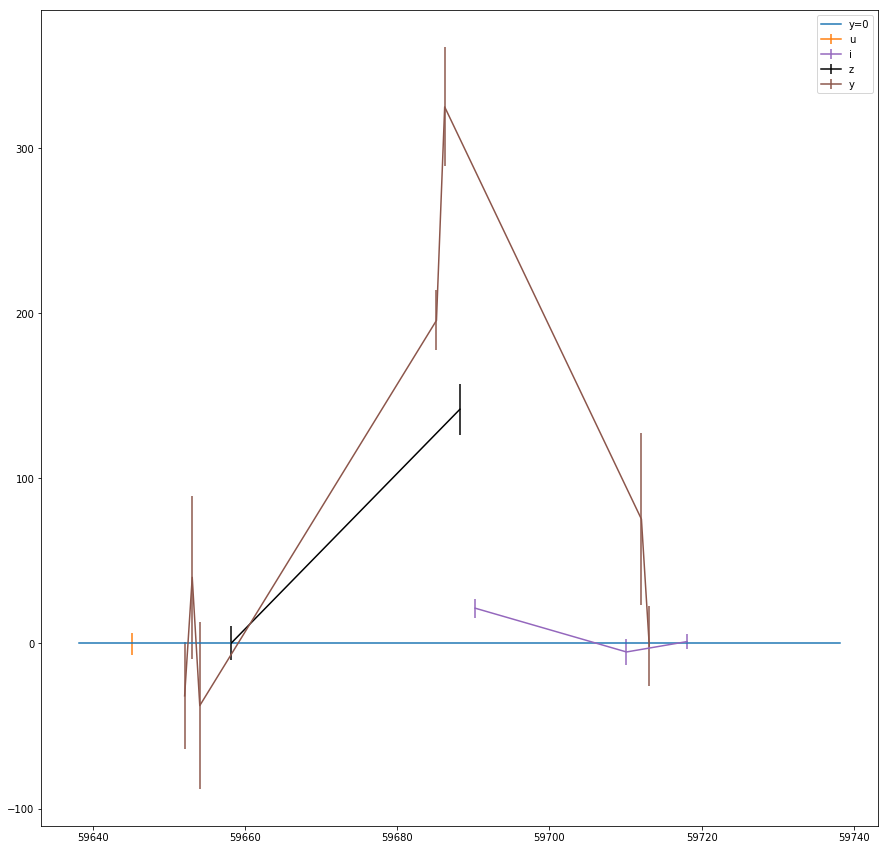

120845357


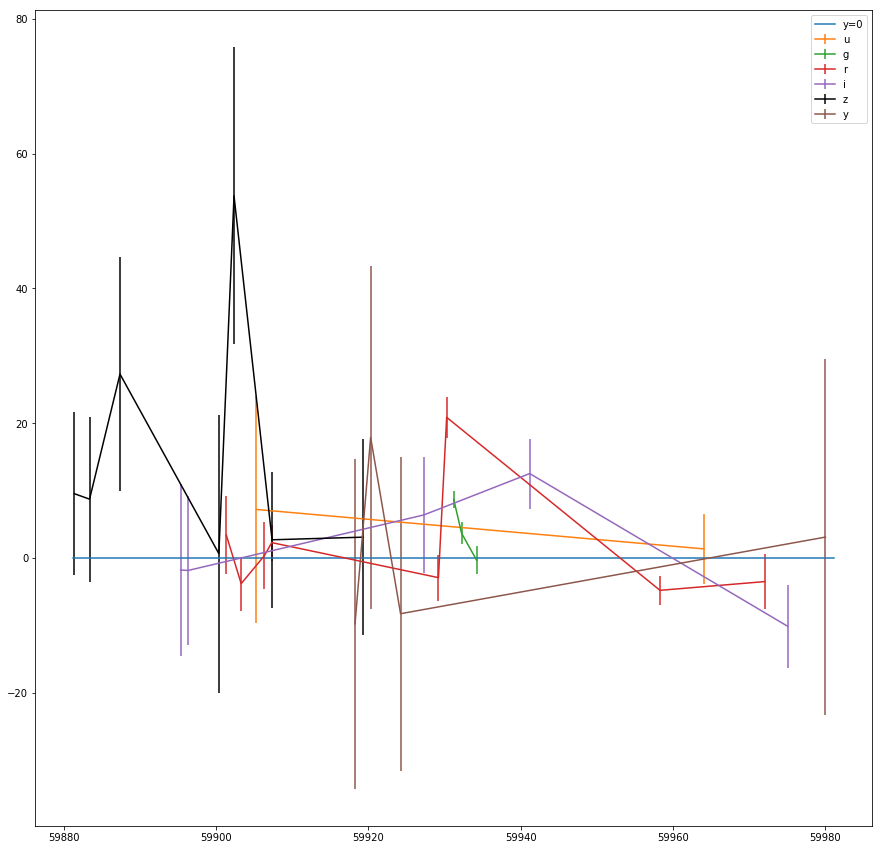

121016694


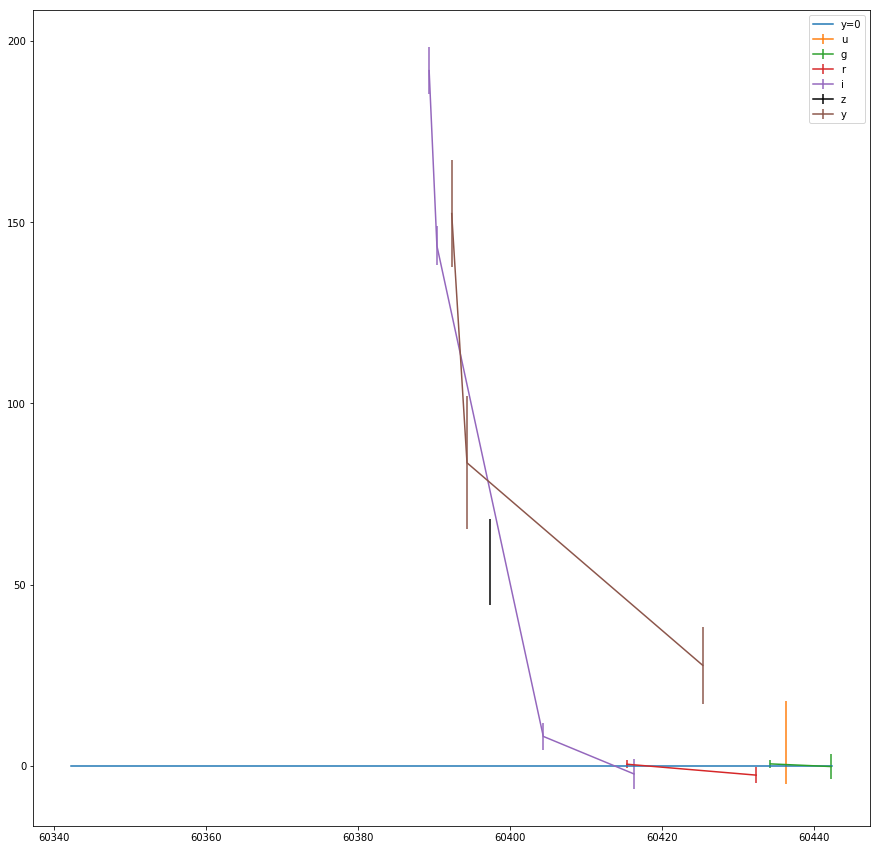

121257780


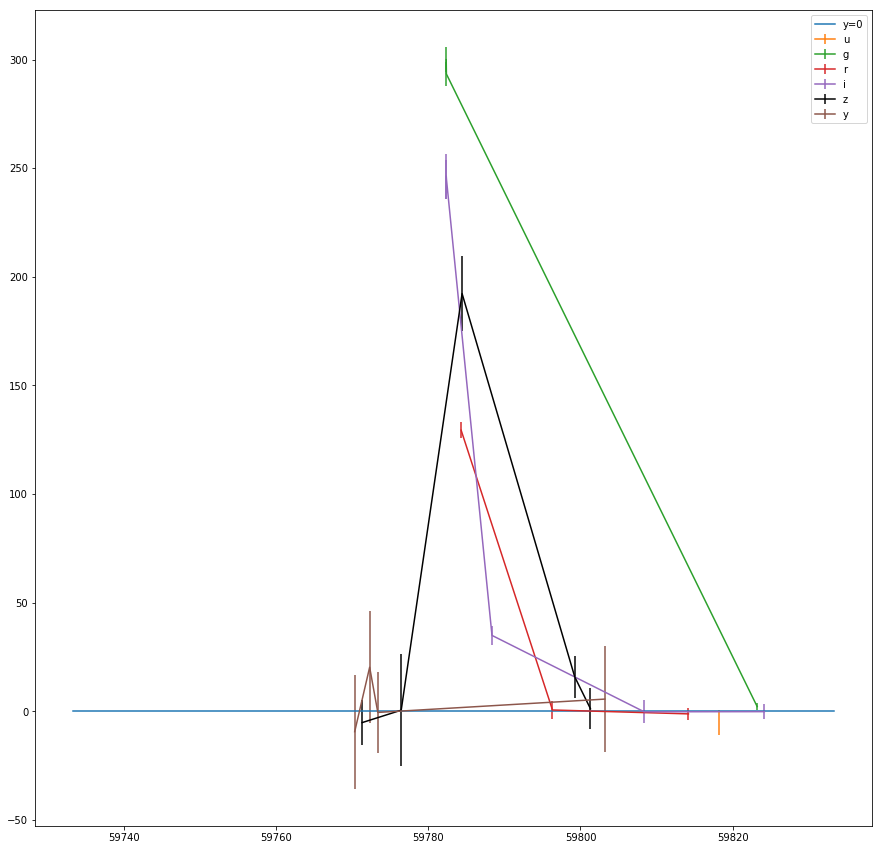

121326699


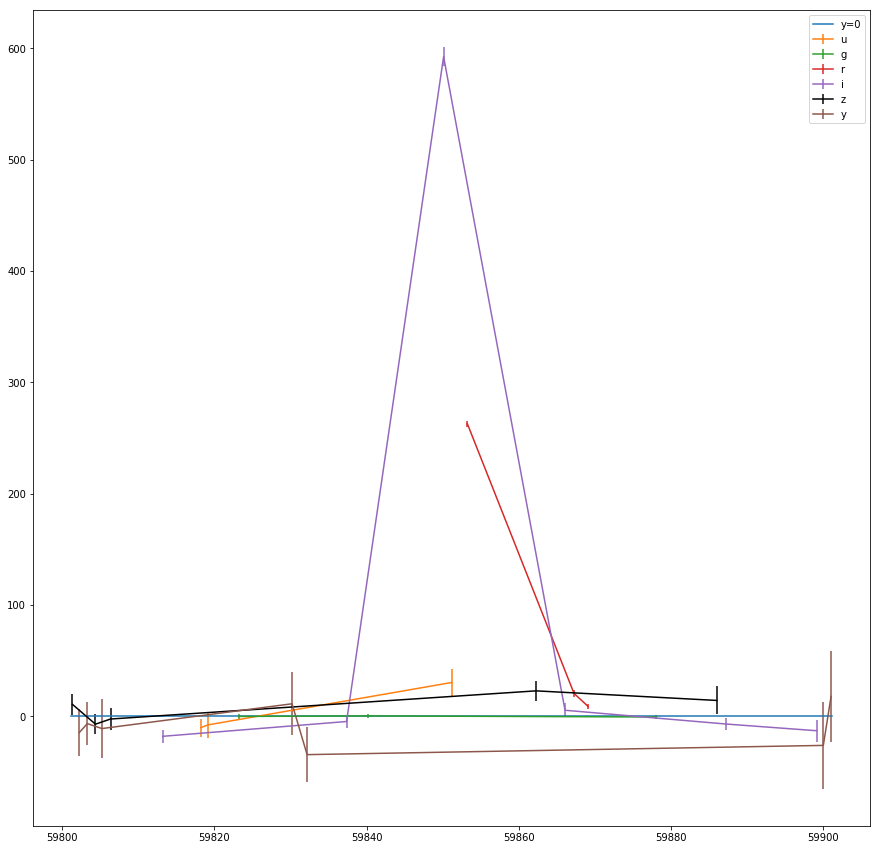

122963326


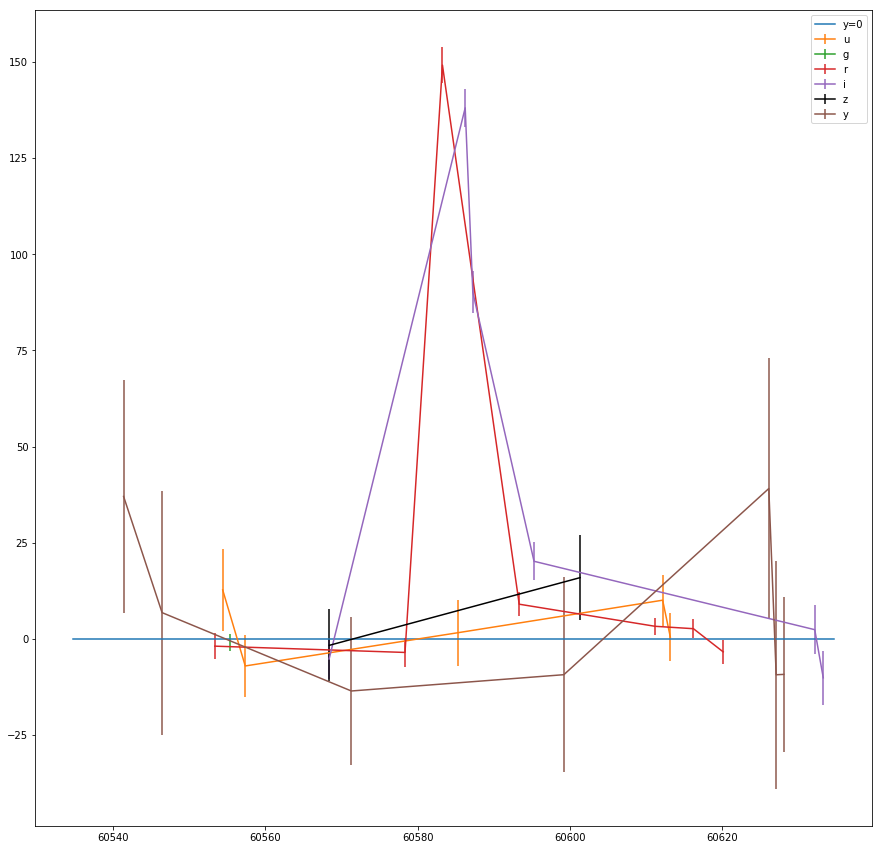

124687561


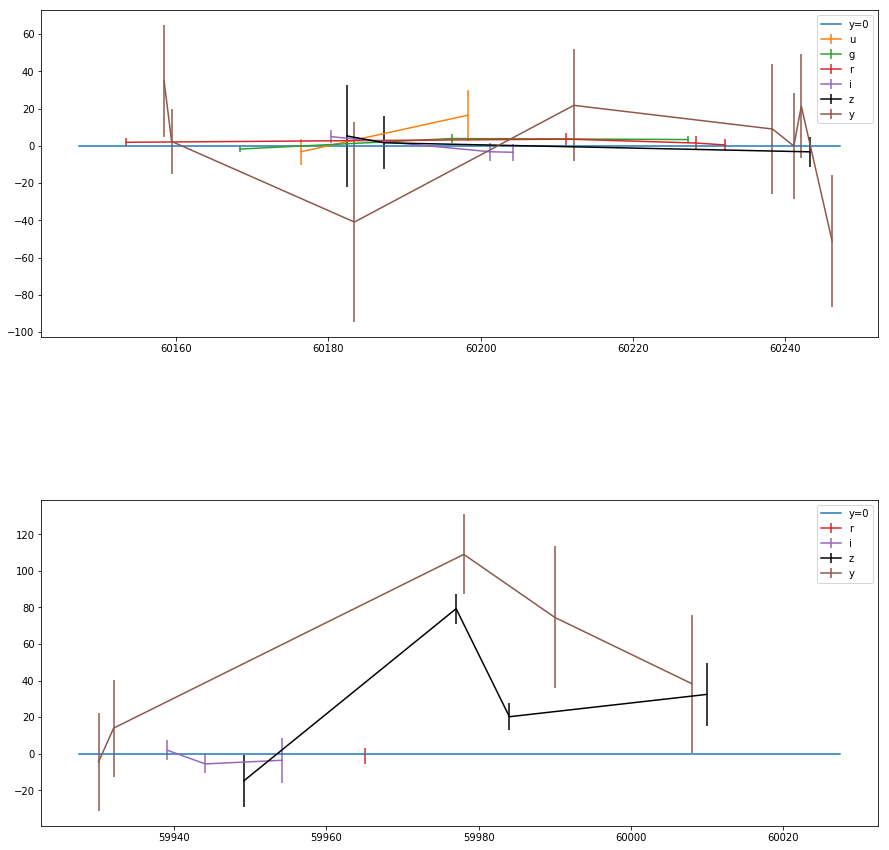

125554681


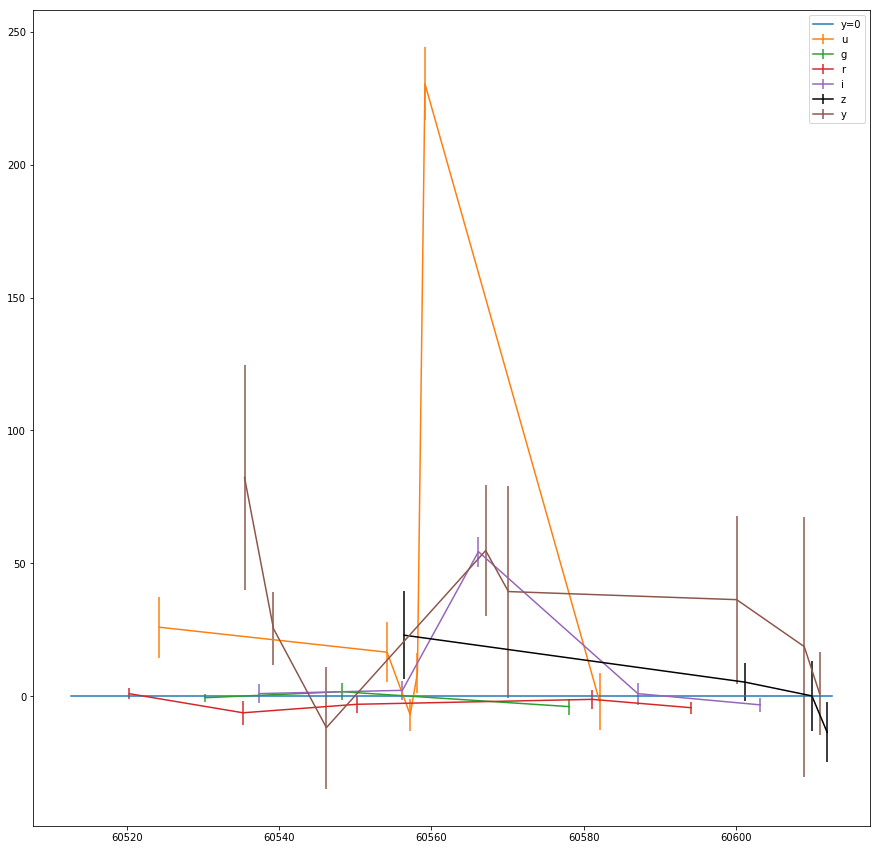

126976895


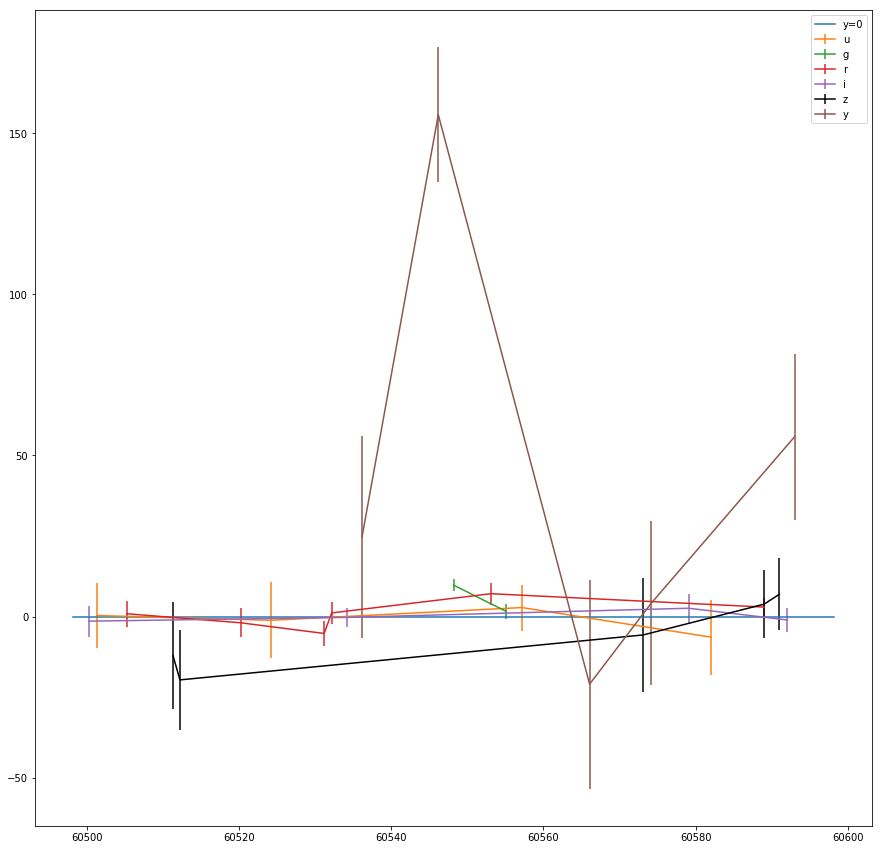

129328649


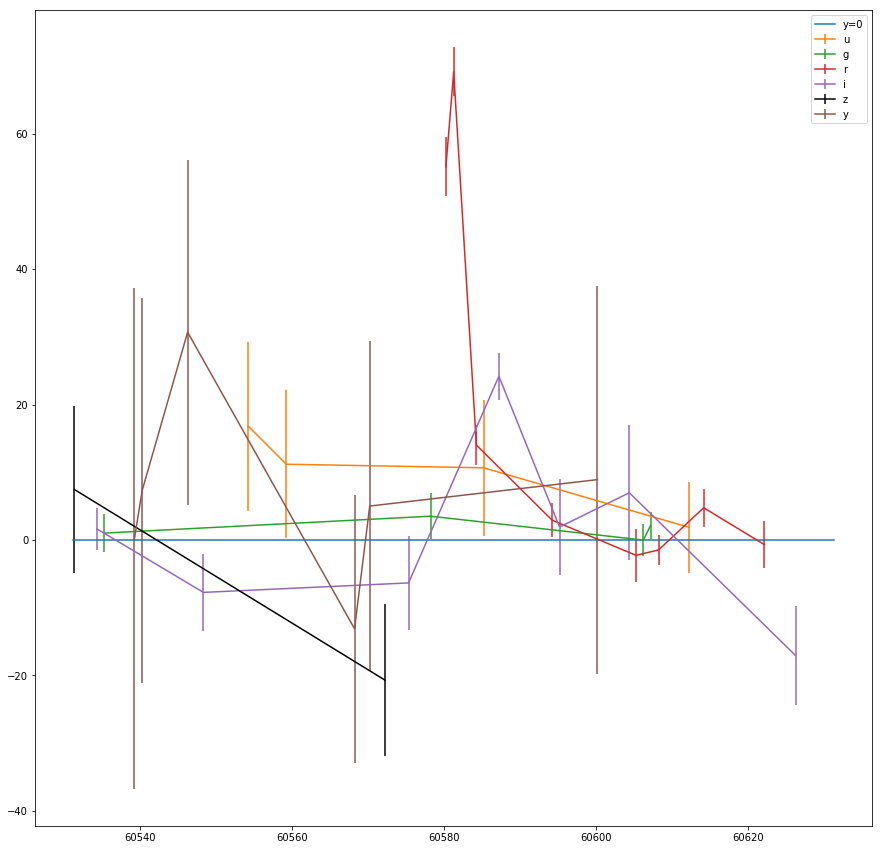

130678775


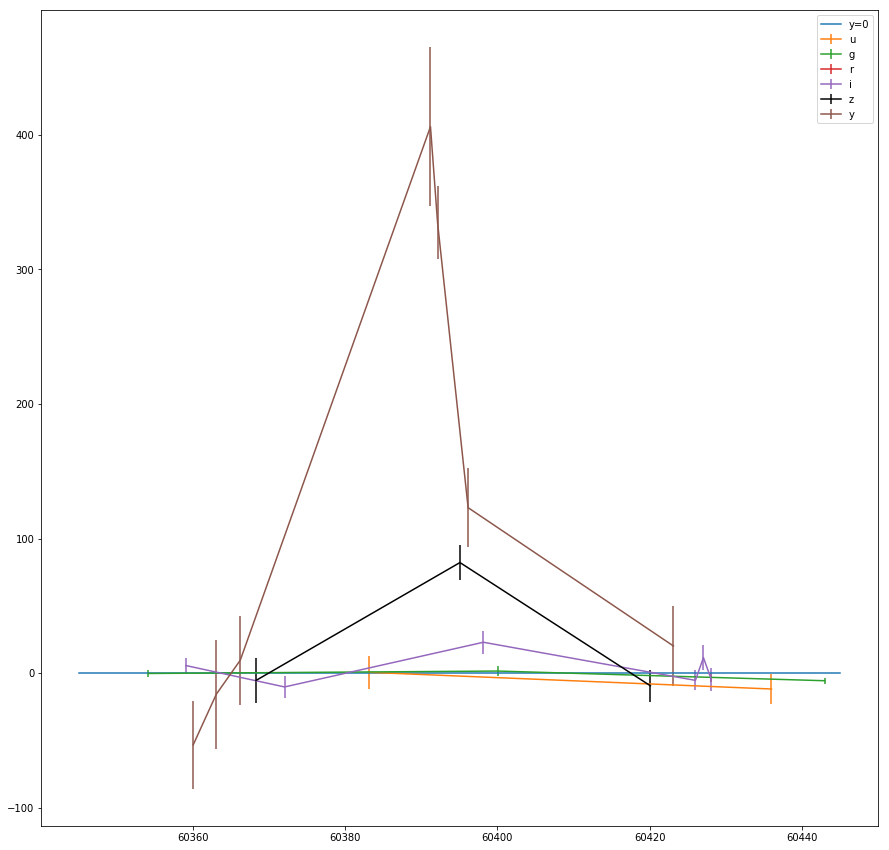

In [78]:
for i,obj_id in enumerate(kilonova_ids):
    index = df['object_id'] == obj_id
    print(obj_id)
    #plot_data(df[index])
    max_flux_dates = get_max_flux_dates(df[index])
    fig = plot_max_flux_region(df[index],max_flux_dates,priority=1)
    fig.savefig("./kilonova_img/kilonova_segments/train"+str(obj_id)+"priority"+str(1))
    plt.show()